In [1]:
"""!pip install sqlalchemy pandas tensorflow scikit-learn matplotlib psycopg2-binary"""

'!pip install sqlalchemy pandas tensorflow scikit-learn matplotlib psycopg2-binary'

## Reading DB

In [3]:
from sqlalchemy import create_engine
import getpass
import pandas as pd


DB_NAME="mimic3"
DB_USER="postgres"
DB_PASSWORD = getpass.getpass("Enter password: ")
DB_HOST="localhost"
DB_PORT=5432
DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
eng = create_engine(DATABASE_URL)

In [4]:
# Test connection with pandas
query = "SELECT * FROM first_admission_data"
df = pd.read_sql(query, eng)

print(df.shape)
df.head(10)


(29082, 46)


subject_id  hadm_id gender   age        dob        dod           admittime  \
0        5692   151113      M  44.0 2099-09-01        NaT 2143-10-23 15:42:00   
1       82633   113066      M  55.0 2074-05-07        NaT 2129-11-20 03:47:00   
2       90158   115959      M  21.0 2155-05-05        NaT 2176-07-19 19:35:00   
3       76727   191656      M  77.0 2041-09-11        NaT 2119-02-24 10:45:00   
4       56045   195101      F  65.0 2086-09-01        NaT 2152-02-06 10:36:00   
5       20913   128124      M  49.0 2087-10-22 2138-01-02 2137-04-30 21:08:00   
6       19616   193383      M  53.0 2060-02-05        NaT 2113-08-16 08:00:00   
7       99645   152926      M  78.0 2072-06-08        NaT 2151-05-05 08:00:00   
8       26097   126042      F  43.0 2078-08-17        NaT 2122-01-28 21:28:00   
9       19698   199543      M  56.0 2129-08-03 2187-01-09 2185-10-29 18:36:00   

   mortality_1yr  weight_kg  respiratory_rate  ...  cardiovascular  \
0              0        NaN              25.0  ...               1   
1              0       71.0              20.0  ...               0   
2              0       65.9              17.0  ...               1   
3              0       74.5              25.0  ...               0   
4              0      106.0              12.0  ...               1   
5              1      136.0              22.0  ...               1   
6              0      101.5              10.0  ...               1   
7              0       87.6              12.0  ...               1   
8              0        NaN              24.0  ...               1   
9              0       96.0              17.0  ...               1   

   neurological  pulmonary  diabetes  renal  liver  cancer  mental_substance  \
0             0          0         0      0      0       0                 0   
1             0          0         0      0      0       0                 1   
2             1          0         0      0      0       0                 0   
3             0          1         0      0      0       1                 0   
4             0          1         1      0      0       0                 0   
5             0          1         1      1      0       0                 0   
6             0          1         0      0      0       0                 0   
7             0          0         0      0      0       1                 1   
8             0          0         0      0      0       0                 0   
9             0          0         1      0      1       0                 0   

   hem_metabolic  autoimmune  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              1           0  
5              1           0  
6              0           0  
7              0           0  
8              1           0  
9              0           0  

[10 rows x 46 columns]

In [5]:
column_names = df.columns.tolist()

print(column_names)

['subject_id', 'hadm_id', 'gender', 'age', 'dob', 'dod', 'admittime', 'mortality_1yr', 'weight_kg', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph', 'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 'platelet_count', 'inr', 'pt', 'ptt', 'temperature', 'gcs', 'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 'autoimmune']


In [6]:
# Drop unwanted columns
df = df.drop(columns=['dob', 'dod', 'admittime'], errors='ignore')

# Convert gender: M → 1, F → 0
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Fill NaNs with mean for numeric columns
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

# Ensure 'age' is integer, others are rounded to 2 decimals
df['age'] = df['age'].round().astype(int)
for col in df.select_dtypes(include='number').columns:
    if col != 'age':
        df[col] = df[col].round(2)

In [7]:
print(df.shape)
df.head(10)

(29082, 43)


subject_id  hadm_id  gender  age  mortality_1yr  weight_kg  \
0        5692   151113       1   44              0      85.24   
1       82633   113066       1   55              0      71.00   
2       90158   115959       1   21              0      65.90   
3       76727   191656       1   77              0      74.50   
4       56045   195101       0   65              0     106.00   
5       20913   128124       1   49              1     136.00   
6       19616   193383       1   53              0     101.50   
7       99645   152926       1   78              0      87.60   
8       26097   126042       0   43              0      85.24   
9       19698   199543       1   56              0      96.00   

   respiratory_rate  heart_rate  nbp_systolic  nbp_diastolic  ...  \
0              25.0        90.0          98.0          65.33  ...   
1              20.0        98.0         121.0          77.00  ...   
2              17.0        96.0         130.0          66.00  ...   
3              25.0        83.0         148.0          66.00  ...   
4              12.0        88.0         101.0          38.00  ...   
5              22.0        79.0         119.0          75.67  ...   
6              10.0        88.0         111.0          81.00  ...   
7              12.0        61.0         121.0          75.00  ...   
8              24.0        95.0          95.0          57.00  ...   
9              17.0        62.0         131.0          99.00  ...   

   cardiovascular  neurological  pulmonary  diabetes  renal  liver  cancer  \
0               1             0          0         0      0      0       0   
1               0             0          0         0      0      0       0   
2               1             1          0         0      0      0       0   
3               0             0          1         0      0      0       1   
4               1             0          1         1      0      0       0   
5               1             0          1         1      1      0       0   
6               1             0          1         0      0      0       0   
7               1             0          0         0      0      0       1   
8               1             0          0         0      0      0       0   
9               1             0          0         1      0      1       0   

   mental_substance  hem_metabolic  autoimmune  
0                 0              0           0  
1                 1              0           0  
2                 0              0           0  
3                 0              0           0  
4                 0              1           0  
5                 0              1           0  
6                 0              0           0  
7                 1              0           0  
8                 0              1           0  
9                 0              0           0  

[10 rows x 43 columns]

In [8]:
from sklearn.model_selection import train_test_split


# Split the dataset into two halves
#dfA, dfB= train_test_split(df, test_size=0.5, random_state=42)
dfA, dfB= train_test_split(df, test_size=0.5, random_state=42,stratify=df['mortality_1yr'])

In [9]:
column_names = df.columns.tolist()

print(column_names)

['subject_id', 'hadm_id', 'gender', 'age', 'mortality_1yr', 'weight_kg', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph', 'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 'platelet_count', 'inr', 'pt', 'ptt', 'temperature', 'gcs', 'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 'autoimmune']


In [10]:
# Common attributes (keep these in both dfA and dfB)
common_attributes = [
    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', 
    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 
    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 
    'autoimmune', 'mortality_1yr'
]

# Set A specific attributes
set_A_attributes = [
    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 
    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'
]

# Set B specific attributes
set_B_attributes = [
    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 
    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 
    'platelet_count', 'inr', 'pt', 'ptt'
]


In [11]:
dfA = dfA[common_attributes + set_A_attributes]
dfB = dfB[common_attributes + set_B_attributes]

print(dfA['mortality_1yr'].value_counts())
print(dfB['mortality_1yr'].value_counts())


mortality_1yr
0    11534
1     3007
Name: count, dtype: int64
mortality_1yr
0    11535
1     3006
Name: count, dtype: int64


In [12]:
print(dfA.shape)
dfA.head(10)

(14541, 27)


subject_id  hadm_id  gender  age  weight_kg    gcs  cardiovascular  \
20429       23857   182768       0   62      85.24   3.00               0   
7241        58431   189205       0   21      70.00  12.15               1   
5319        70386   189427       0   30      52.50  15.00               0   
4620        86618   181332       1   43      70.00  13.92               0   
26552       41487   147276       1   71      90.00  11.20               1   
5115        18851   145187       1   60      89.70   3.00               1   
8179        95456   180792       1   59      95.80  14.83               1   
26846        9633   165463       1   71      85.24  11.38               1   
1866         1144   197299       1   69     109.10   3.00               1   
28977       55180   120102       1   55      71.00  14.55               1   

       neurological  pulmonary  diabetes  ...  temperature  respiratory_rate  \
20429             0          0         0  ...        34.22              20.0   
7241              0          0         0  ...        36.39              20.0   
5319              0          0         1  ...        36.83              16.0   
4620              0          0         0  ...        37.89              14.0   
26552             0          0         0  ...        35.94              14.0   
5115              0          1         1  ...        36.56              14.0   
8179              0          0         0  ...        36.50              11.0   
26846             0          0         0  ...        31.44              15.0   
1866              0          0         0  ...        36.11              12.0   
28977             0          0         1  ...        36.28              10.0   

       heart_rate  nbp_systolic  nbp_diastolic   spo2    fio2     po2   pco2  \
20429       140.0         97.00          72.33   99.0    1.00  199.00  43.00   
7241        129.0        129.00          62.00   92.0  100.00  178.00  50.00   
5319        112.0         98.00          62.00  100.0   31.74  196.00  25.00   
4620        101.0        137.00          72.00  100.0  100.00  136.00  36.00   
26552        88.0        115.00          78.00   99.0  100.00  465.00  41.00   
5115         88.0        122.08          75.43  100.0    0.40   81.00  43.00   
8179         58.0        150.00          60.00   96.0   31.74  214.49  42.31   
26846        76.0        122.08          75.43   97.0    1.00  115.00  47.00   
1866         87.0         85.00          61.00  100.0    1.00  357.00  47.00   
28977        80.0        122.08          75.43   96.0   50.00  221.00  39.00   

         ph  
20429  7.14  
7241   7.38  
5319   7.26  
4620   7.45  
26552  7.40  
5115   7.41  
8179   7.37  
26846  7.13  
1866   7.36  
28977  7.36  

[10 rows x 27 columns]

In [13]:
print(dfB.shape)
dfB.head(10)

(14541, 33)


subject_id  hadm_id  gender  age  weight_kg    gcs  cardiovascular  \
20394       44908   173941       1   60      83.20  15.00               1   
2905        59959   165052       1   28      84.60  15.00               0   
28131       95609   186369       1   76      77.60  15.00               1   
16482       80133   130380       1   44      80.80  14.93               0   
7983        55719   143927       0   62      63.40  14.75               1   
14050       23844   168279       0   36      64.60  15.00               1   
17981       89528   120508       0   64      80.00  14.76               1   
20098       51545   121577       1   77      75.50  14.97               1   
9155        14966   176522       1   52      85.24   6.00               0   
22730       11850   152968       1   51      85.24  15.00               1   

       neurological  pulmonary  diabetes  ...  anion_gap  bilirubin  albumin  \
20394             0          1         1  ...       12.0       0.70     3.32   
2905              0          0         0  ...       12.0       1.00     3.90   
28131             0          0         0  ...       11.0       1.42     3.32   
16482             0          1         0  ...       14.0       1.42     3.32   
7983              0          0         0  ...       10.0       0.50     4.30   
14050             0          0         0  ...       13.0       0.70     2.50   
17981             0          0         1  ...       15.0       0.90     3.80   
20098             0          1         0  ...       21.0       0.50     3.50   
9155              1          0         0  ...       15.0       0.30     3.90   
22730             0          0         1  ...       11.0       0.80     2.90   

        wbc  hemoglobin  hematocrit  platelet_count  inr    pt    ptt  
20394  14.2        10.2        32.2           249.0  5.5  49.9   40.3  
2905    4.6        14.4        39.5            47.0  1.1  13.1   28.5  
28131   7.7        13.5        39.6           193.0  1.1  12.8   28.4  
16482  31.1        14.7        43.4           290.0  1.1  12.8   25.1  
7983    4.1        13.2        37.6           202.0  1.1  12.9   32.4  
14050   5.9        10.7        30.1           380.0  1.2  13.8   35.4  
17981   7.9        14.8        41.9           237.0  1.2  13.8  110.1  
20098  12.7        12.2        38.3           192.0  1.2  13.8   23.7  
9155    9.5        13.5        35.7           194.0  1.1  12.3   27.2  
22730   4.8         9.4        29.8           106.0  2.4  18.9   35.6  

[10 rows x 33 columns]

In [14]:
dfA_common = dfA[common_attributes]
dfB_common = dfB[common_attributes]


In [15]:
print(dfA_common.shape)
dfA_common.head(10)

(14541, 17)


subject_id  hadm_id  gender  age  weight_kg    gcs  cardiovascular  \
20429       23857   182768       0   62      85.24   3.00               0   
7241        58431   189205       0   21      70.00  12.15               1   
5319        70386   189427       0   30      52.50  15.00               0   
4620        86618   181332       1   43      70.00  13.92               0   
26552       41487   147276       1   71      90.00  11.20               1   
5115        18851   145187       1   60      89.70   3.00               1   
8179        95456   180792       1   59      95.80  14.83               1   
26846        9633   165463       1   71      85.24  11.38               1   
1866         1144   197299       1   69     109.10   3.00               1   
28977       55180   120102       1   55      71.00  14.55               1   

       neurological  pulmonary  diabetes  renal  liver  cancer  \
20429             0          0         0      0      0       0   
7241              0          0         0      0      0       0   
5319              0          0         1      0      0       0   
4620              0          0         0      0      1       0   
26552             0          0         0      0      0       0   
5115              0          1         1      0      0       0   
8179              0          0         0      0      0       0   
26846             0          0         0      0      0       0   
1866              0          0         0      0      0       0   
28977             0          0         1      1      1       0   

       mental_substance  hem_metabolic  autoimmune  mortality_1yr  
20429                 0              0           0              1  
7241                  0              1           0              0  
5319                  0              0           0              0  
4620                  0              1           0              0  
26552                 0              0           0              0  
5115                  0              0           0              0  
8179                  0              0           0              0  
26846                 0              0           0              1  
1866                  0              0           0              0  
28977                 0              1           0              0

In [16]:
print(dfB_common.shape)
dfB_common.head(10)

(14541, 17)


subject_id  hadm_id  gender  age  weight_kg    gcs  cardiovascular  \
20394       44908   173941       1   60      83.20  15.00               1   
2905        59959   165052       1   28      84.60  15.00               0   
28131       95609   186369       1   76      77.60  15.00               1   
16482       80133   130380       1   44      80.80  14.93               0   
7983        55719   143927       0   62      63.40  14.75               1   
14050       23844   168279       0   36      64.60  15.00               1   
17981       89528   120508       0   64      80.00  14.76               1   
20098       51545   121577       1   77      75.50  14.97               1   
9155        14966   176522       1   52      85.24   6.00               0   
22730       11850   152968       1   51      85.24  15.00               1   

       neurological  pulmonary  diabetes  renal  liver  cancer  \
20394             0          1         1      0      0       0   
2905              0          0         0      0      0       0   
28131             0          0         0      0      0       0   
16482             0          1         0      0      0       0   
7983              0          0         0      0      0       0   
14050             0          0         0      0      0       0   
17981             0          0         1      0      0       0   
20098             0          1         0      1      0       0   
9155              1          0         0      0      0       1   
22730             0          0         1      0      0       0   

       mental_substance  hem_metabolic  autoimmune  mortality_1yr  
20394                 0              0           0              0  
2905                  0              1           0              0  
28131                 0              0           1              0  
16482                 0              0           0              0  
7983                  0              0           0              0  
14050                 0              1           0              0  
17981                 0              1           0              0  
20098                 1              1           0              1  
9155                  0              0           0              0  
22730                 0              0           0              0

### Baseline training:

## dfA_common

### Read

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1. Split data into features (X) and target (y)
id_columns_A_common = dfA_common[['subject_id', 'hadm_id']]
X = dfA_common.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
y = dfA_common['mortality_1yr']

# Optional: Standardize if necessary (Random Forest doesn’t need it, but good for comparison later)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 2. Train-Test Split (80/20)
X_train_A_common, X_test_A_common, y_train_A_common, y_test_A_common = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
print(X_train_A_common.shape)

(11632, 14)


In [20]:
print(dfA_common['mortality_1yr'].value_counts())


mortality_1yr
0    11534
1     3007
Name: count, dtype: int64


### Random Forest A_common

In [21]:
rf_balanced_A_common = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the same hyperparameter grid (or simplify if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# GridSearchCV with 5-fold CV
grid_search_bal = GridSearchCV(
    estimator=rf_balanced_A_common,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_A_common, y_train_A_common)

# Evaluate the best model
best_balanced_rf_A_common = grid_search_bal.best_estimator_
y_pred_bal = best_balanced_rf_A_common.predict(X_test_A_common)
y_proba_bal = best_balanced_rf_A_common.predict_proba(X_test_A_common)[:, 1]

print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_A_common, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_A_common, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_A_common, y_proba_bal))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Balanced Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[1814  493]
 [ 197  405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2307
           1       0.45      0.67      0.54       602

    accuracy                           0.76      2909
   macro avg       0.68      0.73      0.69      2909
weighted avg       0.81      0.76      0.78      2909


ROC AUC Score:
0.7965422295570178


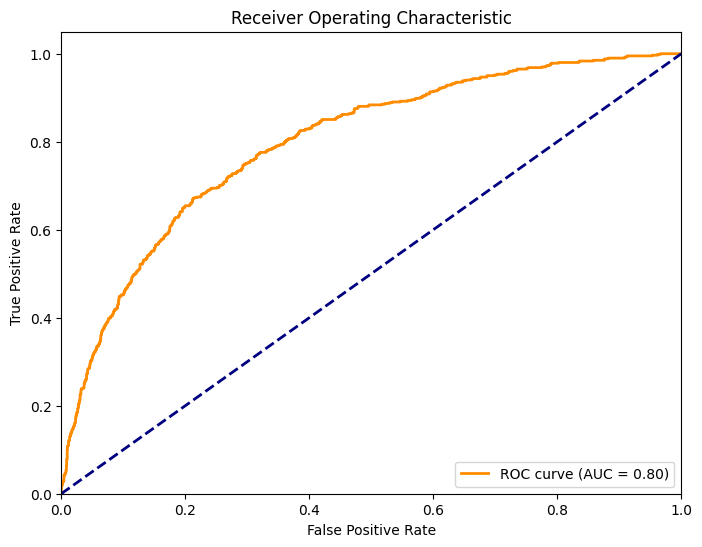

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_balanced_rf_A_common.predict_proba(X_test_A_common)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_rf_A_common, tpr_rf_A_common, thresholds_A_common = roc_curve(y_test_A_common, y_proba)

# Compute AUC
roc_auc_rf_A_common = auc(fpr_rf_A_common, tpr_rf_A_common)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_A_common, tpr_rf_A_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_A_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

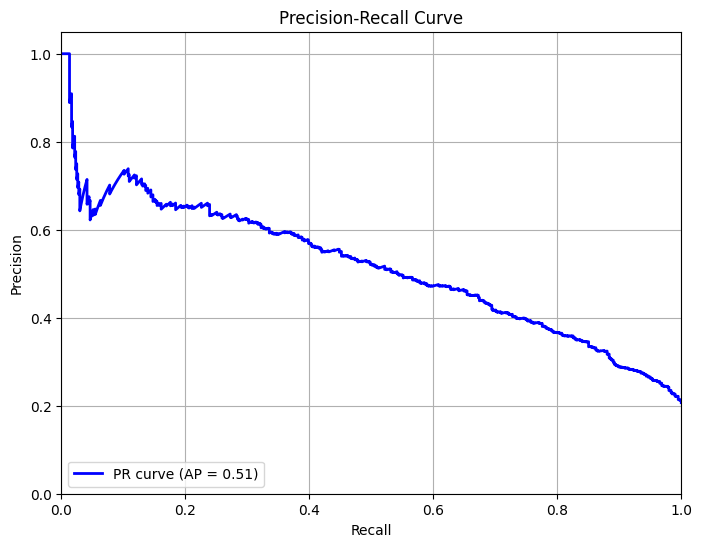

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_balanced_rf_A_common.predict_proba(X_test_A_common)[:, 1]

# Compute PR curve
precision_rf_A_common, recall_rf_A_common, thresholds_pr_A_common = precision_recall_curve(y_test_A_common, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_rf_A_common = average_precision_score(y_test_A_common, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_A_common, precision_rf_A_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_rf_A_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


### Logistic regression A_common


In [24]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model with balanced class weights
log_reg_balanced_A_common = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define the hyperparameter grid (simpler than RF)
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2']             # Type of regularization
}

# GridSearchCV with 5-fold cross-validation
grid_search_bal = GridSearchCV(
    estimator=log_reg_balanced_A_common,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_A_common, y_train_A_common)

# Evaluate the best model
best_log_reg_A_common = grid_search_bal.best_estimator_
y_pred_bal = best_log_reg_A_common.predict(X_test_A_common)
y_proba_bal = best_log_reg_A_common.predict_proba(X_test_A_common)[:, 1]

# Print results
print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_A_common, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_A_common, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_A_common, y_proba_bal))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Balanced Parameters: {'C': 1, 'penalty': 'l1'}

Confusion Matrix:
[[1678  629]
 [ 197  405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2307
           1       0.39      0.67      0.50       602

    accuracy                           0.72      2909
   macro avg       0.64      0.70      0.65      2909
weighted avg       0.79      0.72      0.74      2909


ROC AUC Score:
0.7741040196887415


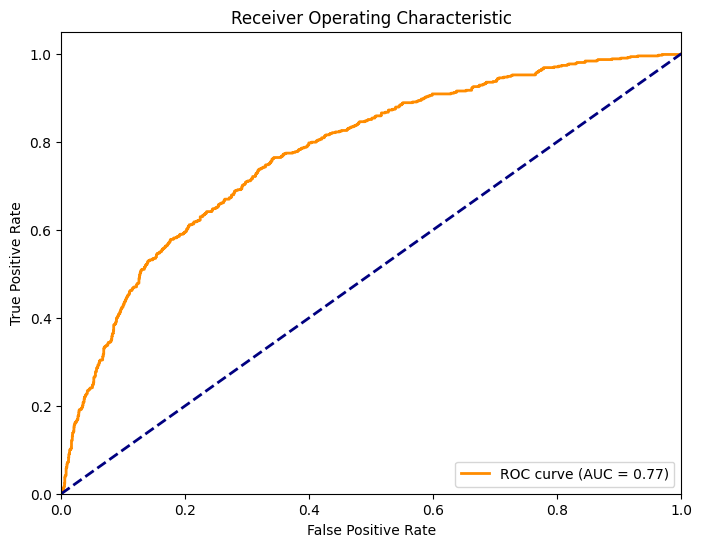

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_log_reg_A_common.predict_proba(X_test_A_common)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_lr_A_common, tpr_lr_A_common, thresholds_lr_common = roc_curve(y_test_A_common, y_proba)

# Compute AUC
roc_auc_lr_A_common = auc(fpr_lr_A_common, tpr_lr_A_common)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_A_common, tpr_lr_A_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr_A_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

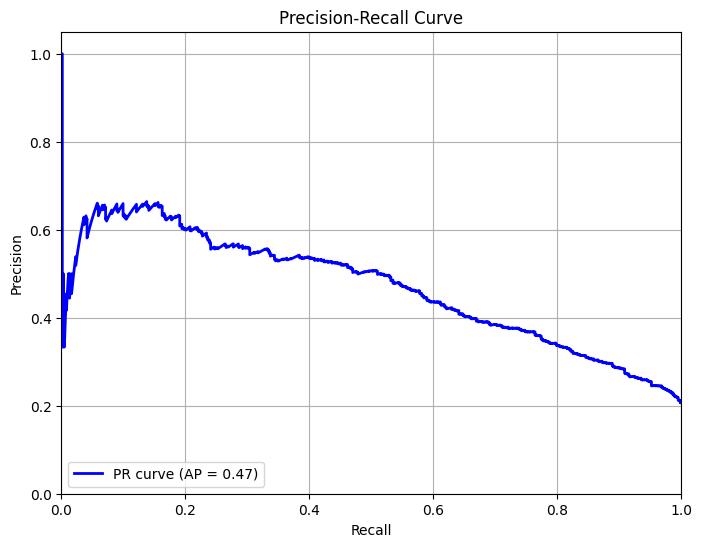

In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# Compute predicted probabilities (already done)
y_proba = best_log_reg_A_common.predict_proba(X_test_A_common)[:, 1]

# Compute PR curve
precision_lr_A_common, recall_lr_A_common, thresholds_lr_A_common = precision_recall_curve(y_test_A_common, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_lr_A_common = average_precision_score(y_test_A_common, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr_A_common, precision_lr_A_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_lr_A_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


### MLP A_common

In [27]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train_A_common)


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

def mlp_model(input_dim, learning_rate=0.001):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(256, activation='relu', name='FC1'),
        layers.Dense(128, activation='relu', name='FC2'),
        layers.Dense(64, activation='relu', name='FC3'),
        layers.Dense(2, activation='softmax', name='Output')  # 2-class softmax
    ])
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # one-hot labels
        metrics=[tf.keras.metrics.AUC(name='AUC'), 
                 tf.keras.metrics.Precision(name='Precision'), 
                 tf.keras.metrics.Recall(name='Recall')]
    )
    return model


In [29]:
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()





🔧 Training model with learning rate: 0.01
✅ Training completed.

🔧 Training model with learning rate: 0.001
✅ Training completed.

🔧 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


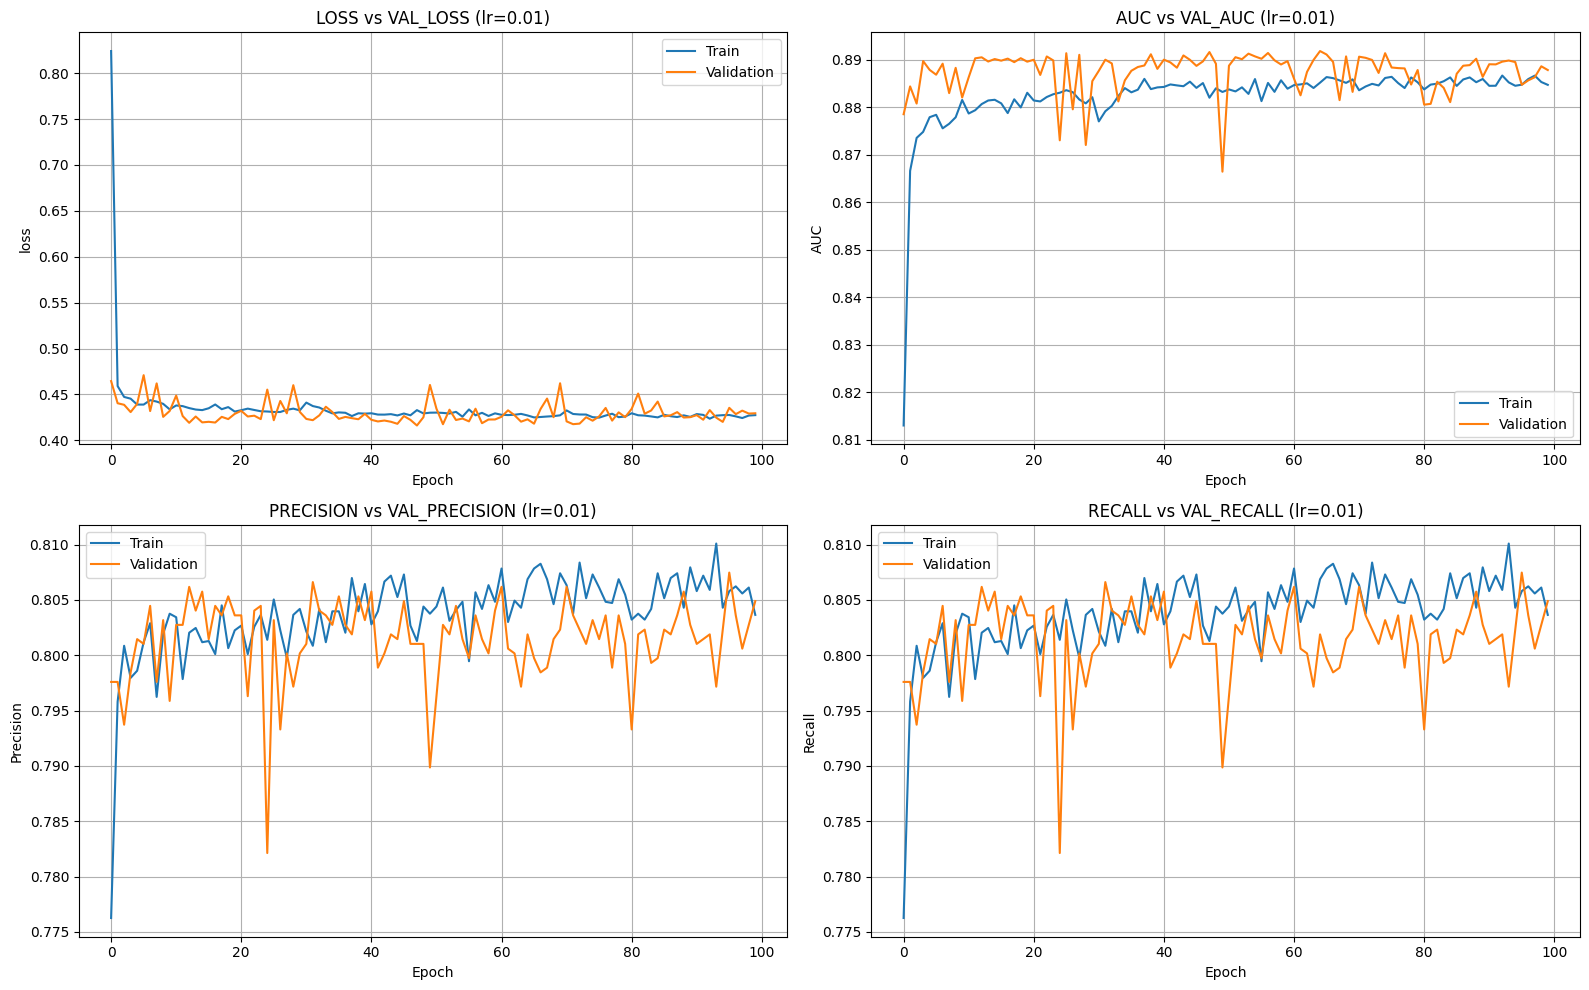


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


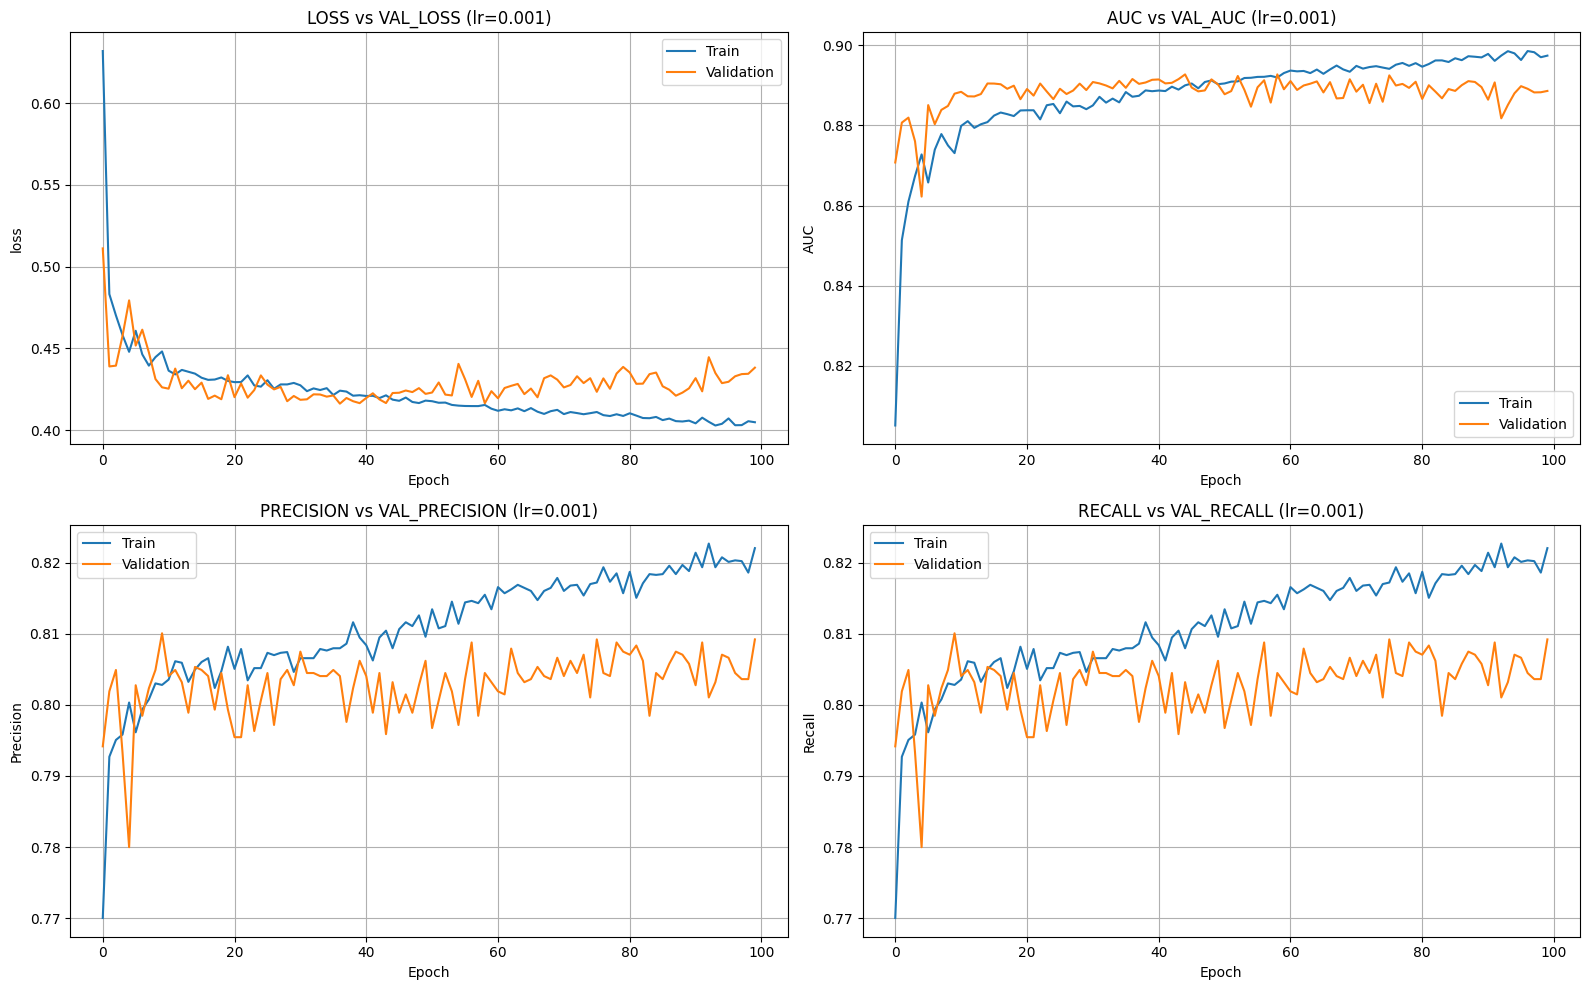


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


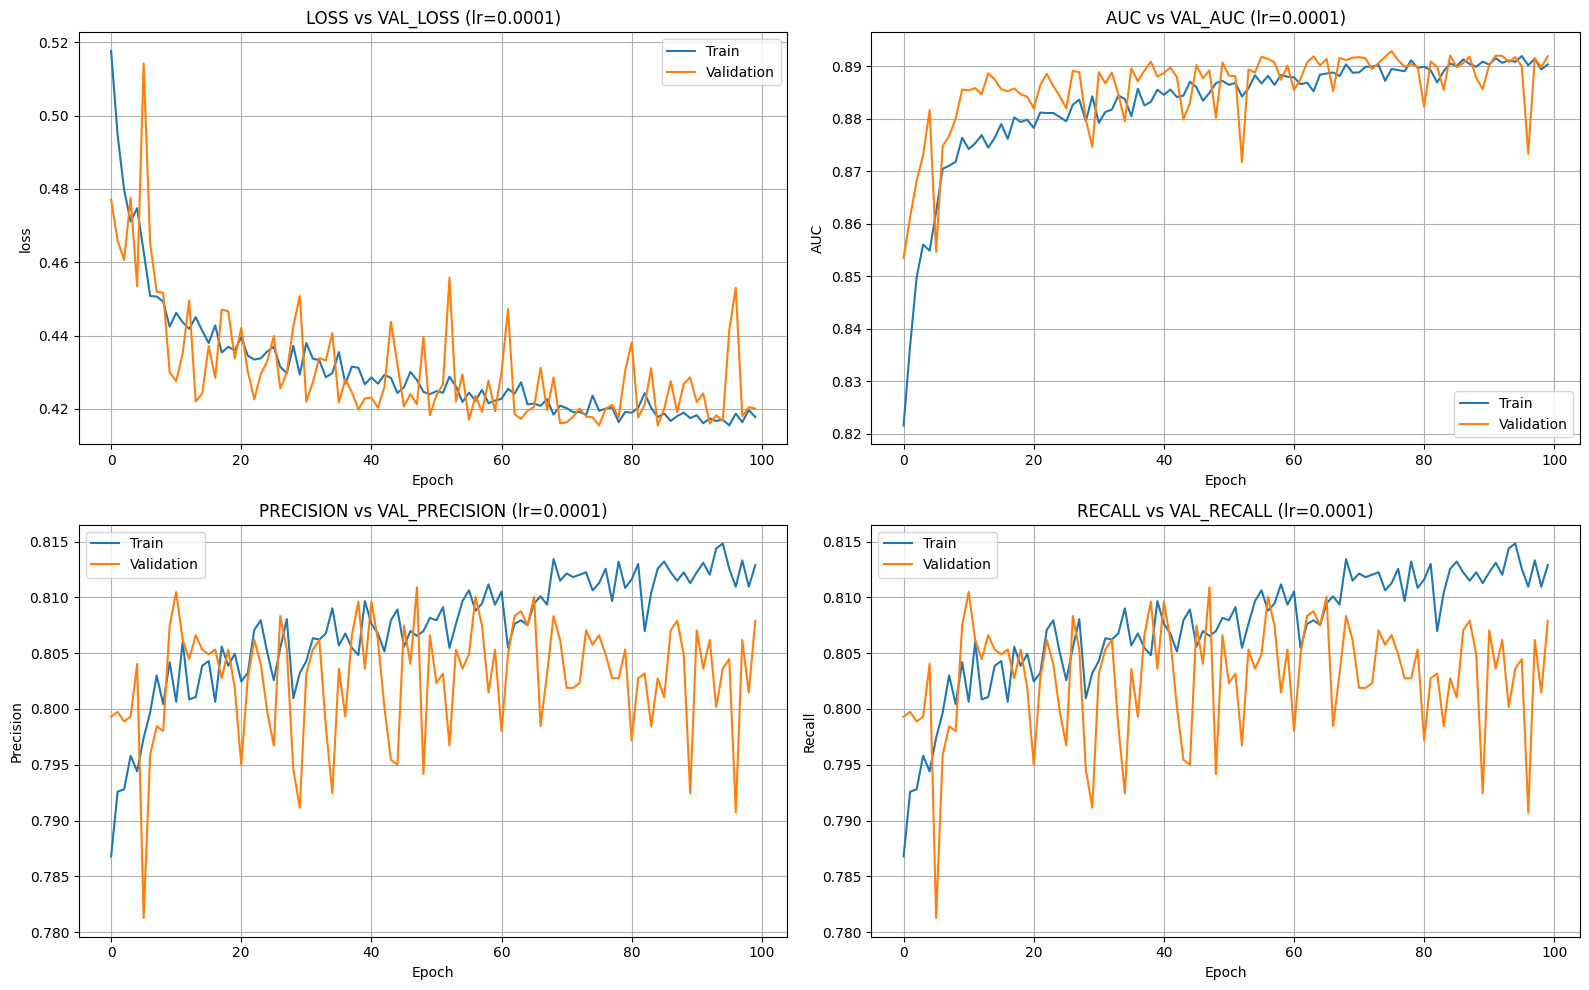

In [30]:
# Train
for lr in learning_rates:
    print(f"\n🔧 Training model with learning rate: {lr}")
    model = mlp_model(input_dim=X_train_A_common.shape[1], learning_rate=lr)
    
    history = model.fit(
        X_train_A_common, y_train_encoded,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


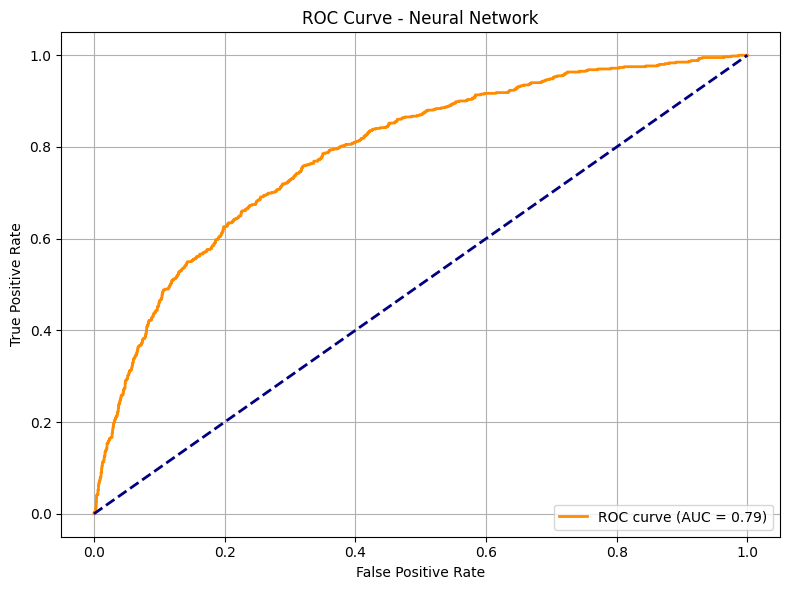

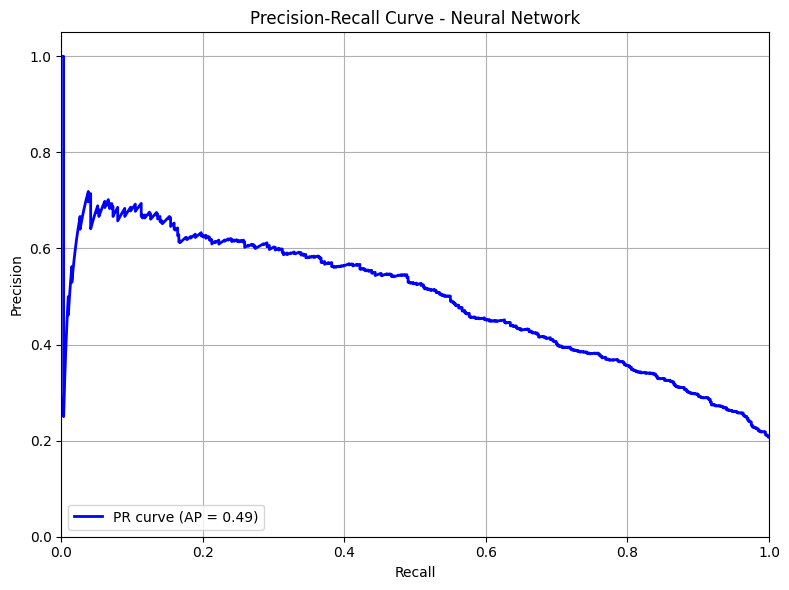

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn_A_common = best_model.predict(X_test_A_common)[:, 1]  # probability of class 1

#  Decode true labels if one-hot encoded
if y_test_A_common.ndim > 1 and y_test_A_common.shape[1] > 1:
    y_true = np.argmax(y_test_A_common, axis=1)
else:
    y_true = y_test_A_common

# === ROC Curve ===
fpr_nn_A_common, tpr_nn_A_common, thresholds_roc_nn_A_common = roc_curve(y_true, y_proba_nn_A_common)
roc_auc_nn_A_common = auc(fpr_nn_A_common, tpr_nn_A_common)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_A_common, tpr_nn_A_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_A_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn_A_common, recall_nn_A_common, thresholds_pr_nn_A_common = precision_recall_curve(y_true, y_proba_nn_A_common)
avg_precision_nn_A_common = average_precision_score(y_true, y_proba_nn_A_common)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_A_common, precision_nn_A_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_A_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()


### MLP New A_common


 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


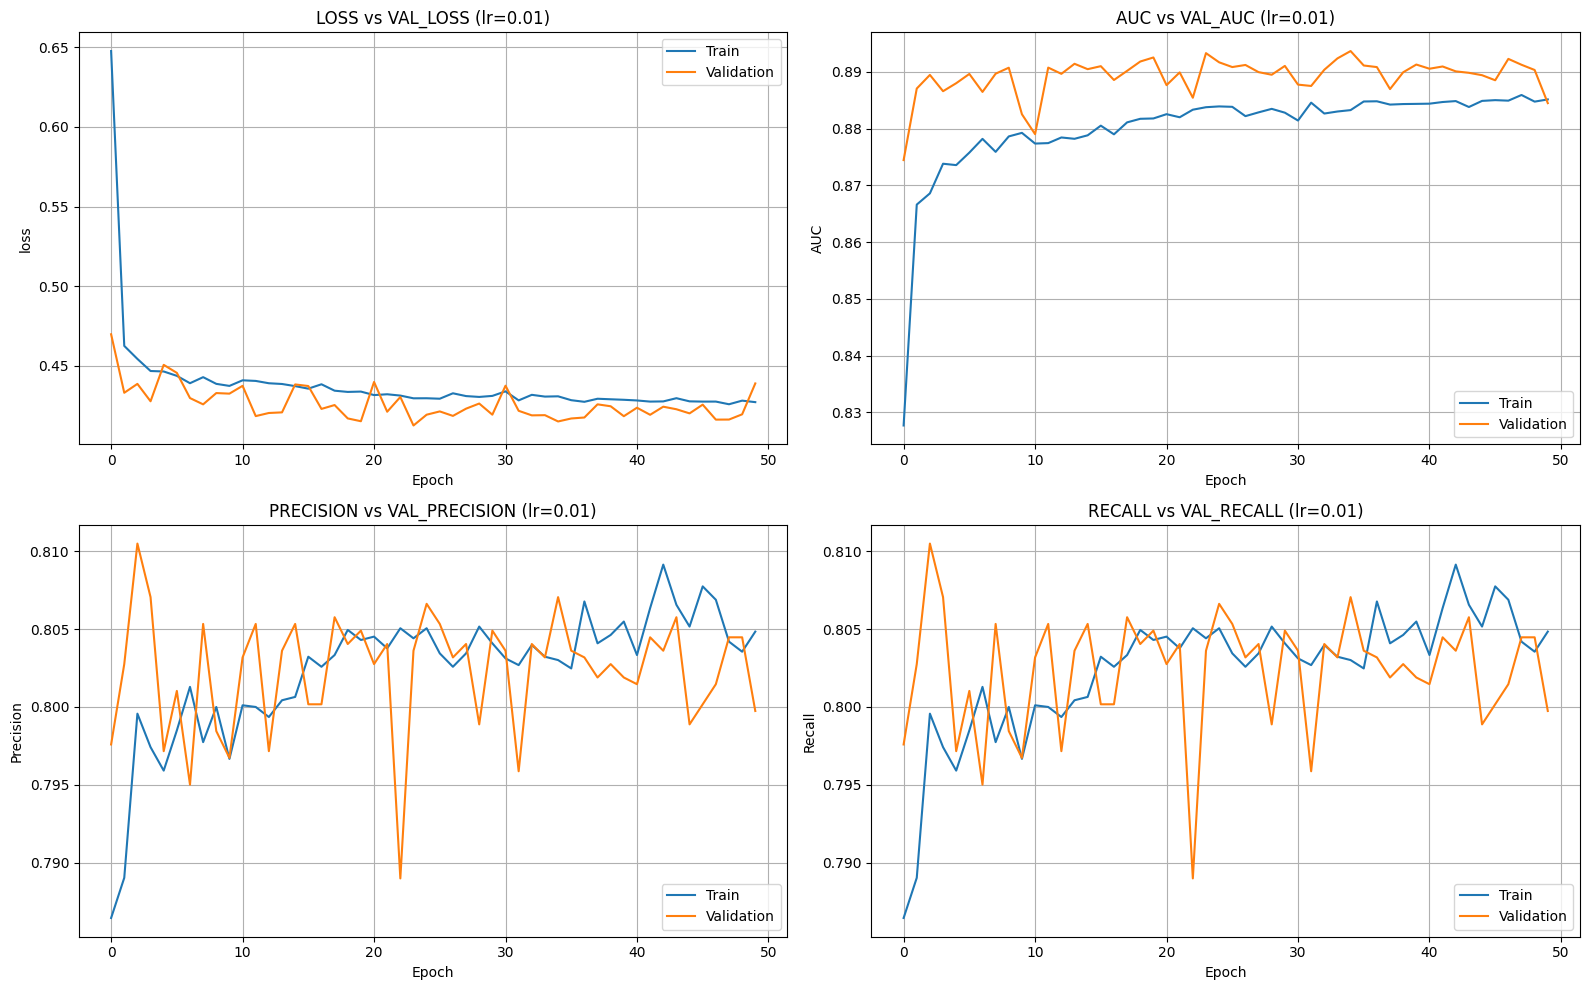


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


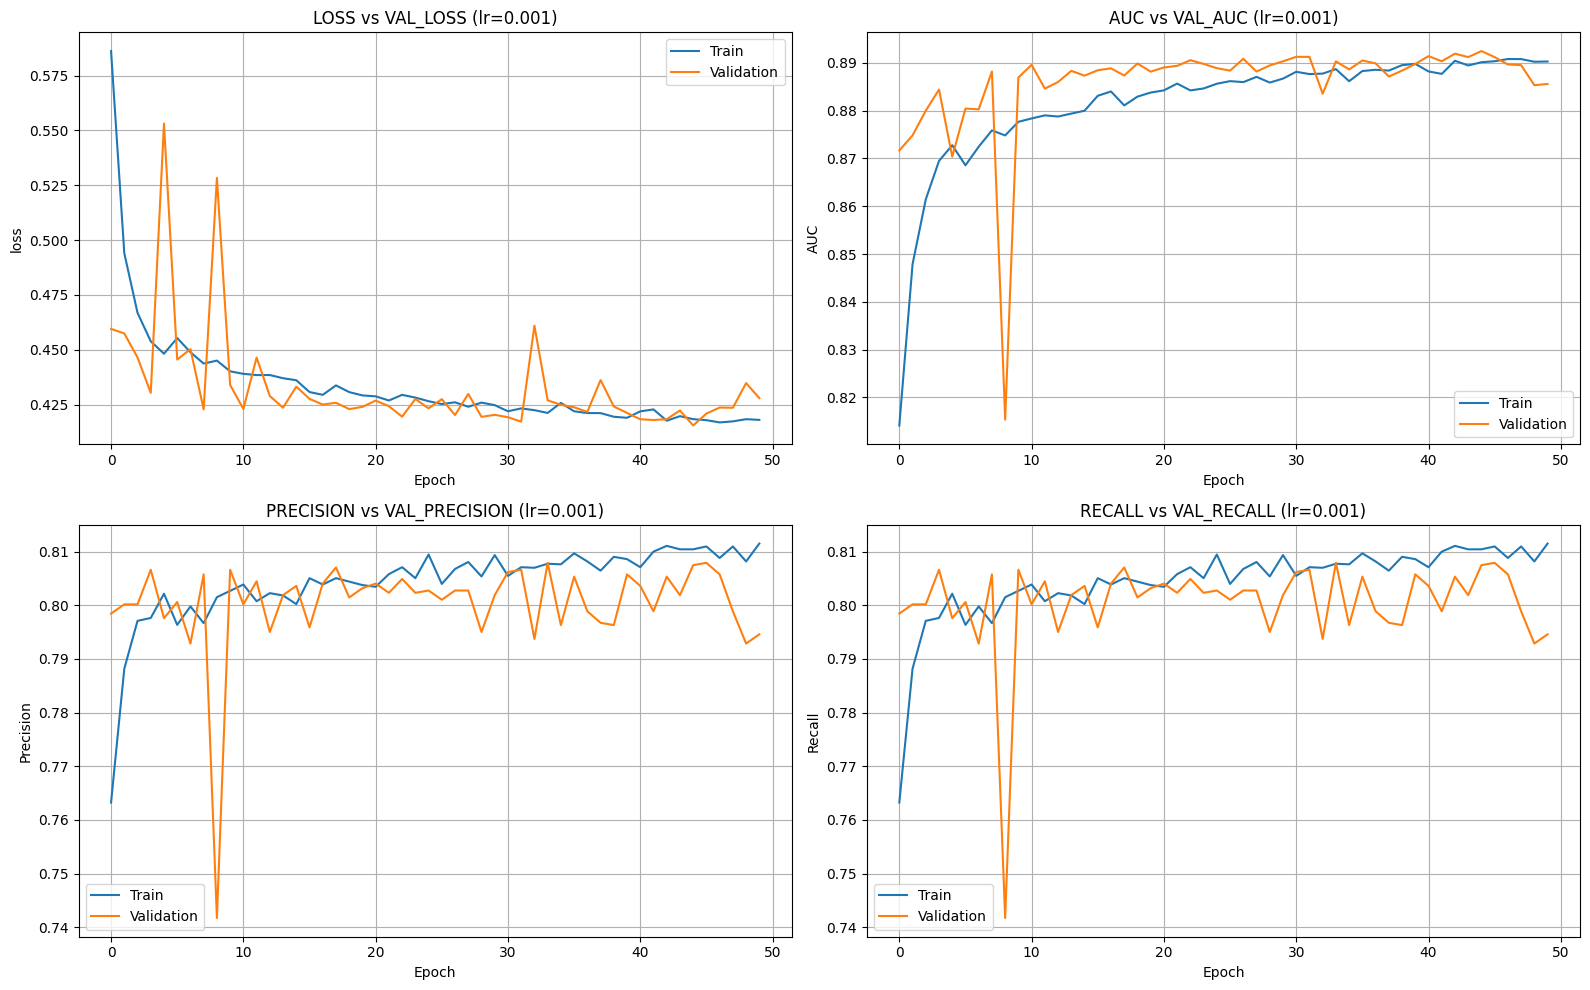


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


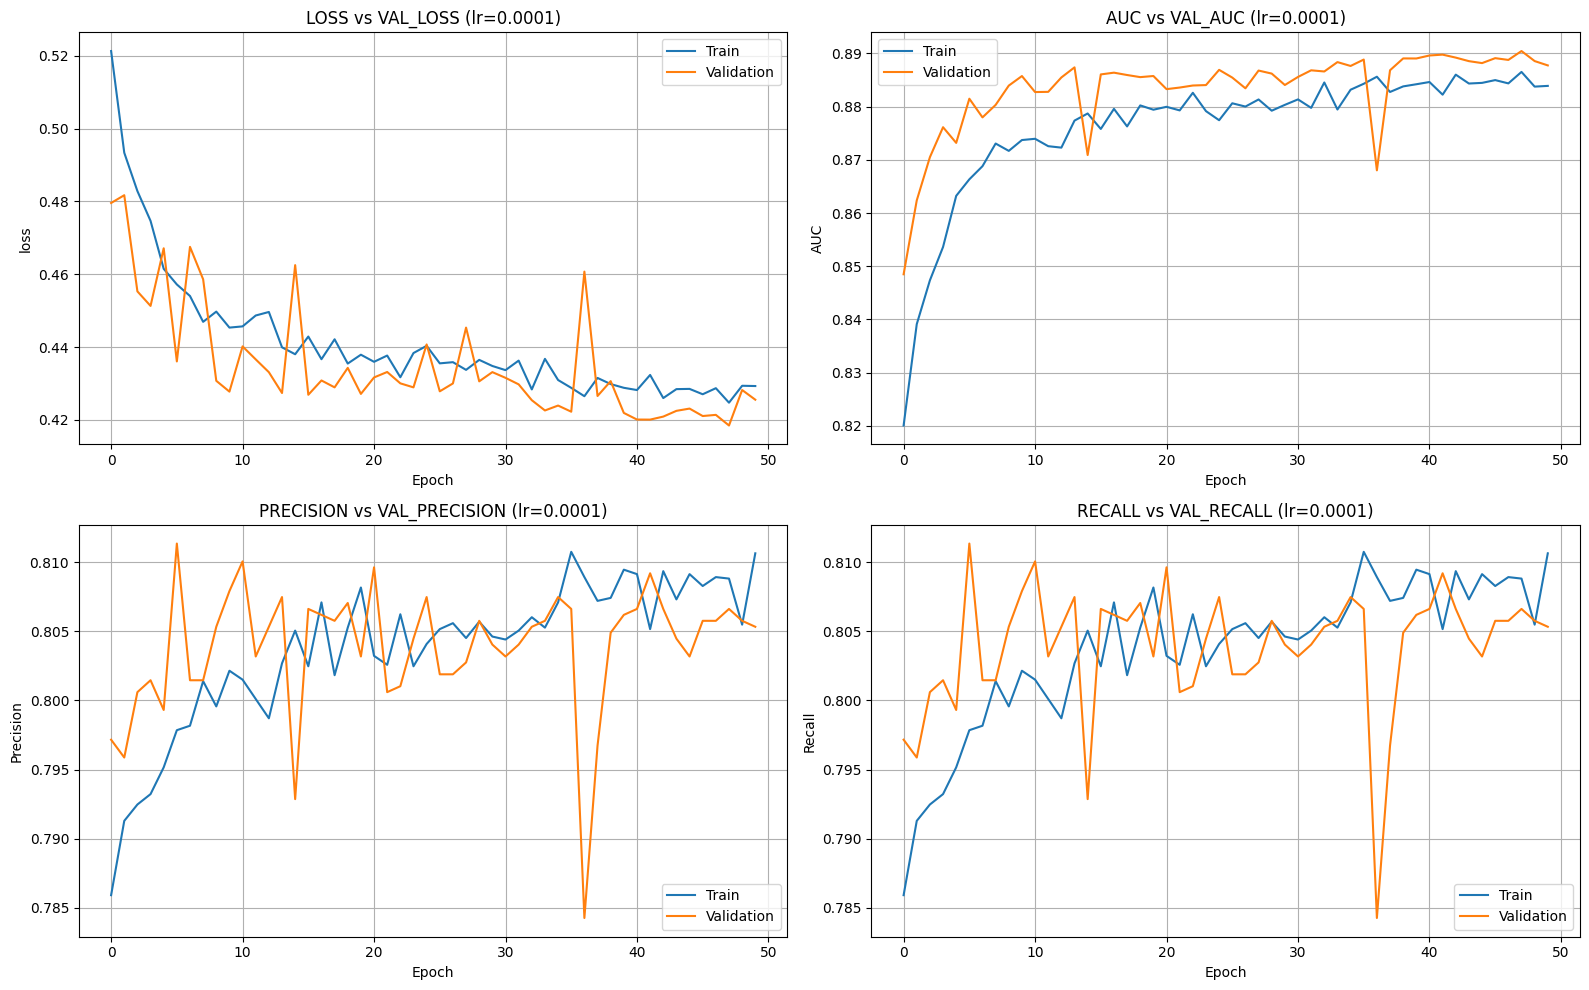


🏆 Best learning rate: 0.01
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


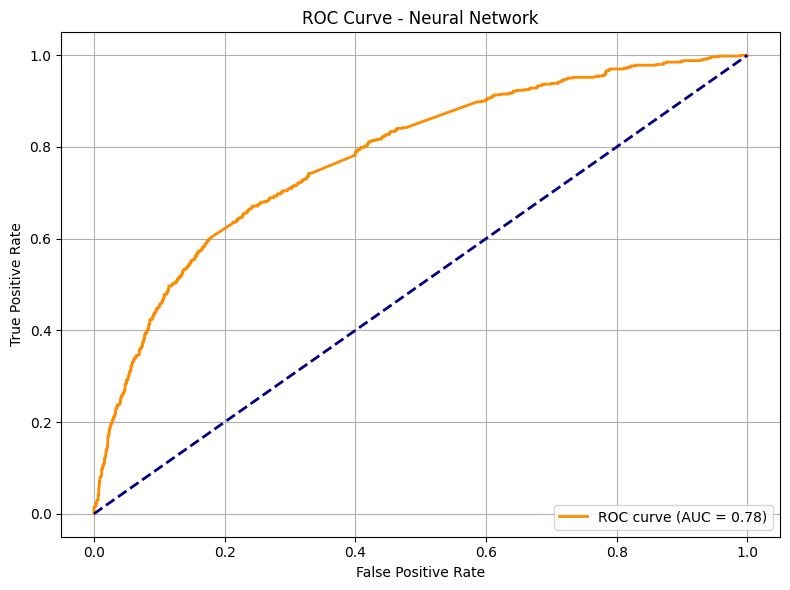

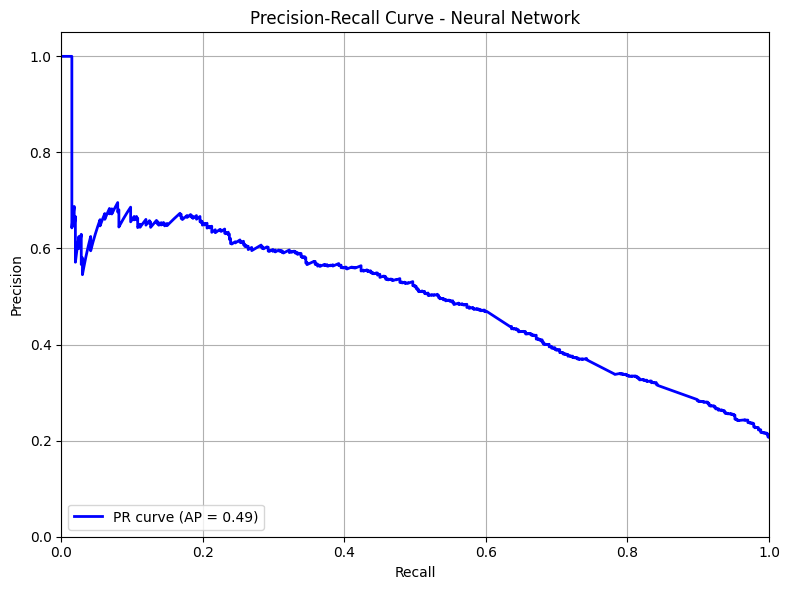

In [32]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train_A_common)
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
#from tensorflow.keras.losses import BinaryFocalCrossentropy



def mlp_model(input_dim, learning_rate=0.001):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(256, activation='relu', name='FC1'),
        layers.Dense(128, activation='relu', name='FC2'),
        layers.Dense(64, activation='relu', name='FC3'),
        layers.Dense(2, activation='softmax', name='Output')  # 2-class softmax
    ])
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # one-hot labels
        #loss=BinaryFocalCrossentropy(gamma=2.0),
        metrics=[tf.keras.metrics.AUC(name='AUC'), 
                 tf.keras.metrics.Precision(name='Precision'), 
                 tf.keras.metrics.Recall(name='Recall')]
    )
    return model
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()

learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model = mlp_model(input_dim=X_train_A_common.shape[1], learning_rate=lr)
    
    #early_stopping = EarlyStopping(monitor='val_AUC', patience=5, mode='max', restore_best_weights=True)
    
    history = model.fit(
        X_train_A_common, y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn2_A_common = best_model.predict(X_test_A_common)[:, 1]  # probability of class 1

#  Decode true labels if one-hot encoded
if y_test_A_common.ndim > 1 and y_test_A_common.shape[1] > 1:
    y_true = np.argmax(y_test_A_common, axis=1)
else:
    y_true = y_test_A_common

# === ROC Curve ===
fpr_nn2_A_common, tpr_nn2_A_common, thresholds_roc_nn2_A_common = roc_curve(y_true, y_proba_nn2_A_common)
roc_auc_nn2_A_common = auc(fpr_nn2_A_common, tpr_nn2_A_common)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn2_A_common, tpr_nn2_A_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn2_A_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn2_A_common, recall_nn2_A_common, thresholds_pr_nn2_A_common = precision_recall_curve(y_true, y_proba_nn2_A_common)
avg_precision_nn2_A_common = average_precision_score(y_true, y_proba_nn2_A_common)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn2_A_common, precision_nn2_A_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn2_A_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

## dfB_common

In [33]:
# 1. Split data into features (X) and target (y)
id_columns_B_common = dfB_common[['subject_id', 'hadm_id']]
X = dfB_common.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
y = dfB_common['mortality_1yr']

# Optional: Standardize if necessary (Random Forest doesn’t need it, but good for comparison later)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 2. Train-Test Split (80/20)
X_train_B_common, X_test_B_common, y_train_B_common, y_test_B_common = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Random Forest B_common

In [34]:
rf_balanced_B_common = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the same hyperparameter grid (or simplify if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# GridSearchCV with 5-fold CV
grid_search_bal = GridSearchCV(
    estimator=rf_balanced_B_common,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_B_common, y_train_B_common)

# Evaluate the best model
best_balanced_rf_B_common = grid_search_bal.best_estimator_
y_pred_bal = best_balanced_rf_B_common.predict(X_test_B_common)
y_proba_bal = best_balanced_rf_B_common.predict_proba(X_test_B_common)[:, 1]

print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_B_common, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_B_common, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_B_common, y_proba_bal))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Balanced Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[1805  503]
 [ 210  391]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      2308
           1       0.44      0.65      0.52       601

    accuracy                           0.75      2909
   macro avg       0.67      0.72      0.68      2909
weighted avg       0.80      0.75      0.77      2909


ROC AUC Score:
0.7886231641660203


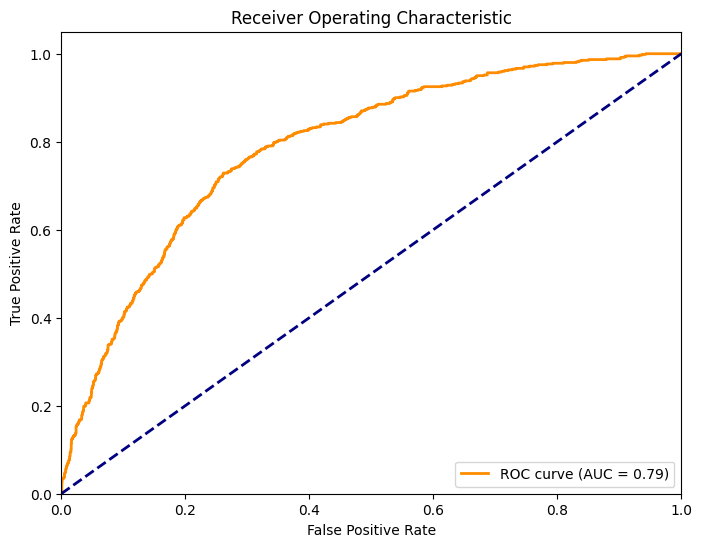

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_balanced_rf_B_common.predict_proba(X_test_B_common)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_rf_B_common, tpr_rf_B_common, thresholds = roc_curve(y_test_B_common, y_proba)

# Compute AUC
roc_auc_rf_B_common = auc(fpr_rf_B_common, tpr_rf_B_common)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_B_common, tpr_rf_B_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_B_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

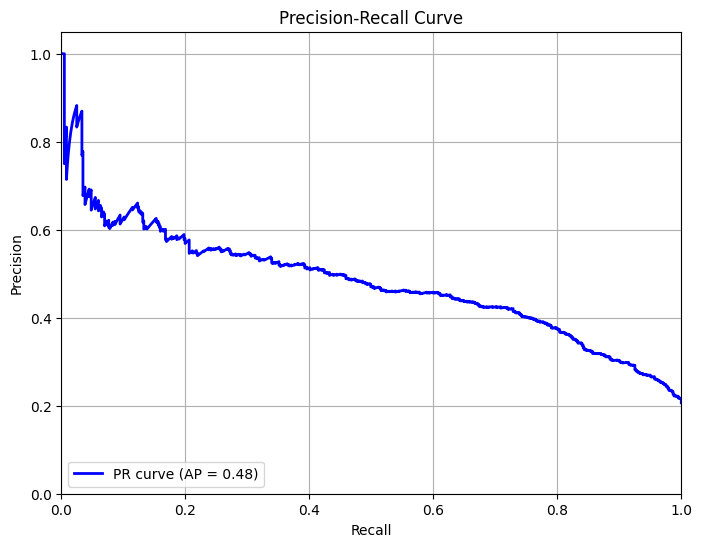

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_balanced_rf_B_common.predict_proba(X_test_B_common)[:, 1]

# Compute PR curve
precision_rf_B_common, recall_rf_B_common, thresholds_pr_B_common = precision_recall_curve(y_test_B_common, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_rf_B_common = average_precision_score(y_test_B_common, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_B_common, precision_rf_B_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_rf_B_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### Logistic regression B common

In [37]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model with balanced class weights
log_reg_balanced_B_common = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define the hyperparameter grid (simpler than RF)
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2']             # Type of regularization
}

# GridSearchCV with 5-fold cross-validation
grid_search_bal = GridSearchCV(
    estimator=log_reg_balanced_B_common,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_B_common, y_train_B_common)

# Evaluate the best model
best_log_reg_B_common = grid_search_bal.best_estimator_
y_pred_bal = best_log_reg_B_common.predict(X_test_B_common)
y_proba_bal = best_log_reg_B_common.predict_proba(X_test_B_common)[:, 1]

# Print results
print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_B_common, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_B_common, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_B_common, y_proba_bal))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Balanced Parameters: {'C': 0.1, 'penalty': 'l1'}

Confusion Matrix:
[[1675  633]
 [ 196  405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      2308
           1       0.39      0.67      0.49       601

    accuracy                           0.72      2909
   macro avg       0.64      0.70      0.65      2909
weighted avg       0.79      0.72      0.74      2909


ROC AUC Score:
0.7697194450612354


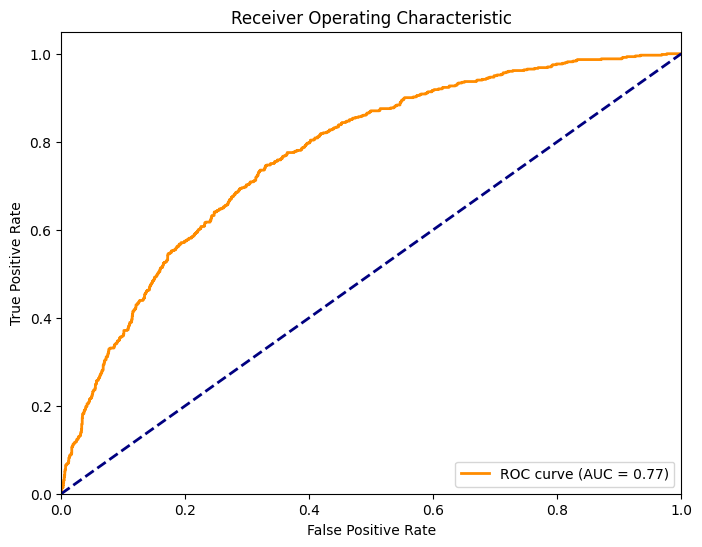

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_log_reg_B_common.predict_proba(X_test_B_common)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_lr_B_common, tpr_lr_B_common, thresholds_B_common = roc_curve(y_test_B_common, y_proba)

# Compute AUC
roc_auc_lr_B_common = auc(fpr_lr_B_common, tpr_lr_B_common)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_B_common, tpr_lr_B_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr_B_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

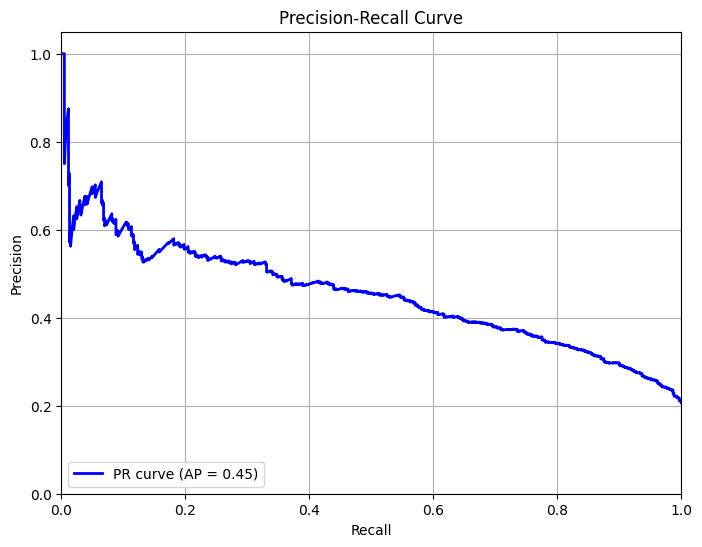

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_log_reg_B_common.predict_proba(X_test_B_common)[:, 1]

# Compute PR curve
precision_lr_B_common, recall_lr_B_common, thresholds_pr_B_common = precision_recall_curve(y_test_B_common, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_lr_B_common = average_precision_score(y_test_B_common, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr_B_common, precision_lr_B_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_lr_B_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


### MLP B_Common

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

def mlp_model(input_dim=X_train_B_common.shape[1]):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(128, activation='relu', name='FC1'),
        layers.Dense(256, activation='relu', name='FC7'),
        layers.Dense(128, activation='relu', name='FC8'),
        layers.Dense(1, activation='sigmoid', name='Output')  # binary classification
    ])
    return model


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall
# Assume model is already built with mlp_model()
model = mlp_model(input_dim=X_train_B_common.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # You can also use 'val_auc' if tracking AUC
    patience=5,               # Number of epochs to wait for improvement
    restore_best_weights=True # Restore best weights after stopping
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_B_common,
    y_train_B_common,
    epochs=100,                # Higher max epochs (ES will stop early)
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
291/291 - 2s - 6ms/step - AUC: 0.5998 - Precision: 0.3348 - Recall: 0.1193 - loss: 0.5753 - val_AUC: 0.6866 - val_Precision: 0.3712 - val_Recall: 0.1045 - val_loss: 0.5267
Epoch 2/100
291/291 - 0s - 1ms/step - AUC: 0.6809 - Precision: 0.4601 - Recall: 0.0863 - loss: 0.4846 - val_AUC: 0.7183 - val_Precision: 0.3705 - val_Recall: 0.5032 - val_loss: 0.5397
Epoch 3/100
291/291 - 0s - 1ms/step - AUC: 0.7061 - Precision: 0.5088 - Recall: 0.1493 - loss: 0.4708 - val_AUC: 0.7407 - val_Precision: 0.6392 - val_Recall: 0.1322 - val_loss: 0.4446
Epoch 4/100
291/291 - 0s - 1ms/step - AUC: 0.7521 - Precision: 0.5815 - Recall: 0.2211 - loss: 0.4444 - val_AUC: 0.7452 - val_Precision: 0.6588 - val_Recall: 0.1194 - val_loss: 0.4433
Epoch 5/100
291/291 - 0s - 1ms/step - AUC: 0.7499 - Precision: 0.5580 - Recall: 0.2138 - loss: 0.4453 - val_AUC: 0.7482 - val_Precision: 0.6531 - val_Recall: 0.0682 - val_loss: 0.4599
Epoch 6/100
291/291 - 0s - 2ms/step - AUC: 0.7572 - Precision: 0.5710 - Recall: 

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


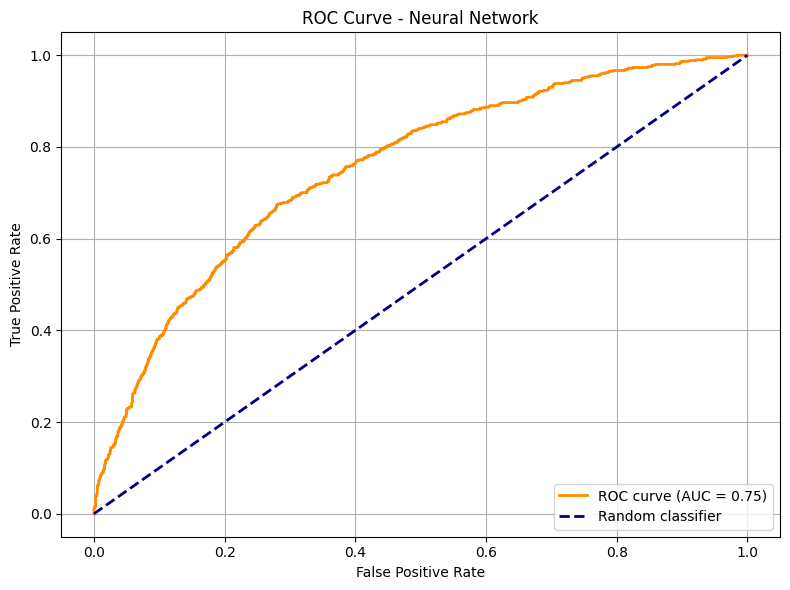

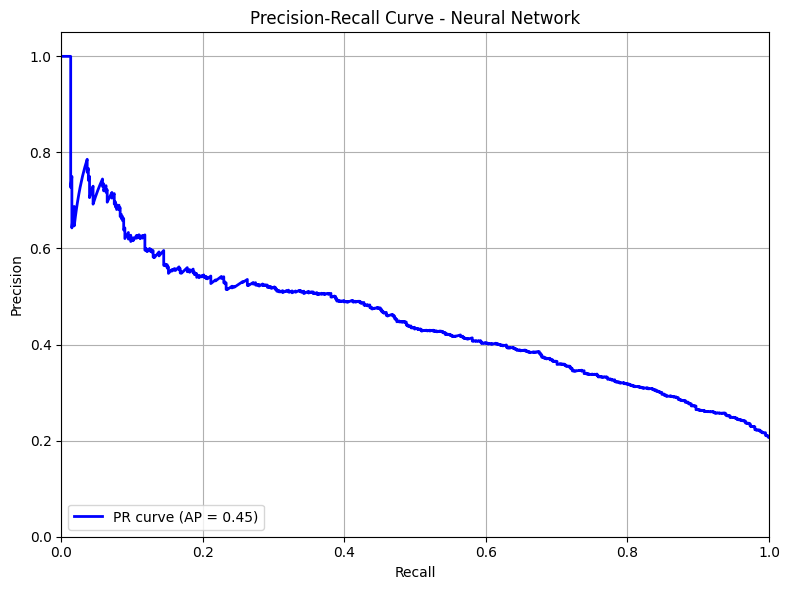

In [42]:
import matplotlib.pyplot as plt
# Predict probabilities
y_proba_nn_B_common = model.predict(X_test_B_common).ravel()

# === ROC Curve ===
from sklearn.metrics import roc_curve, auc
fpr_nn_B_common, tpr_nn_B_common, thresholds_nn_B_common = roc_curve(y_test_B_common, y_proba_nn_B_common)
roc_auc_nn_B_common = auc(fpr_nn_B_common, tpr_nn_B_common)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_B_common, tpr_nn_B_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_B_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_nn_B_common, recall_nn_B_common, thresholds_nn_B_common = precision_recall_curve(y_test_B_common, y_proba_nn_B_common)
avg_precision_nn_B_common = average_precision_score(y_test_B_common, y_proba_nn_B_common)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_B_common, precision_nn_B_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_B_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

### MLP New B_Common

In [43]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train_B_common)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
#from tensorflow.keras.losses import BinaryFocalCrossentropy



def mlp_model(input_dim, learning_rate=0.001):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(256, activation='relu', name='FC1'),
        layers.Dense(128, activation='relu', name='FC2'),
        layers.Dense(64, activation='relu', name='FC3'),
        layers.Dense(2, activation='softmax', name='Output')  # 2-class softmax
    ])
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # one-hot labels
        #loss=BinaryFocalCrossentropy(gamma=2.0),
        metrics=[tf.keras.metrics.AUC(name='AUC'), 
                 tf.keras.metrics.Precision(name='Precision'), 
                 tf.keras.metrics.Recall(name='Recall')]
    )
    return model

In [45]:
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()



 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


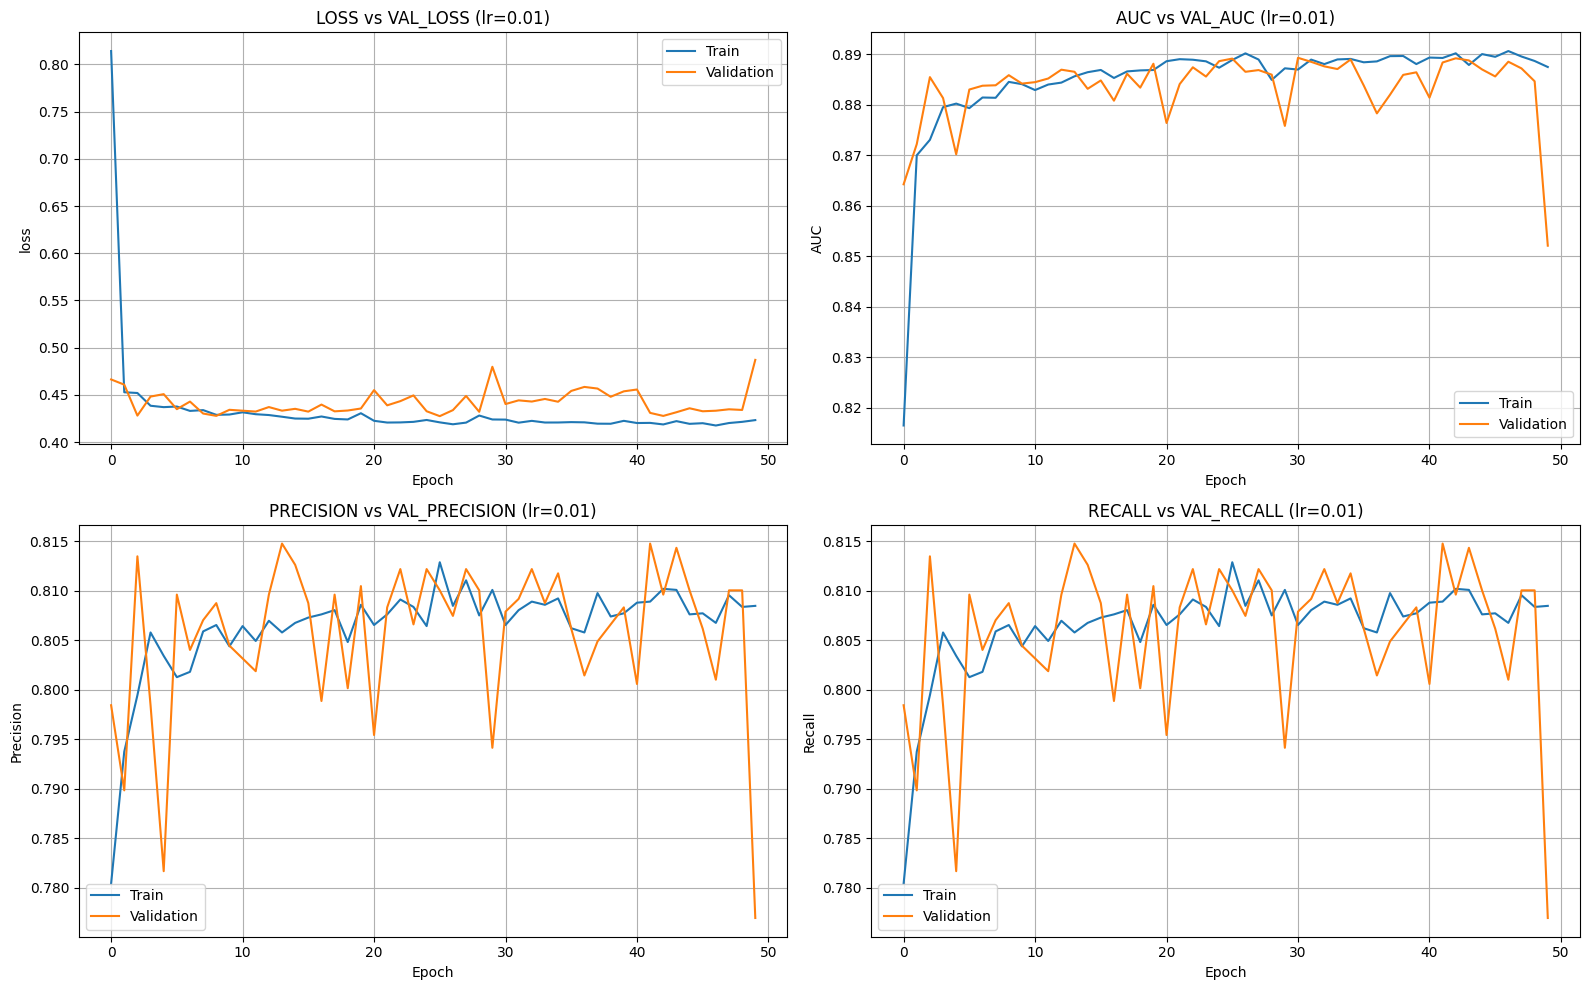


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


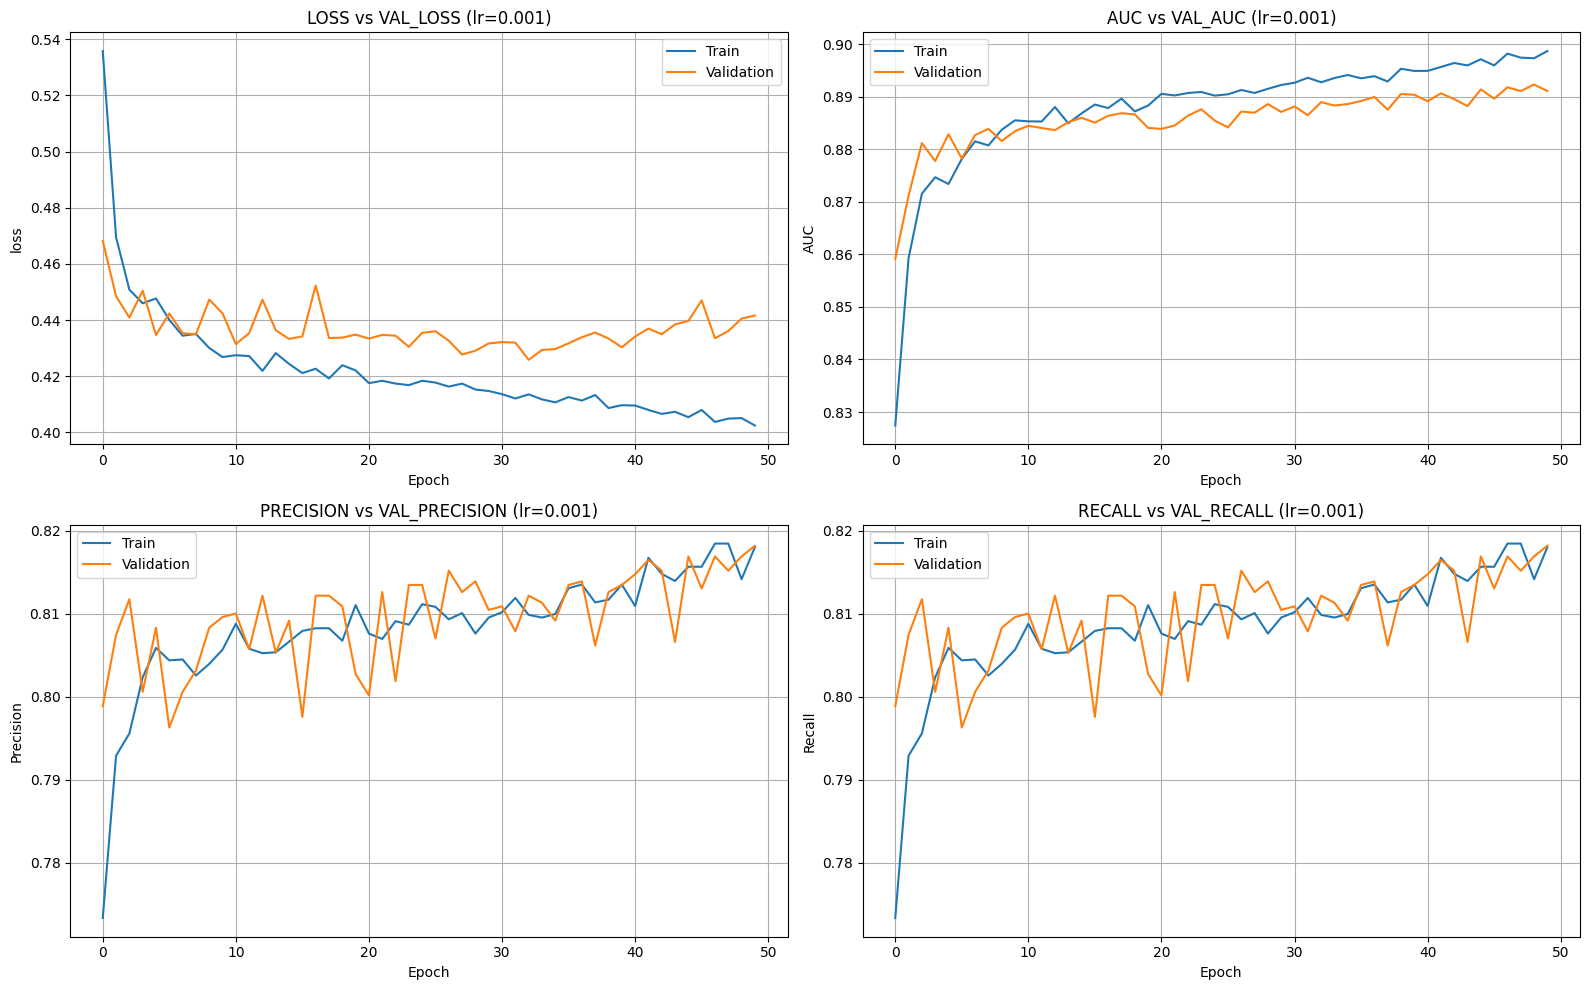


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


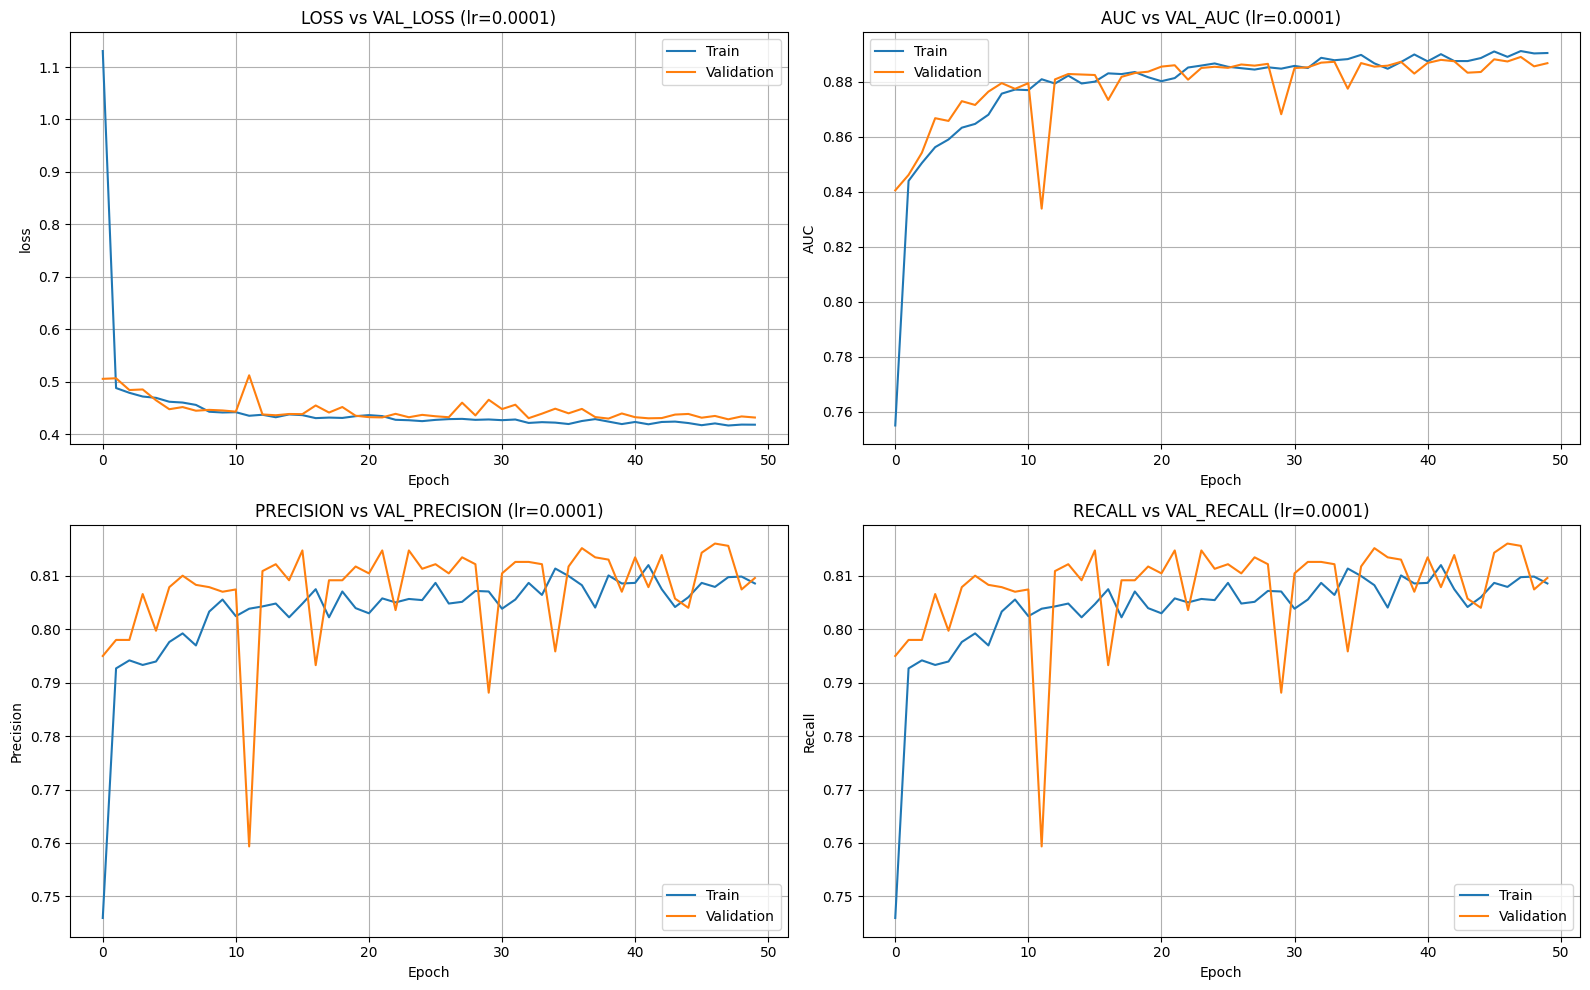


🏆 Best learning rate: 0.001


In [46]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model = mlp_model(input_dim=X_train_B_common.shape[1], learning_rate=lr)
    
    #early_stopping = EarlyStopping(monitor='val_AUC', patience=5, mode='max', restore_best_weights=True)
    
    history = model.fit(
        X_train_B_common, y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


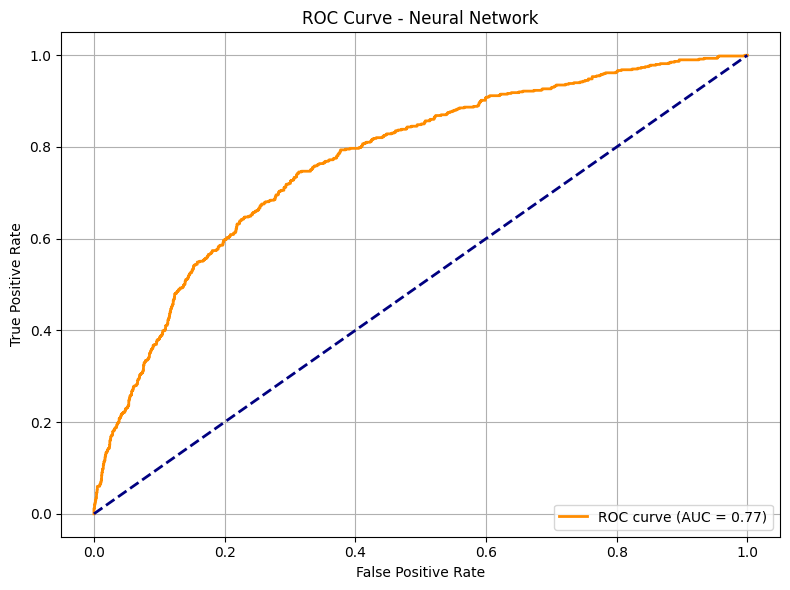

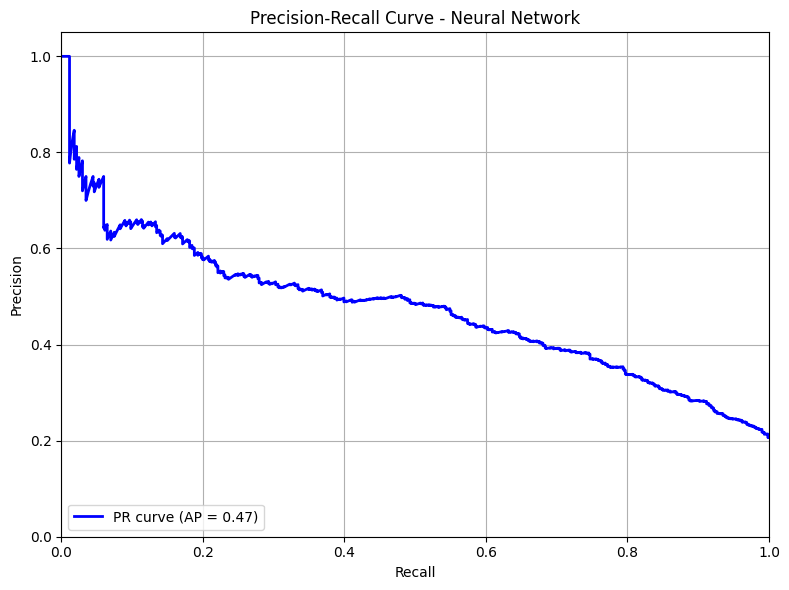

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn2_B_common = best_model.predict(X_test_B_common)[:, 1]  # probability of class 1

#  Decode true labels if one-hot encoded
if y_test_B_common.ndim > 1 and y_test_B_common.shape[1] > 1:
    y_true = np.argmax(y_test_B_common, axis=1)
else:
    y_true = y_test_B_common

# === ROC Curve ===
fpr_nn2_B_common, tpr_nn2_B_common, thresholds_roc_nn2_B_common = roc_curve(y_true, y_proba_nn2_B_common)
roc_auc_nn2_B_common = auc(fpr_nn2_B_common, tpr_nn2_B_common)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn2_B_common, tpr_nn2_B_common, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn2_B_common:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn2_B_common, recall_nn2_B_common, thresholds_pr_nn2_B_common = precision_recall_curve(y_true, y_proba_nn2_B_common)
avg_precision_nn2_B_common = average_precision_score(y_true, y_proba_nn2_B_common)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn2_B_common, precision_nn2_B_common, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn2_B_common:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

## A+common

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1. Split data into features (X) and target (y)
id_columns_A = dfA[['subject_id', 'hadm_id']]
X = dfA.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
y = dfA['mortality_1yr']

# Optional: Standardize if necessary (Random Forest doesn’t need it, but good for comparison later)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 2. Train-Test Split (80/20)
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Random Forest A

In [49]:
rf_balanced_A = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the same hyperparameter grid (or simplify if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# GridSearchCV with 5-fold CV
grid_search_bal = GridSearchCV(
    estimator=rf_balanced_A,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_A, y_train_A)

# Evaluate the best model
best_balanced_rf_A = grid_search_bal.best_estimator_
y_pred_bal = best_balanced_rf_A.predict(X_test_A)
y_proba_bal = best_balanced_rf_A.predict_proba(X_test_A)[:, 1]

print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_A, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_A, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_A, y_proba_bal))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Balanced Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[2064  243]
 [ 305  297]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2307
           1       0.55      0.49      0.52       602

    accuracy                           0.81      2909
   macro avg       0.71      0.69      0.70      2909
weighted avg       0.80      0.81      0.81      2909


ROC AUC Score:
0.8352349558688205


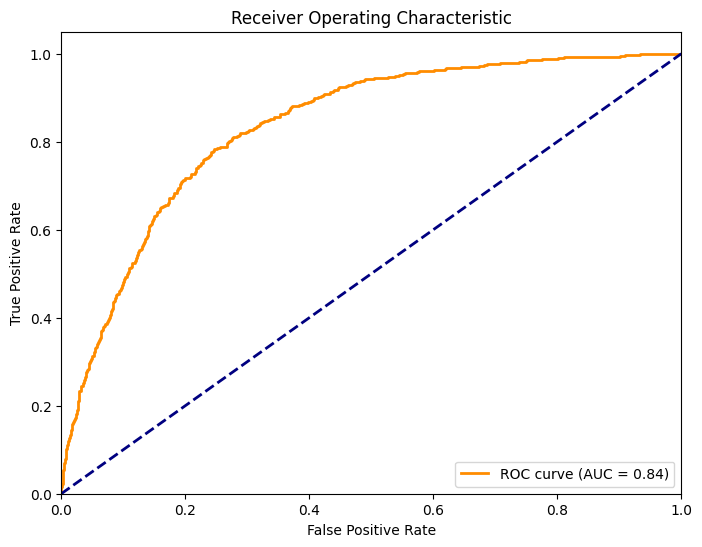

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_balanced_rf_A.predict_proba(X_test_A)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_rf_A, tpr_rf_A, thresholds = roc_curve(y_test_A, y_proba)

# Compute AUC
roc_auc_rf_A = auc(fpr_rf_A, tpr_rf_A)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_A, tpr_rf_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

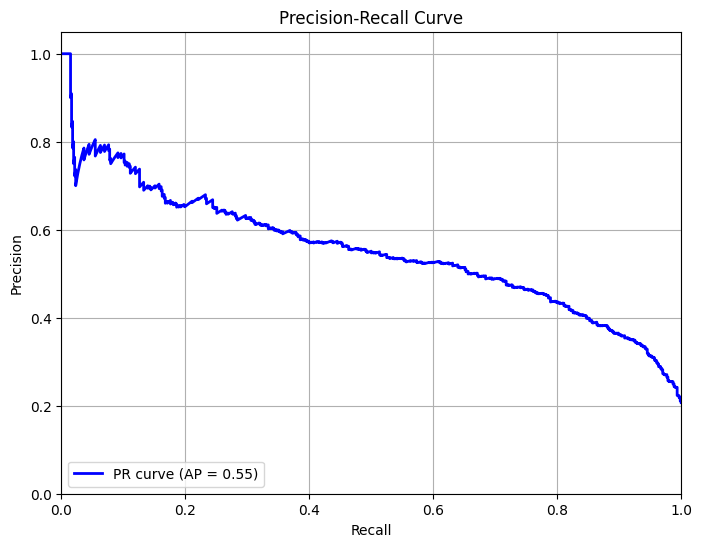

In [51]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_balanced_rf_A.predict_proba(X_test_A)[:, 1]

# Compute PR curve
precision_rf_A, recall_rf_A, thresholds_pr_A = precision_recall_curve(y_test_A, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_rf_A = average_precision_score(y_test_A, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_A, precision_rf_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_rf_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### Logistic Regression A

In [52]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model with balanced class weights
log_reg_balanced_A = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define the hyperparameter grid (simpler than RF)
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2']             # Type of regularization
}

# GridSearchCV with 5-fold cross-validation
grid_search_bal = GridSearchCV(
    estimator=log_reg_balanced_A,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_A, y_train_A)

# Evaluate the best model
best_log_reg_A = grid_search_bal.best_estimator_
y_pred_bal = best_log_reg_A.predict(X_test_A)
y_proba_bal = best_log_reg_A.predict_proba(X_test_A)[:, 1]

# Print results
print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_A, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_A, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_A, y_proba_bal))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Balanced Parameters: {'C': 10, 'penalty': 'l1'}

Confusion Matrix:
[[1704  603]
 [ 171  431]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      2307
           1       0.42      0.72      0.53       602

    accuracy                           0.73      2909
   macro avg       0.66      0.73      0.67      2909
weighted avg       0.81      0.73      0.76      2909


ROC AUC Score:
0.8083667071328485


c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


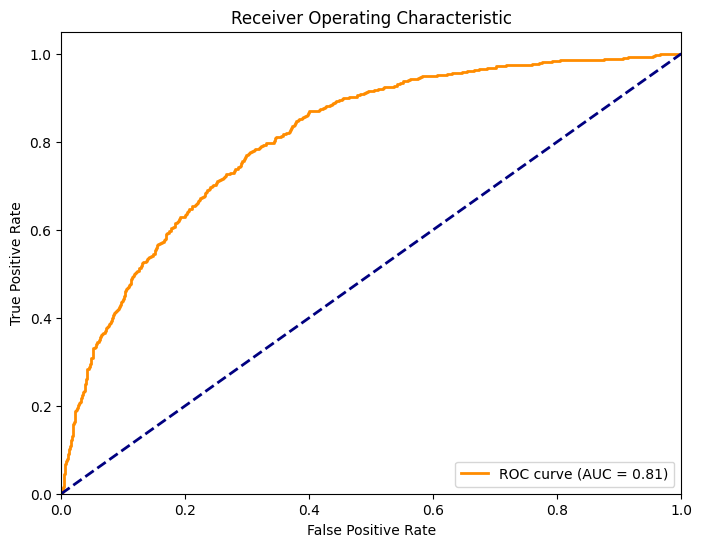

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_log_reg_A.predict_proba(X_test_A)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_lr_A, tpr_lr_A, thresholds_lr_common = roc_curve(y_test_A, y_proba)

# Compute AUC
roc_auc_lr_A = auc(fpr_lr_A, tpr_lr_A)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_A, tpr_lr_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

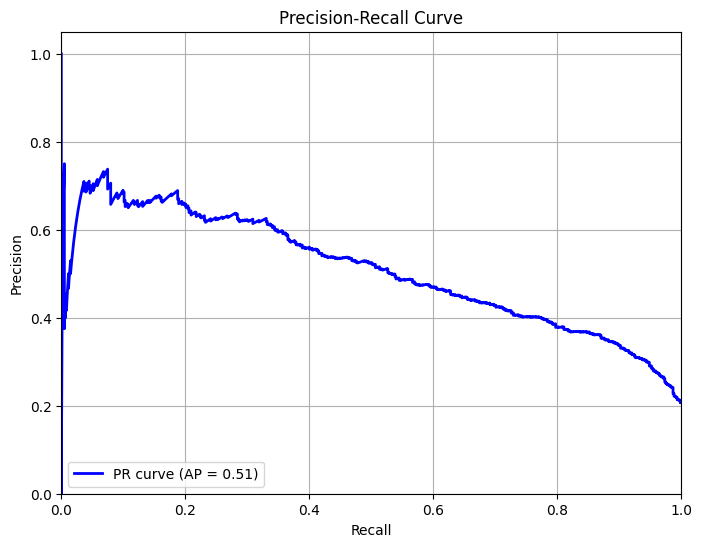

In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# Compute predicted probabilities (already done)
y_proba = best_log_reg_A.predict_proba(X_test_A)[:, 1]

# Compute PR curve
precision_lr_A, recall_lr_A, thresholds_lr_A = precision_recall_curve(y_test_A, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_lr_A = average_precision_score(y_test_A, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr_A, precision_lr_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_lr_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### MLP A

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models

def mlp_model(input_dim=X_train_A.shape[1]):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(128, activation='relu', name='FC1'),
        layers.Dense(256, activation='relu', name='FC7'),
        layers.Dense(128, activation='relu', name='FC8'),
        layers.Dense(1, activation='sigmoid', name='Output')  # binary classification
    ])
    return model

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall
# Assume model is already built with mlp_model()
model = mlp_model(input_dim=X_train_A.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # You can also use 'val_auc' if tracking AUC
    patience=5,               # Number of epochs to wait for improvement
    restore_best_weights=True # Restore best weights after stopping
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_A,
    y_train_A,
    epochs=100,                # Higher max epochs (ES will stop early)
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
291/291 - 2s - 6ms/step - AUC: 0.6390 - Precision: 0.3499 - Recall: 0.2079 - loss: 0.7780 - val_AUC: 0.7406 - val_Precision: 0.4921 - val_Recall: 0.1975 - val_loss: 0.4691
Epoch 2/100
291/291 - 0s - 2ms/step - AUC: 0.6525 - Precision: 0.3762 - Recall: 0.1846 - loss: 0.5444 - val_AUC: 0.6992 - val_Precision: 0.5882 - val_Recall: 0.0212 - val_loss: 0.4990
Epoch 3/100
291/291 - 0s - 1ms/step - AUC: 0.6990 - Precision: 0.4834 - Recall: 0.1727 - loss: 0.4794 - val_AUC: 0.7395 - val_Precision: 0.4635 - val_Recall: 0.2696 - val_loss: 0.4848
Epoch 4/100
291/291 - 0s - 1ms/step - AUC: 0.7197 - Precision: 0.5496 - Recall: 0.1691 - loss: 0.4624 - val_AUC: 0.7655 - val_Precision: 0.5127 - val_Recall: 0.2994 - val_loss: 0.4650
Epoch 5/100
291/291 - 0s - 1ms/step - AUC: 0.7228 - Precision: 0.5425 - Recall: 0.2011 - loss: 0.4635 - val_AUC: 0.7665 - val_Precision: 0.5455 - val_Recall: 0.0892 - val_loss: 0.4528
Epoch 6/100
291/291 - 0s - 1ms/step - AUC: 0.7365 - Precision: 0.5614 - Recall: 

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


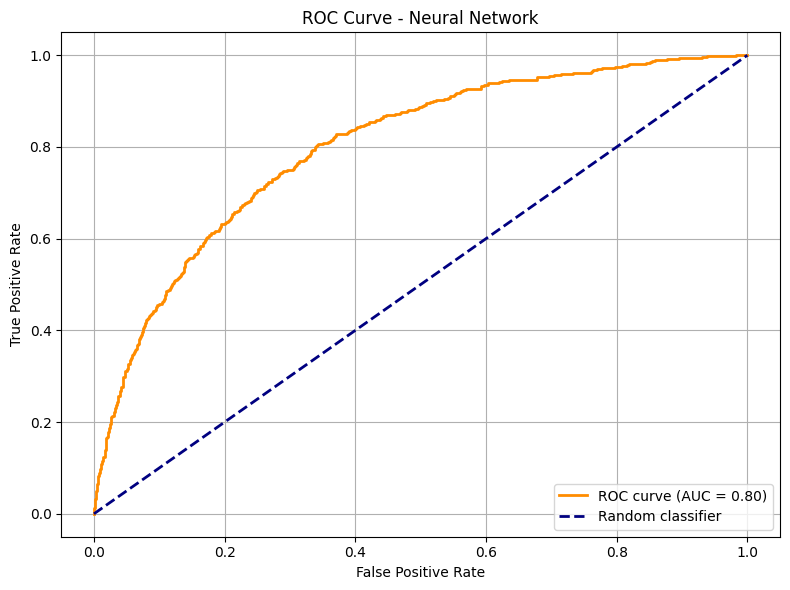

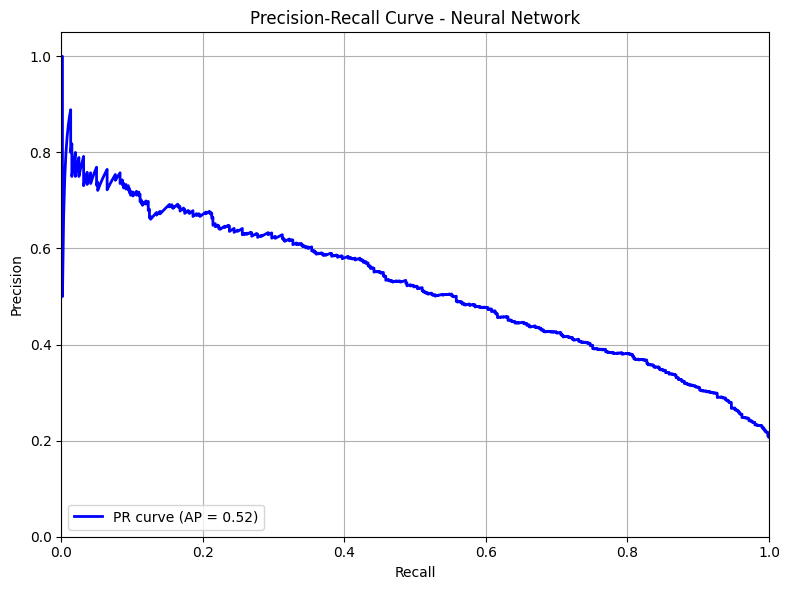

In [57]:
import matplotlib.pyplot as plt
# Predict probabilities
y_proba_nn_A = model.predict(X_test_A).ravel()

# === ROC Curve ===
from sklearn.metrics import roc_curve, auc
fpr_nn_A, tpr_nn_A, thresholds_nn_A = roc_curve(y_test_A, y_proba_nn_A)
roc_auc_nn_A = auc(fpr_nn_A, tpr_nn_A)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_A, tpr_nn_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_nn_A, recall_nn_A, thresholds_nn_A = precision_recall_curve(y_test_A, y_proba_nn_A)
avg_precision_nn_A = average_precision_score(y_test_A, y_proba_nn_A)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_A, precision_nn_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

### MLP New A

In [58]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train_A)

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
#from tensorflow.keras.losses import BinaryFocalCrossentropy



def mlp_model(input_dim, learning_rate=0.001):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(256, activation='relu', name='FC1'),
        layers.Dense(128, activation='relu', name='FC2'),
        layers.Dense(64, activation='relu', name='FC3'),
        layers.Dense(2, activation='softmax', name='Output')  # 2-class softmax
    ])
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # one-hot labels
        #loss=BinaryFocalCrossentropy(gamma=2.0),
        metrics=[tf.keras.metrics.AUC(name='AUC'), 
                 tf.keras.metrics.Precision(name='Precision'), 
                 tf.keras.metrics.Recall(name='Recall')]
    )
    return model

In [60]:
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()



 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


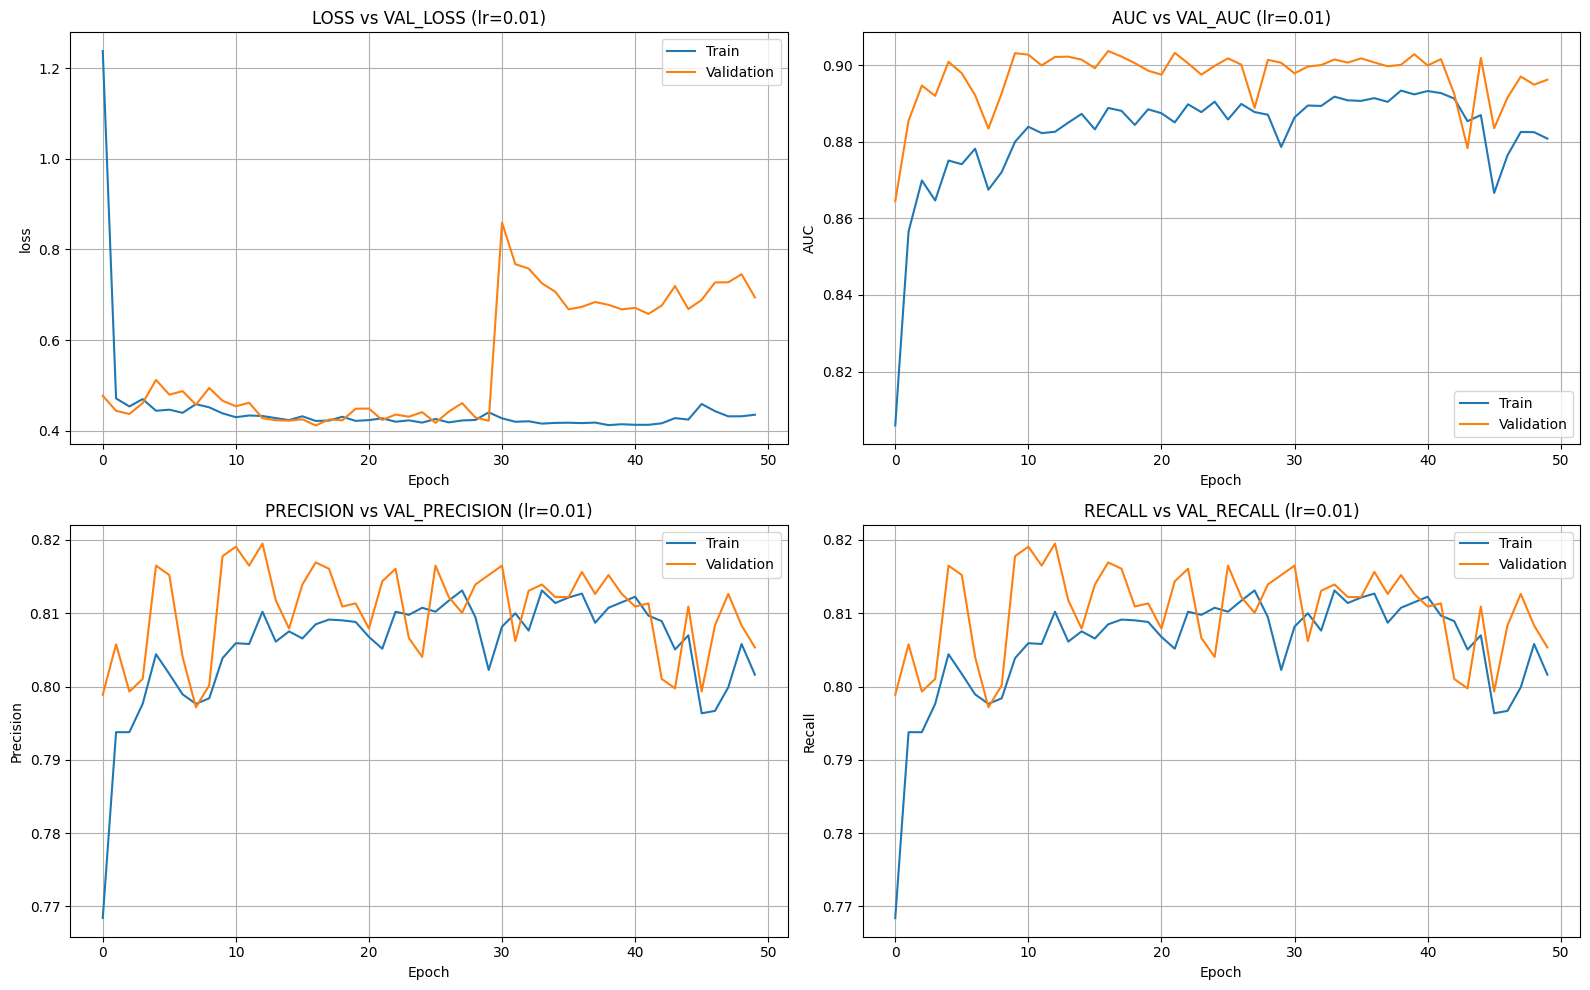


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


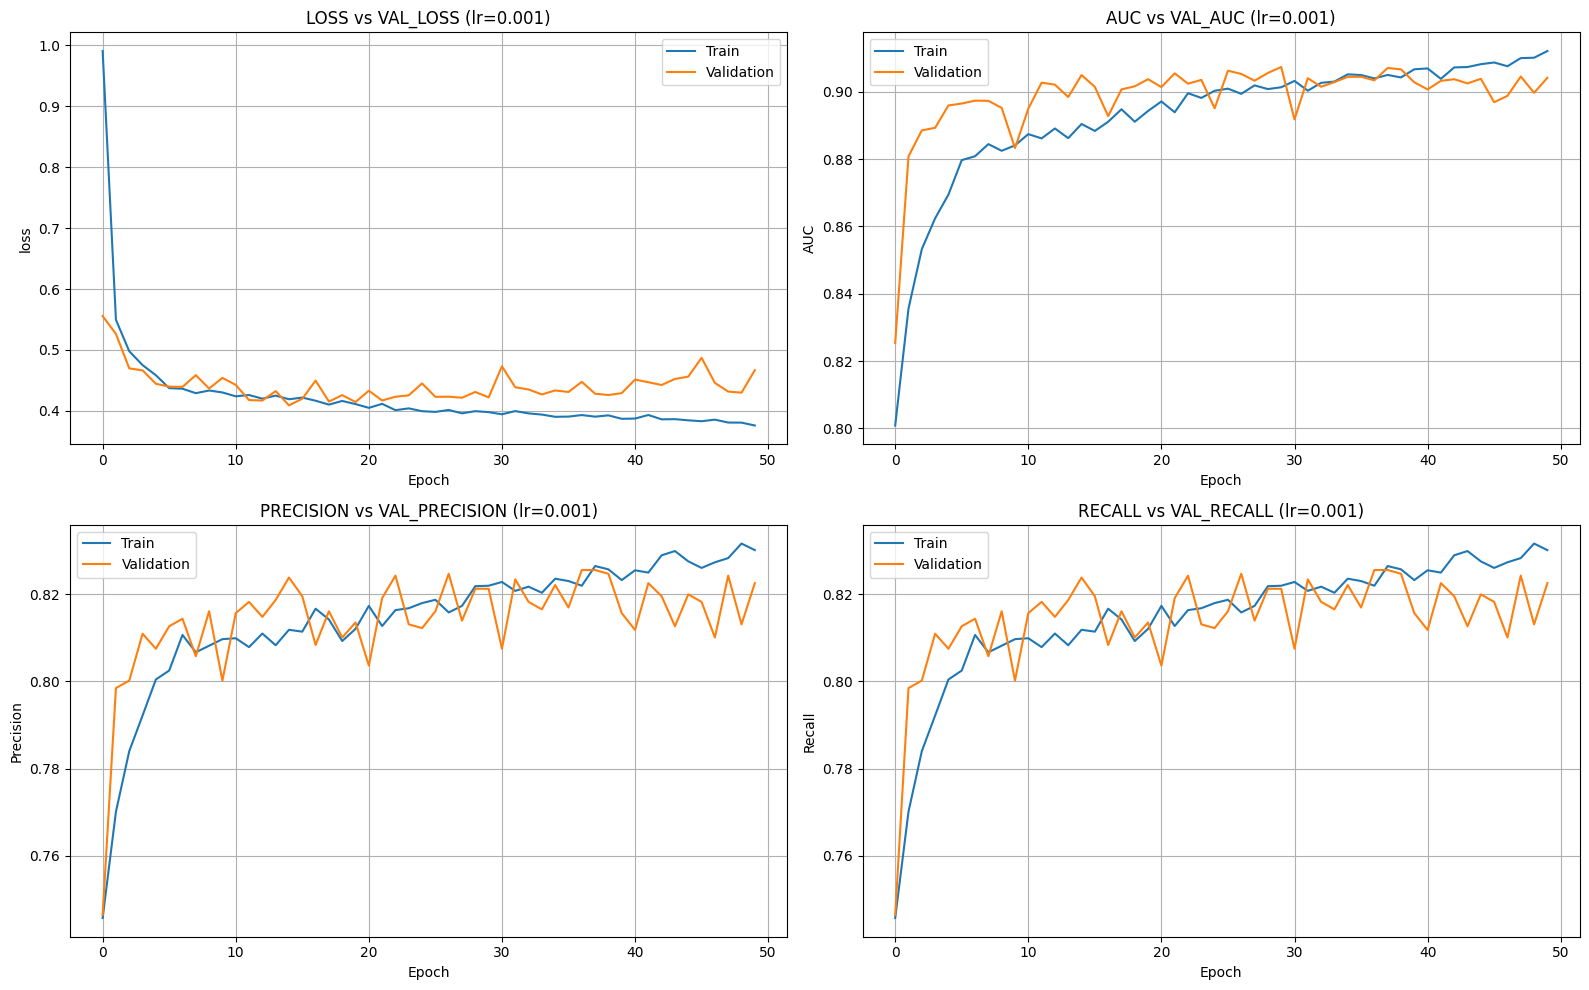


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


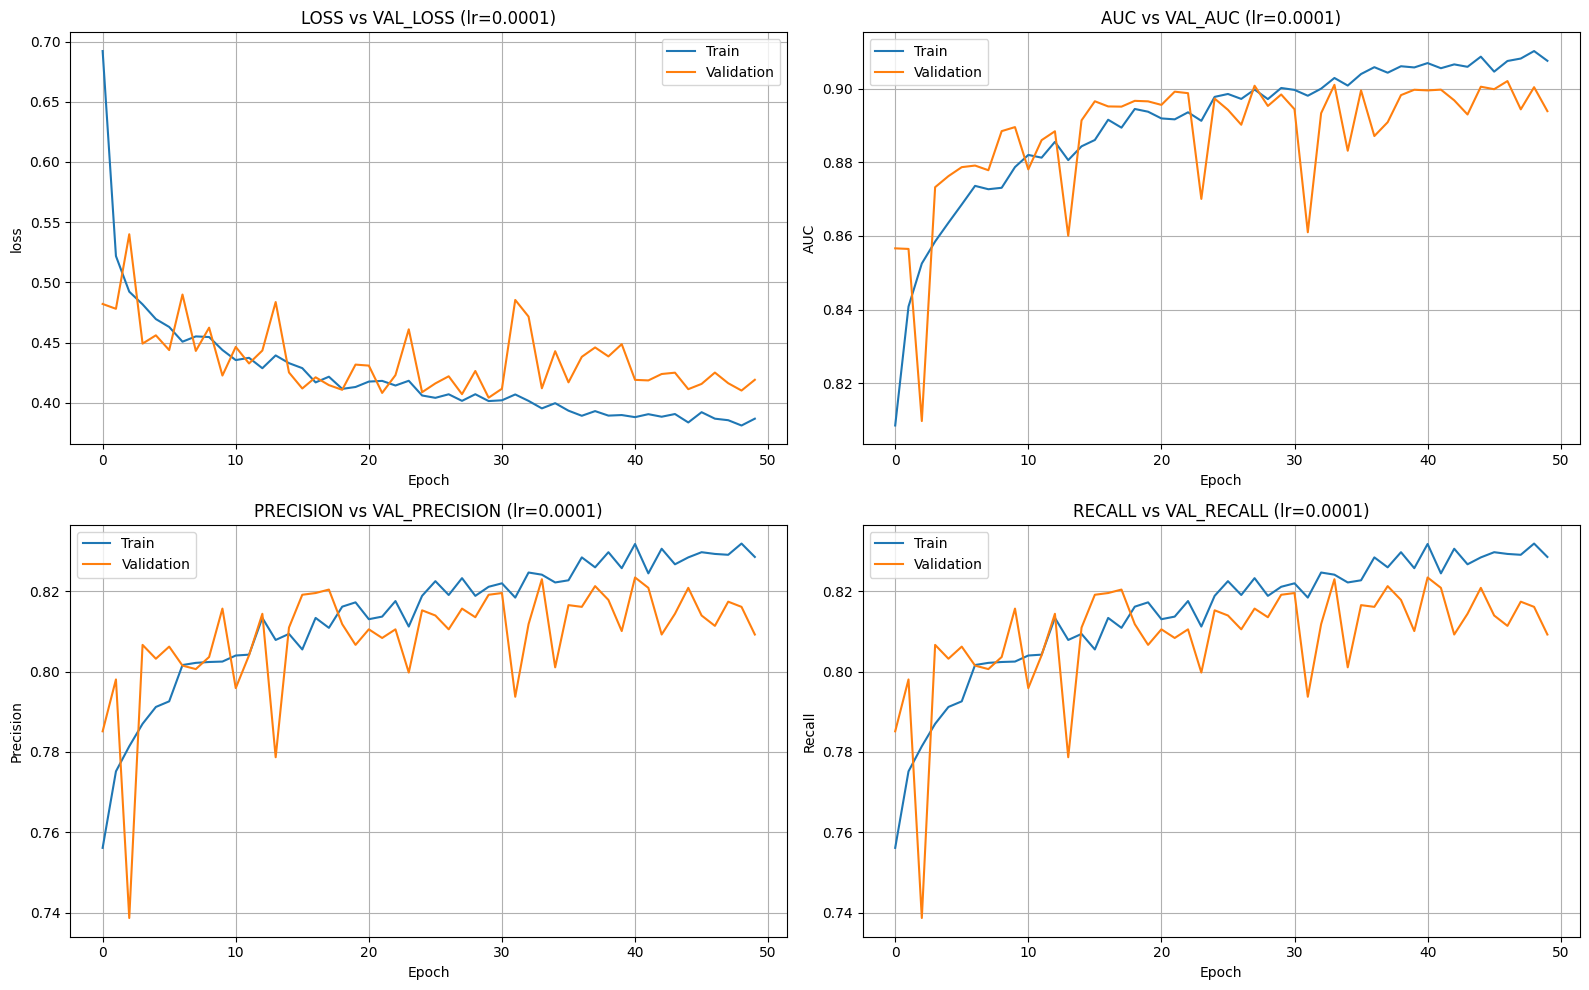


🏆 Best learning rate: 0.001


In [61]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model = mlp_model(input_dim=X_train_A.shape[1], learning_rate=lr)
    
    #early_stopping = EarlyStopping(monitor='val_AUC', patience=5, mode='max', restore_best_weights=True)
    
    history = model.fit(
        X_train_A, y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


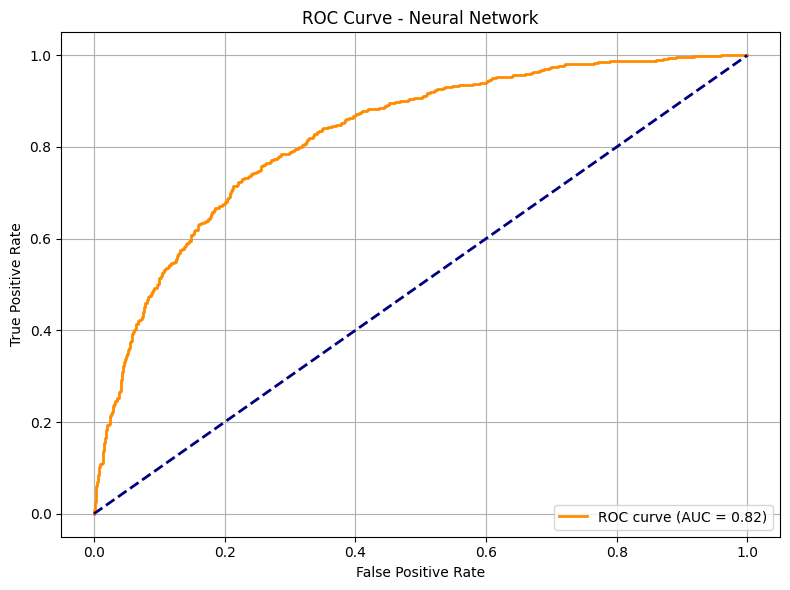

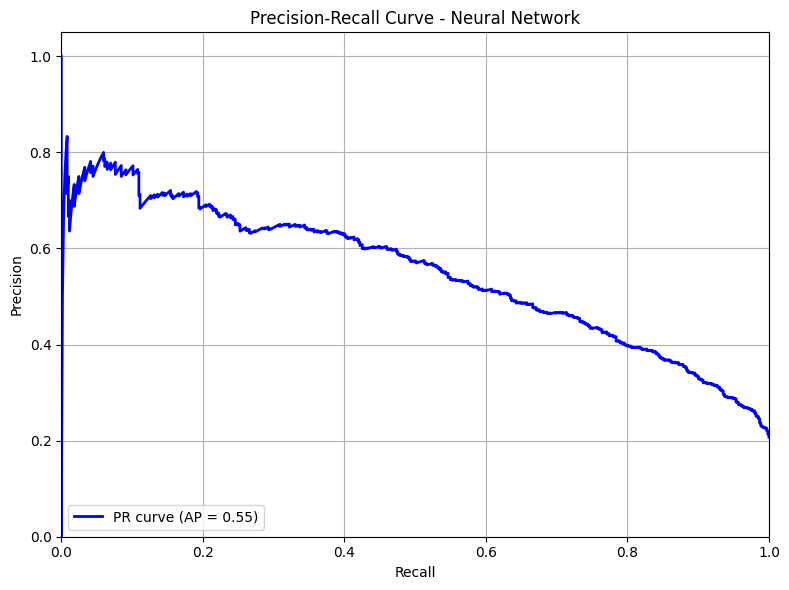

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn2_A = best_model.predict(X_test_A)[:, 1]  # probability of class 1

#  Decode true labels if one-hot encoded
if y_test_A.ndim > 1 and y_test_A.shape[1] > 1:
    y_true = np.argmax(y_test_A, axis=1)
else:
    y_true = y_test_A

# === ROC Curve ===
fpr_nn2_A, tpr_nn2_A, thresholds_roc_nn2_A = roc_curve(y_true, y_proba_nn2_A)
roc_auc_nn2_A = auc(fpr_nn2_A, tpr_nn2_A)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn2_A, tpr_nn2_A, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn2_A:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn2_A, recall_nn2_A, thresholds_pr_nn2_A = precision_recall_curve(y_true, y_proba_nn2_A)
avg_precision_nn2_A = average_precision_score(y_true, y_proba_nn2_A)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn2_A, precision_nn2_A, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn2_A:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

## B+Common

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1. Split data into features (X) and target (y)
id_columns_B = dfB[['subject_id', 'hadm_id']]
X = dfB.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
y = dfB['mortality_1yr']

# Optional: Standardize if necessary (Random Forest doesn’t need it, but good for comparison later)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 2. Train-Test Split (80/20)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Random Forest B

In [64]:
rf_balanced_B = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the same hyperparameter grid (or simplify if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# GridSearchCV with 5-fold CV
grid_search_bal = GridSearchCV(
    estimator=rf_balanced_B,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_B, y_train_B)

# Evaluate the best model
best_balanced_rf_B = grid_search_bal.best_estimator_
y_pred_bal = best_balanced_rf_B.predict(X_test_B)
y_proba_bal = best_balanced_rf_B.predict_proba(X_test_B)[:, 1]

print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_B, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_B, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_B, y_proba_bal))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Balanced Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[2099  209]
 [ 299  302]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2308
           1       0.59      0.50      0.54       601

    accuracy                           0.83      2909
   macro avg       0.73      0.71      0.72      2909
weighted avg       0.82      0.83      0.82      2909


ROC AUC Score:
0.8352940073880332


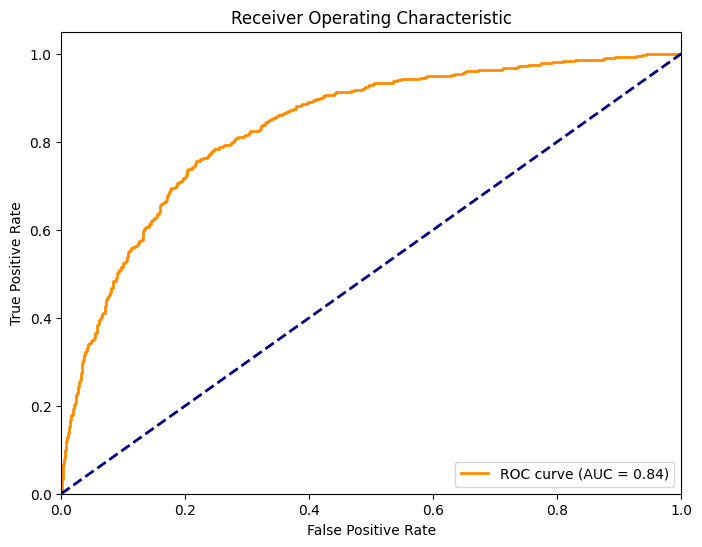

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_balanced_rf_B.predict_proba(X_test_B)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_rf_B, tpr_rf_B, thresholds_B = roc_curve(y_test_B, y_proba)

# Compute AUC
roc_auc_rf_B = auc(fpr_rf_B, tpr_rf_B)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_B, tpr_rf_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

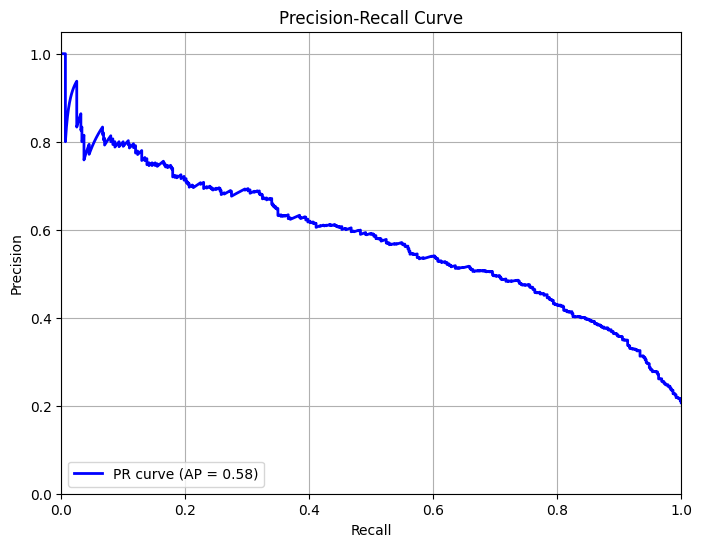

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_balanced_rf_B.predict_proba(X_test_B)[:, 1]

# Compute PR curve
precision_rf_B, recall_rf_B, thresholds_pr_B = precision_recall_curve(y_test_B, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_rf_B = average_precision_score(y_test_B, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_B, precision_rf_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_rf_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### Logistic Regression B

In [67]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model with balanced class weights
log_reg_balanced_B = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define the hyperparameter grid (simpler than RF)
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2']             # Type of regularization
}

# GridSearchCV with 5-fold cross-validation
grid_search_bal = GridSearchCV(
    estimator=log_reg_balanced_B,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_B, y_train_B)

# Evaluate the best model
best_log_reg_B = grid_search_bal.best_estimator_
y_pred_bal = best_log_reg_B.predict(X_test_B)
y_proba_bal = best_log_reg_B.predict_proba(X_test_B)[:, 1]

# Print results
print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_B, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_B, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_B, y_proba_bal))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Balanced Parameters: {'C': 10, 'penalty': 'l2'}

Confusion Matrix:
[[1768  540]
 [ 173  428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2308
           1       0.44      0.71      0.55       601

    accuracy                           0.75      2909
   macro avg       0.68      0.74      0.69      2909
weighted avg       0.81      0.75      0.77      2909


ROC AUC Score:
0.8077042306727378


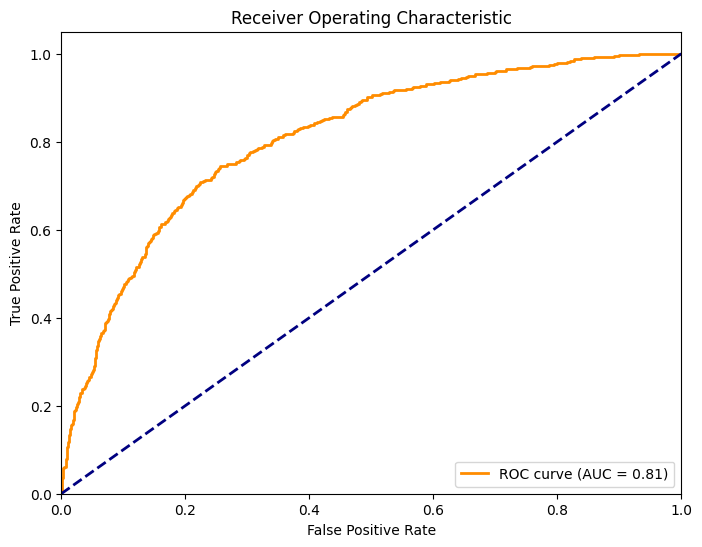

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_log_reg_B.predict_proba(X_test_B)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_lr_B, tpr_lr_B, thresholds_B = roc_curve(y_test_B, y_proba)

# Compute AUC
roc_auc_lr_B = auc(fpr_lr_B, tpr_lr_B)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_B, tpr_lr_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

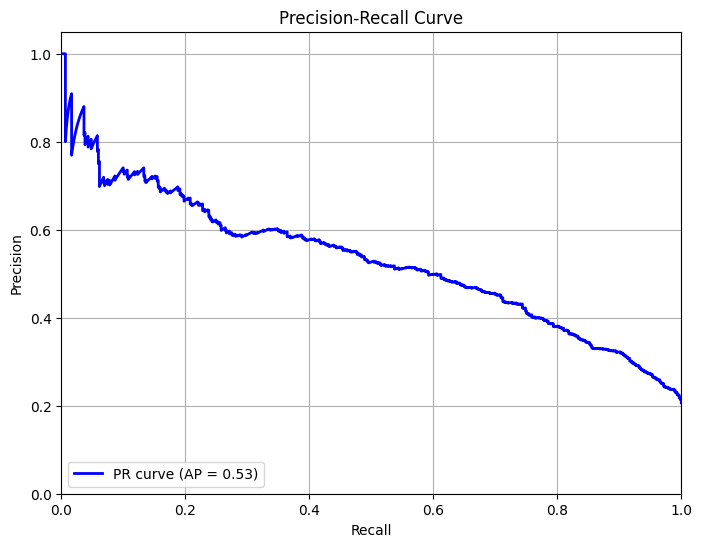

In [69]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_log_reg_B.predict_proba(X_test_B)[:, 1]

# Compute PR curve
precision_lr_B, recall_lr_B, thresholds_pr_B = precision_recall_curve(y_test_B, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_lr_B = average_precision_score(y_test_B, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr_B, precision_lr_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_lr_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### MLP B

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models

def mlp_model(input_dim=X_train_B.shape[1]):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(128, activation='relu', name='FC1'),
        layers.Dense(256, activation='relu', name='FC7'),
        layers.Dense(128, activation='relu', name='FC8'),
        layers.Dense(1, activation='sigmoid', name='Output')  # binary classification
    ])
    return model

In [71]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall
# Assume model is already built with mlp_model()
model = mlp_model(input_dim=X_train_B.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # You can also use 'val_auc' if tracking AUC
    patience=5,               # Number of epochs to wait for improvement
    restore_best_weights=True # Restore best weights after stopping
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_B,
    y_train_B,
    epochs=100,                # Higher max epochs (ES will stop early)
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
291/291 - 2s - 7ms/step - AUC: 0.6237 - Precision: 0.3584 - Recall: 0.2237 - loss: 0.9026 - val_AUC: 0.7271 - val_Precision: 0.4279 - val_Recall: 0.3795 - val_loss: 0.4961
Epoch 2/100
291/291 - 1s - 3ms/step - AUC: 0.6908 - Precision: 0.4451 - Recall: 0.2221 - loss: 0.5099 - val_AUC: 0.7513 - val_Precision: 0.4228 - val_Recall: 0.5778 - val_loss: 0.5400
Epoch 3/100
291/291 - 1s - 3ms/step - AUC: 0.7238 - Precision: 0.5222 - Recall: 0.2252 - loss: 0.4705 - val_AUC: 0.7521 - val_Precision: 0.5135 - val_Recall: 0.1215 - val_loss: 0.4475
Epoch 4/100
291/291 - 0s - 2ms/step - AUC: 0.7433 - Precision: 0.5497 - Recall: 0.2226 - loss: 0.4546 - val_AUC: 0.7578 - val_Precision: 0.5315 - val_Recall: 0.2878 - val_loss: 0.4408
Epoch 5/100
291/291 - 1s - 2ms/step - AUC: 0.7596 - Precision: 0.5802 - Recall: 0.2448 - loss: 0.4402 - val_AUC: 0.7512 - val_Precision: 0.4934 - val_Recall: 0.2388 - val_loss: 0.4523
Epoch 6/100
291/291 - 0s - 2ms/step - AUC: 0.7683 - Precision: 0.5693 - Recall: 

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


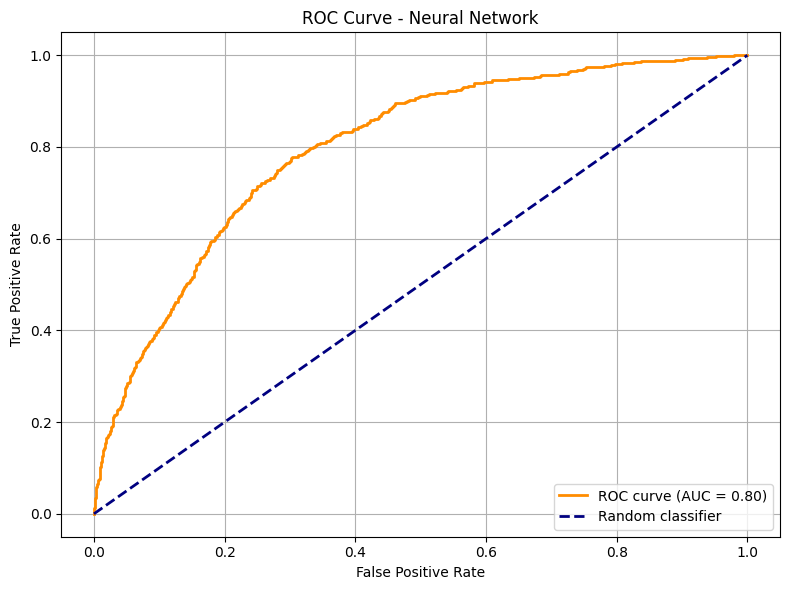

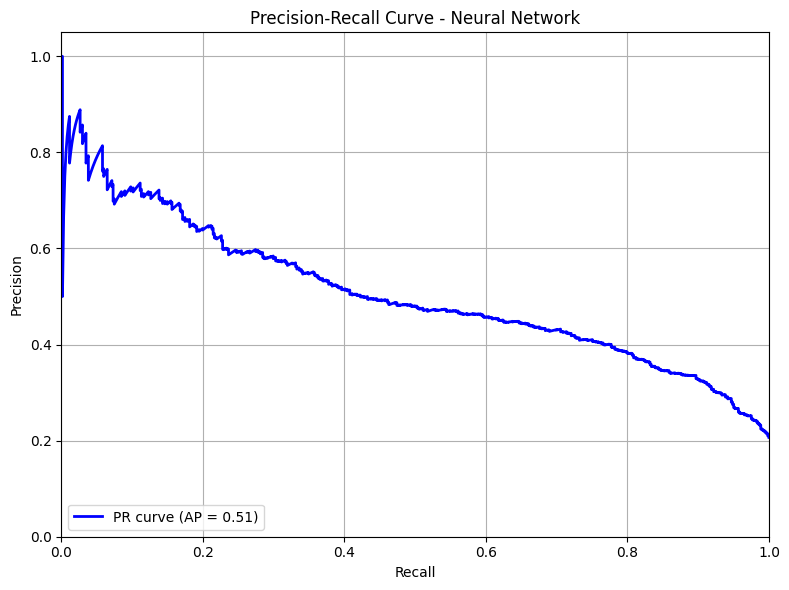

In [72]:
import matplotlib.pyplot as plt
# Predict probabilities
y_proba_nn_B = model.predict(X_test_B).ravel()

# === ROC Curve ===
from sklearn.metrics import roc_curve, auc
fpr_nn_B, tpr_nn_B, thresholds_nn_B = roc_curve(y_test_B, y_proba_nn_B)
roc_auc_nn_B = auc(fpr_nn_B, tpr_nn_B)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_B, tpr_nn_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_nn_B, recall_nn_B, thresholds_nn_B = precision_recall_curve(y_test_B, y_proba_nn_B)
avg_precision_nn_B = average_precision_score(y_test_B, y_proba_nn_B)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_B, precision_nn_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

### MLP New B

In [73]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train_B)

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
#from tensorflow.keras.losses import BinaryFocalCrossentropy



def mlp_model(input_dim, learning_rate=0.001):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(256, activation='relu', name='FC1'),
        layers.Dense(128, activation='relu', name='FC2'),
        layers.Dense(64, activation='relu', name='FC3'),
        layers.Dense(2, activation='softmax', name='Output')  # 2-class softmax
    ])
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # one-hot labels
        #loss=BinaryFocalCrossentropy(gamma=2.0),
        metrics=[tf.keras.metrics.AUC(name='AUC'), 
                 tf.keras.metrics.Precision(name='Precision'), 
                 tf.keras.metrics.Recall(name='Recall')]
    )
    return model

In [75]:
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()



 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


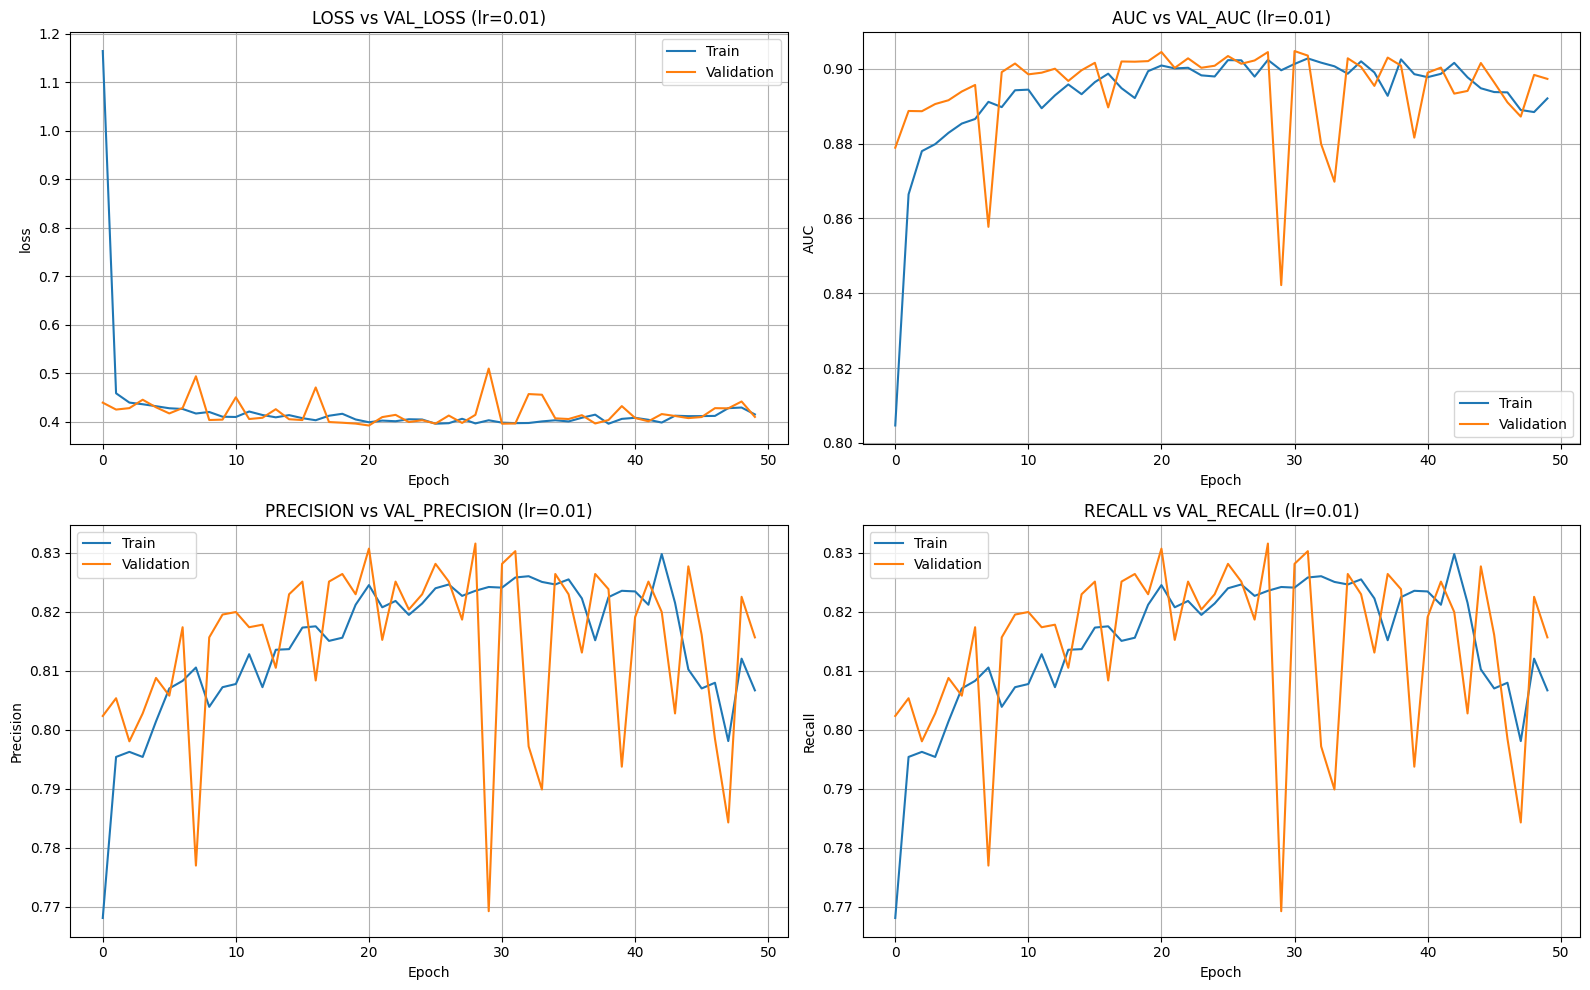


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


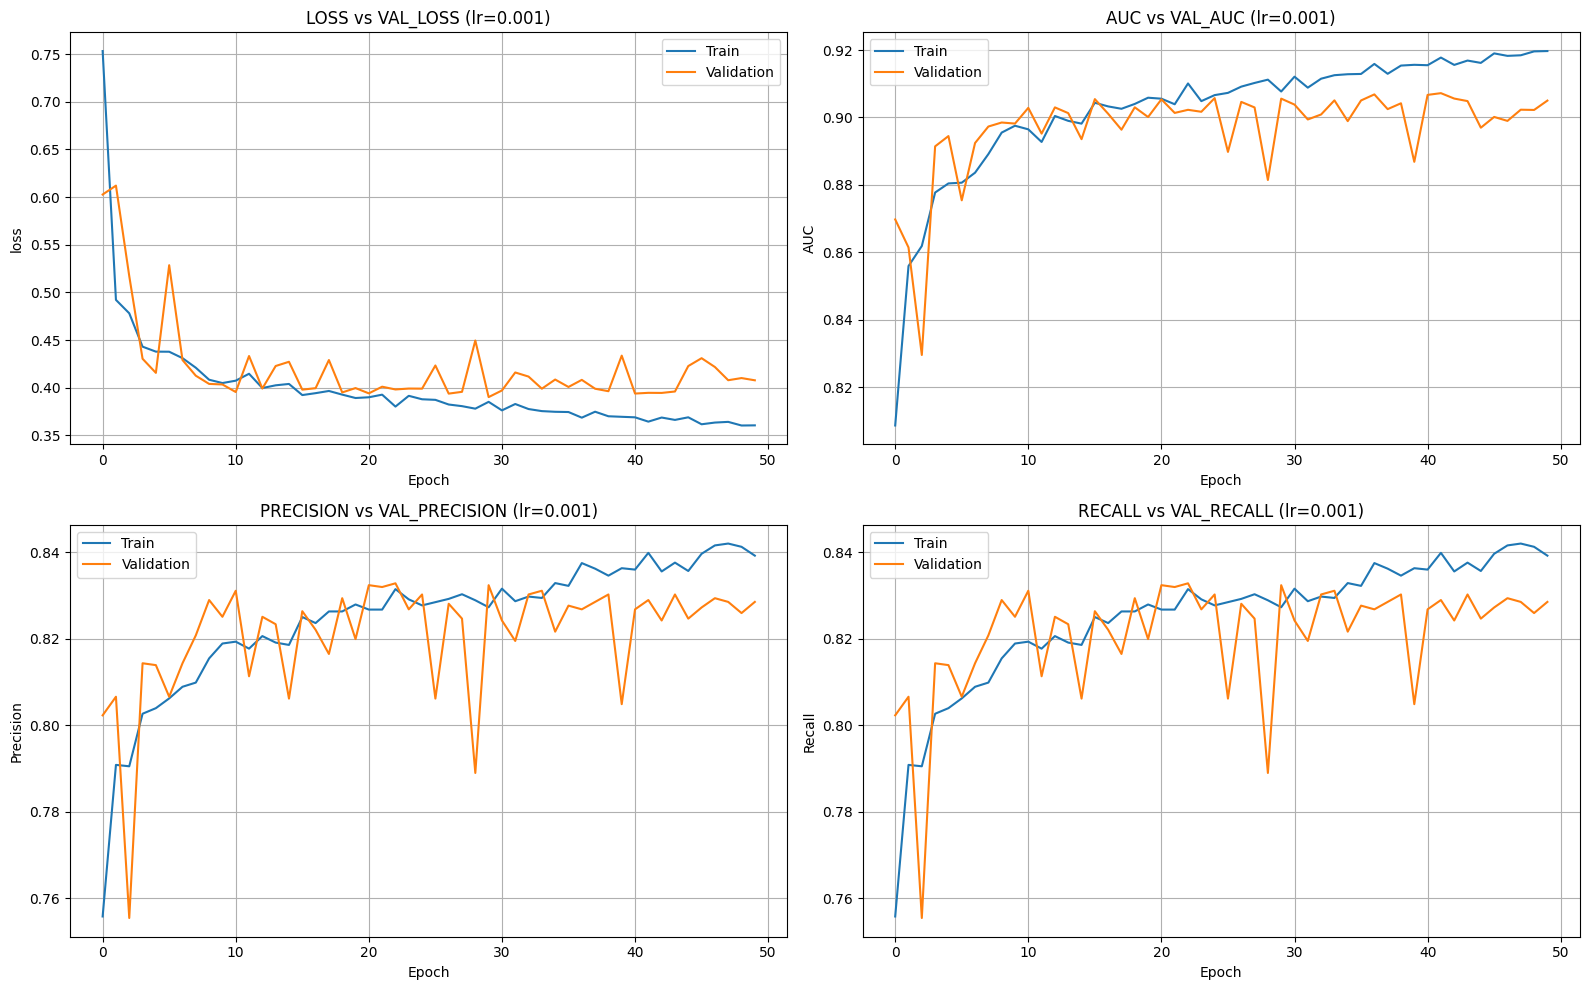


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


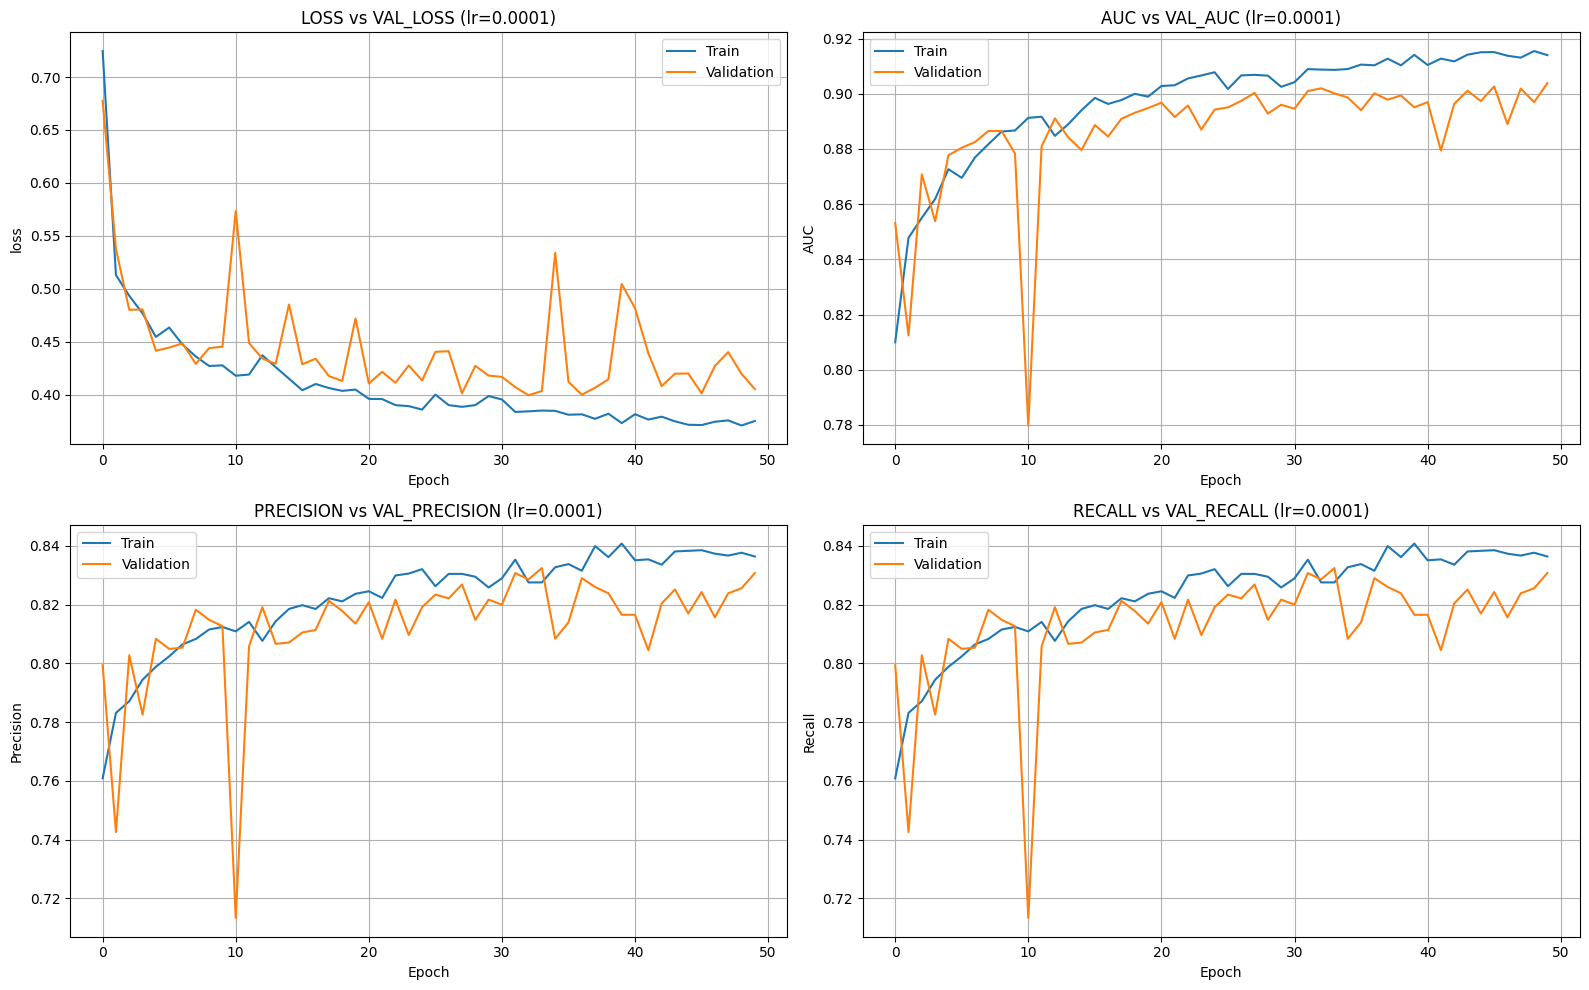


🏆 Best learning rate: 0.001


In [76]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model = mlp_model(input_dim=X_train_B.shape[1], learning_rate=lr)
    
    #early_stopping = EarlyStopping(monitor='val_AUC', patience=5, mode='max', restore_best_weights=True)
    
    history = model.fit(
        X_train_B, y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


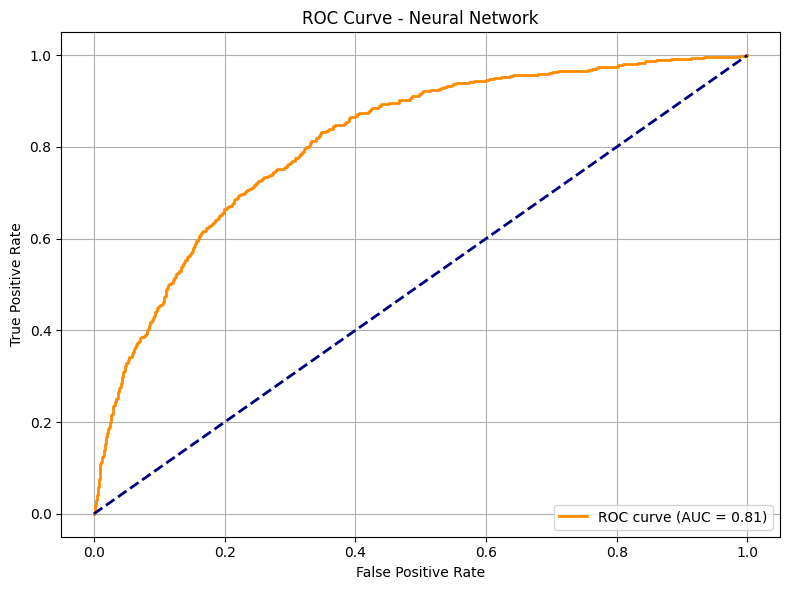

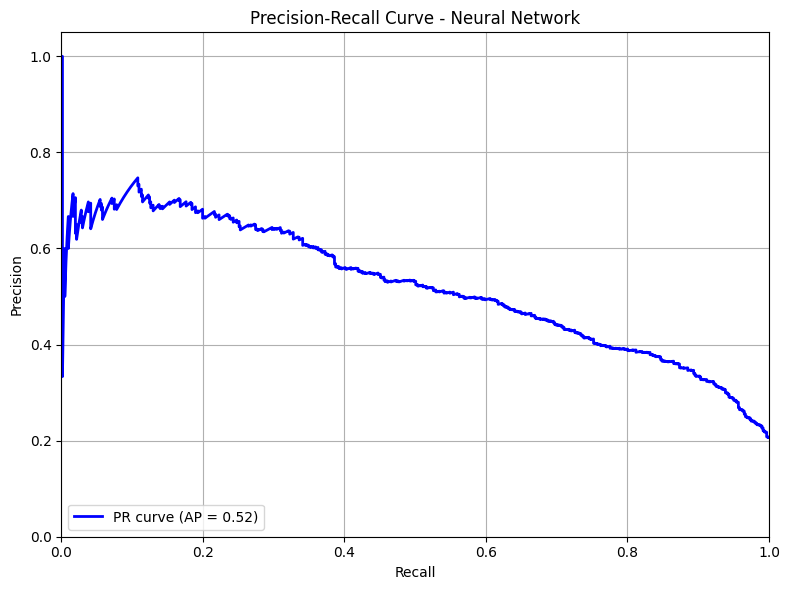

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn2_B = best_model.predict(X_test_B)[:, 1]  # probability of class 1

#  Decode true labels if one-hot encoded
if y_test_B.ndim > 1 and y_test_B.shape[1] > 1:
    y_true = np.argmax(y_test_B, axis=1)
else:
    y_true = y_test_B

# === ROC Curve ===
fpr_nn2_B, tpr_nn2_B, thresholds_roc_nn2_B = roc_curve(y_true, y_proba_nn2_B)
roc_auc_nn2_B = auc(fpr_nn2_B, tpr_nn2_B)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn2_B, tpr_nn2_B, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn2_B:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn2_B, recall_nn2_B, thresholds_pr_nn2_B = precision_recall_curve(y_true, y_proba_nn2_B)
avg_precision_nn2_B = average_precision_score(y_true, y_proba_nn2_B)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn2_B, precision_nn2_B, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn2_B:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

## Total

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1. Split data into features (X) and target (y)
id_columns_tot = df[['subject_id', 'hadm_id']]
X = df.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
y = df['mortality_1yr']

# Optional: Standardize if necessary (Random Forest doesn’t need it, but good for comparison later)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 2. Train-Test Split (80/20)
X_train_tot, X_test_tot, y_train_tot, y_test_tot = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Random Forest Total

In [79]:
rf_balanced_tot = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the same hyperparameter grid (or simplify if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# GridSearchCV with 5-fold CV
grid_search_bal = GridSearchCV(
    estimator=rf_balanced_tot,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_tot, y_train_tot)

# Evaluate the best model
best_balanced_rf_tot = grid_search_bal.best_estimator_
y_pred_bal = best_balanced_rf_tot.predict(X_test_tot)
y_proba_bal = best_balanced_rf_tot.predict_proba(X_test_tot)[:, 1]

print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_tot, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_tot, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_tot, y_proba_bal))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Balanced Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[4291  323]
 [ 599  604]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4614
           1       0.65      0.50      0.57      1203

    accuracy                           0.84      5817
   macro avg       0.76      0.72      0.74      5817
weighted avg       0.83      0.84      0.83      5817


ROC AUC Score:
0.8679433838464092


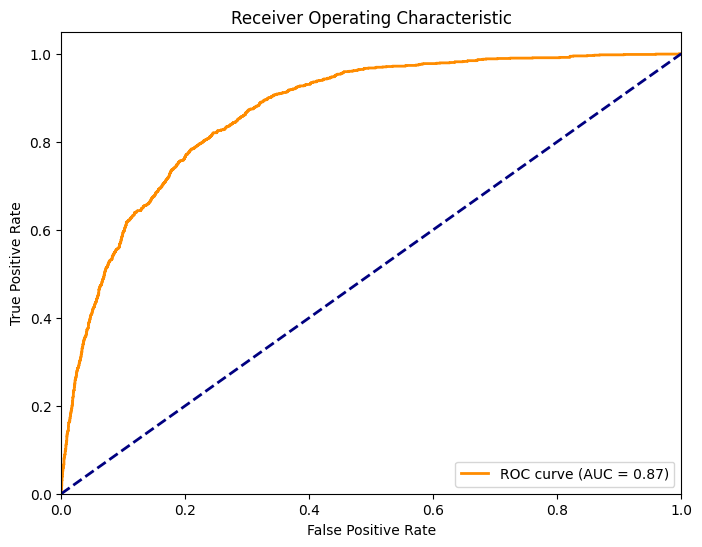

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_balanced_rf_tot.predict_proba(X_test_tot)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_rf_tot, tpr_rf_tot, thresholds_tot = roc_curve(y_test_tot, y_proba)

# Compute AUC
roc_auc_rf_tot = auc(fpr_rf_tot, tpr_rf_tot)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tot, tpr_rf_tot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_tot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

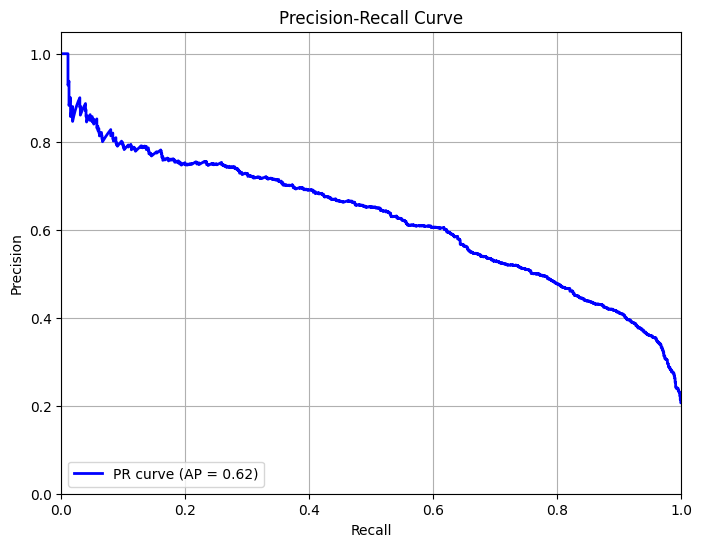

In [81]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_balanced_rf_tot.predict_proba(X_test_tot)[:, 1]

# Compute PR curve
precision_rf_tot, recall_rf_tot, thresholds_pr_tot = precision_recall_curve(y_test_tot, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_rf_tot = average_precision_score(y_test_tot, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_tot, precision_rf_tot, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_rf_tot:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### Logistic Regression Total

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg_balanced_tot = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define the hyperparameter grid (simpler than RF)
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2']             # Type of regularization
}

# GridSearchCV with 5-fold cross-validation
grid_search_bal = GridSearchCV(
    estimator=log_reg_balanced_tot,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_bal.fit(X_train_tot, y_train_tot)

# Evaluate the best model
best_balanced_lr_tot = grid_search_bal.best_estimator_
y_pred_bal = best_balanced_lr_tot.predict(X_test_tot)
y_proba_bal = best_balanced_lr_tot.predict_proba(X_test_tot)[:, 1]

print("Best Balanced Parameters:", grid_search_bal.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_tot, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_tot, y_pred_bal))
print("\nROC AUC Score:")
print(roc_auc_score(y_test_tot, y_proba_bal))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Balanced Parameters: {'C': 1, 'penalty': 'l1'}

Confusion Matrix:
[[3578 1036]
 [ 315  888]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4614
           1       0.46      0.74      0.57      1203

    accuracy                           0.77      5817
   macro avg       0.69      0.76      0.70      5817
weighted avg       0.82      0.77      0.78      5817


ROC AUC Score:
0.8333034268828722


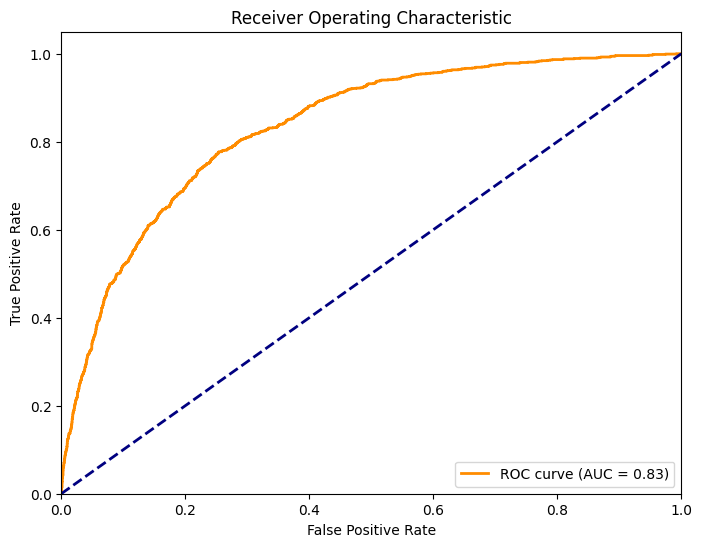

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1 (mortality)
y_proba = best_balanced_lr_tot.predict_proba(X_test_tot)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr_lr_tot, tpr_lr_tot, thresholds_tot = roc_curve(y_test_tot, y_proba)

# Compute AUC
roc_auc_lr_tot = auc(fpr_lr_tot, tpr_lr_tot)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tot, tpr_lr_tot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr_tot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


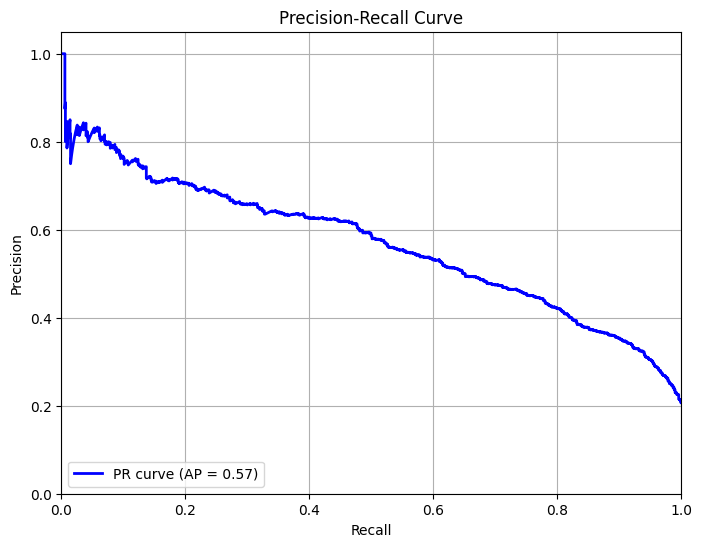

In [84]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute predicted probabilities (already done)
y_proba = best_balanced_lr_tot.predict_proba(X_test_tot)[:, 1]

# Compute PR curve
precision_lr_tot, recall_lr_tot, thresholds_pr_tot = precision_recall_curve(y_test_tot, y_proba)

# Compute average precision score (area under PR curve)
avg_precision_lr_tot = average_precision_score(y_test_tot, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr_tot, precision_lr_tot, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_lr_tot:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### MLP Tot

In [85]:
import tensorflow as tf
from tensorflow.keras import layers, models

def mlp_model(input_dim=X_train_tot.shape[1]):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(128, activation='relu', name='FC1'),
        layers.Dense(256, activation='relu', name='FC7'),
        layers.Dense(128, activation='relu', name='FC8'),
        layers.Dense(1, activation='sigmoid', name='Output')  # binary classification
    ])
    return model

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall
# Assume model is already built with mlp_model()
model = mlp_model(input_dim=X_train_tot.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # You can also use 'val_auc' if tracking AUC
    patience=5,               # Number of epochs to wait for improvement
    restore_best_weights=True # Restore best weights after stopping
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_tot,
    y_train_tot,
    epochs=100,                # Higher max epochs (ES will stop early)
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
582/582 - 2s - 3ms/step - AUC: 0.6545 - Precision: 0.3906 - Recall: 0.2580 - loss: 0.6775 - val_AUC: 0.7049 - val_Precision: 0.3726 - val_Recall: 0.4496 - val_loss: 0.5735
Epoch 2/100
582/582 - 1s - 1ms/step - AUC: 0.7249 - Precision: 0.4924 - Recall: 0.2365 - loss: 0.4720 - val_AUC: 0.7673 - val_Precision: 0.5340 - val_Recall: 0.3085 - val_loss: 0.4479
Epoch 3/100
582/582 - 1s - 1ms/step - AUC: 0.7528 - Precision: 0.5464 - Recall: 0.2376 - loss: 0.4447 - val_AUC: 0.7893 - val_Precision: 0.6096 - val_Recall: 0.1542 - val_loss: 0.4375
Epoch 4/100
582/582 - 1s - 1ms/step - AUC: 0.7678 - Precision: 0.5779 - Recall: 0.2467 - loss: 0.4319 - val_AUC: 0.7778 - val_Precision: 0.4989 - val_Recall: 0.4486 - val_loss: 0.4647
Epoch 5/100
582/582 - 1s - 1ms/step - AUC: 0.7761 - Precision: 0.5762 - Recall: 0.2596 - loss: 0.4252 - val_AUC: 0.8024 - val_Precision: 0.6543 - val_Recall: 0.2480 - val_loss: 0.4164
Epoch 6/100
582/582 - 1s - 1ms/step - AUC: 0.7930 - Precision: 0.5998 - Recall: 

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


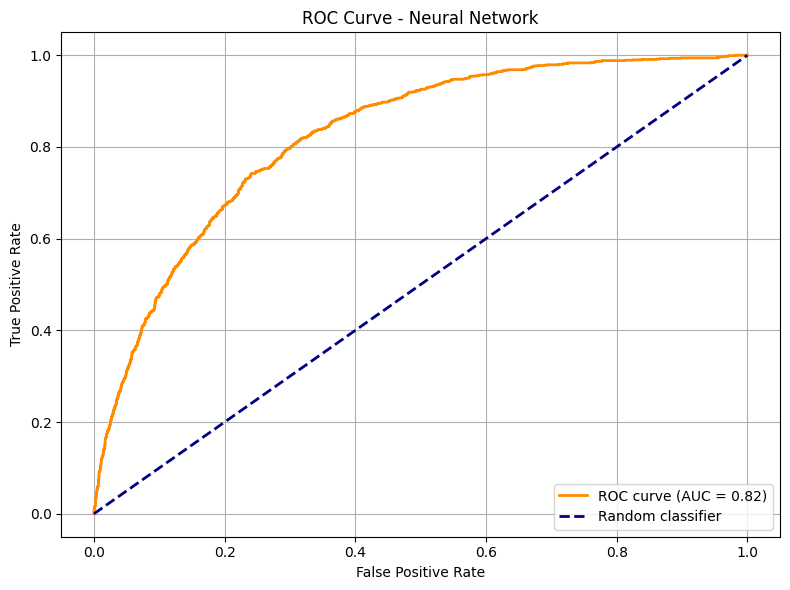

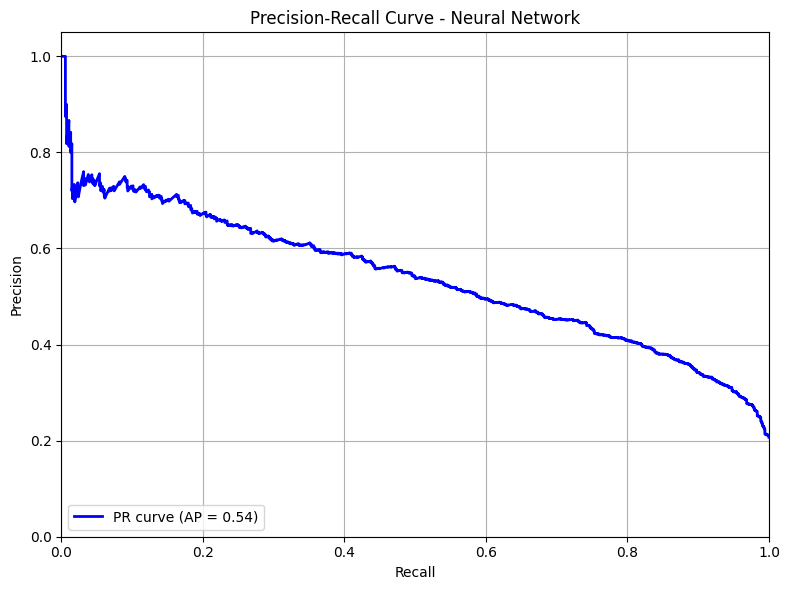

In [87]:
import matplotlib.pyplot as plt
# Predict probabilities
y_proba_nn_tot = model.predict(X_test_tot).ravel()

# === ROC Curve ===
from sklearn.metrics import roc_curve, auc
fpr_nn_tot, tpr_nn_tot, thresholds_nn_tot = roc_curve(y_test_tot, y_proba_nn_tot)
roc_auc_nn_tot = auc(fpr_nn_tot, tpr_nn_tot)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn_tot, tpr_nn_tot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn_tot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_nn_tot, recall_nn_tot, thresholds_nn_tot = precision_recall_curve(y_test_tot, y_proba_nn_tot)
avg_precision_nn_tot = average_precision_score(y_test_tot, y_proba_nn_tot)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn_tot, precision_nn_tot, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn_tot:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

### MLP New tot

In [88]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded = to_categorical(y_train_tot)

In [89]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
#from tensorflow.keras.losses import BinaryFocalCrossentropy



def mlp_model(input_dim, learning_rate=0.001):
    model = models.Sequential([
        layers.Input(shape=(input_dim,), name='Input'),
        layers.Dense(256, activation='relu', name='FC1'),
        layers.Dense(128, activation='relu', name='FC2'),
        layers.Dense(64, activation='relu', name='FC3'),
        layers.Dense(2, activation='softmax', name='Output')  # 2-class softmax
    ])
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # one-hot labels
        #loss=BinaryFocalCrossentropy(gamma=2.0),
        metrics=[tf.keras.metrics.AUC(name='AUC'), 
                 tf.keras.metrics.Precision(name='Precision'), 
                 tf.keras.metrics.Recall(name='Recall')]
    )
    return model

In [90]:
def plot_history(history, lr):
    keys = history.history.keys()
    print(f"\n📊 Plotting for learning rate: {lr}")
    print("🧪 History keys:", keys)

    plt.figure(figsize=(16, 10))

    plots = [
        ('loss', 'val_loss'),
        ('AUC', 'val_AUC'),
        ('Precision', 'val_Precision'),
        ('Recall', 'val_Recall')
    ]

    for i, (train_metric, val_metric) in enumerate(plots):
        if train_metric in keys and val_metric in keys:
            plt.subplot(2, 2, i + 1)
            plt.plot(history.history[train_metric], label='Train')
            plt.plot(history.history[val_metric], label='Validation')
            plt.title(f"{train_metric.upper()} vs {val_metric.upper()} (lr={lr})")
            plt.xlabel("Epoch")
            plt.ylabel(train_metric)
            plt.legend()
            plt.grid(True)

    plt.tight_layout()
    plt.show()



 Training model with learning rate: 0.01
✅ Training completed.

 Training model with learning rate: 0.001
✅ Training completed.

 Training model with learning rate: 0.0001
✅ Training completed.

📊 Plotting for learning rate: 0.01
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


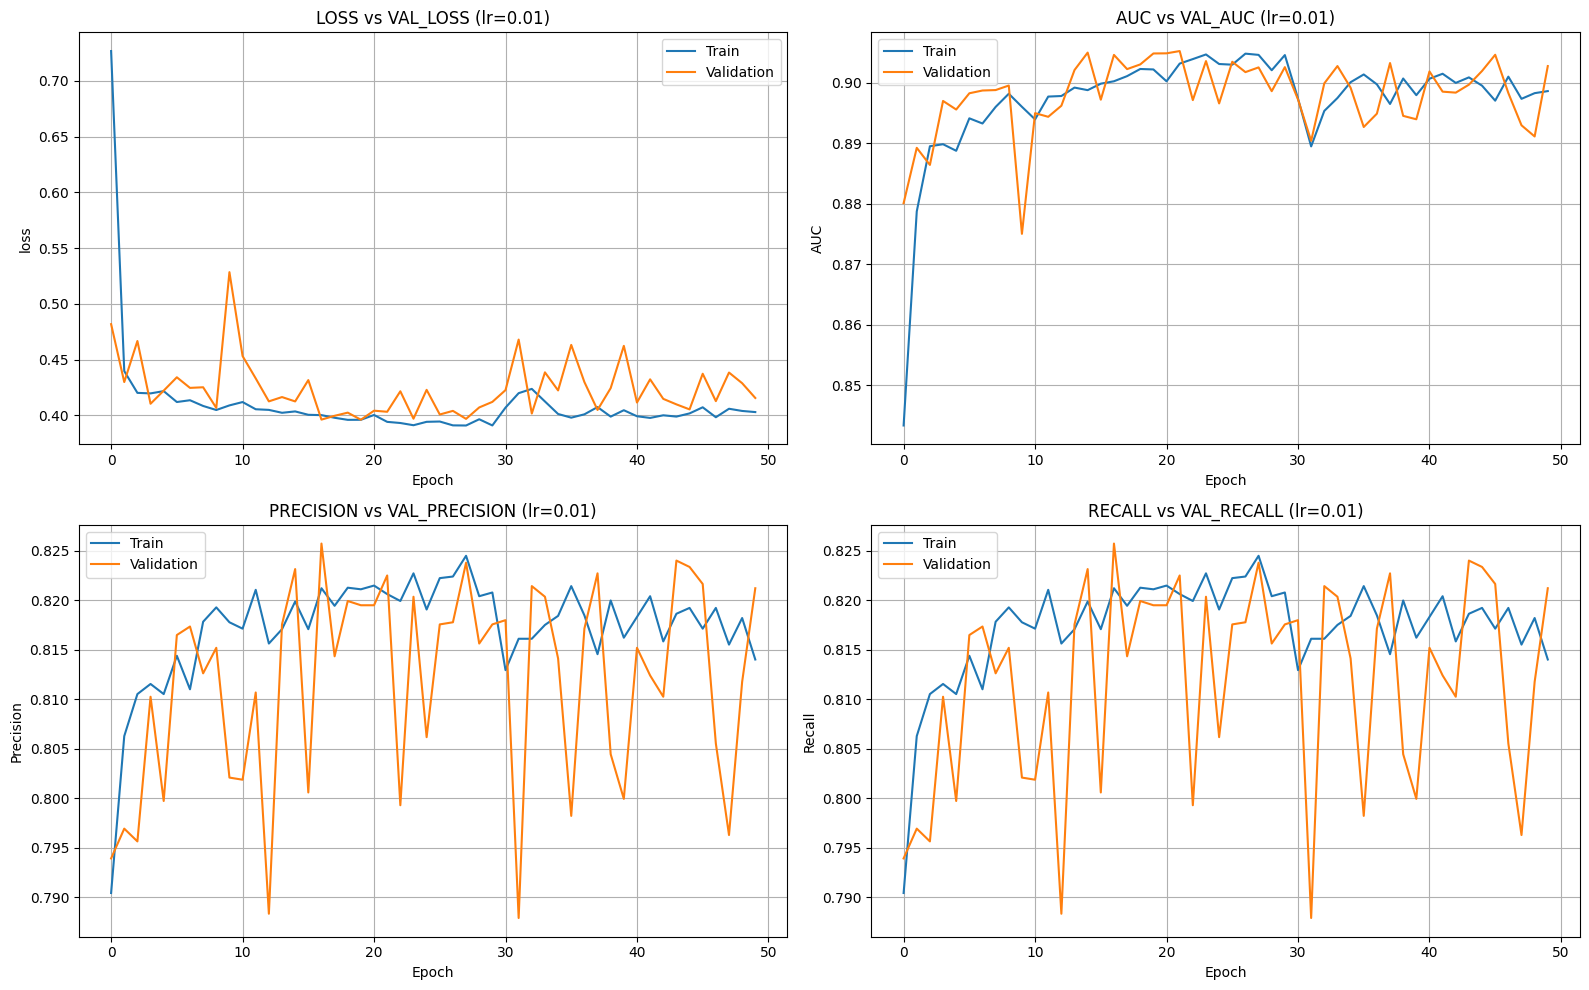


📊 Plotting for learning rate: 0.001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


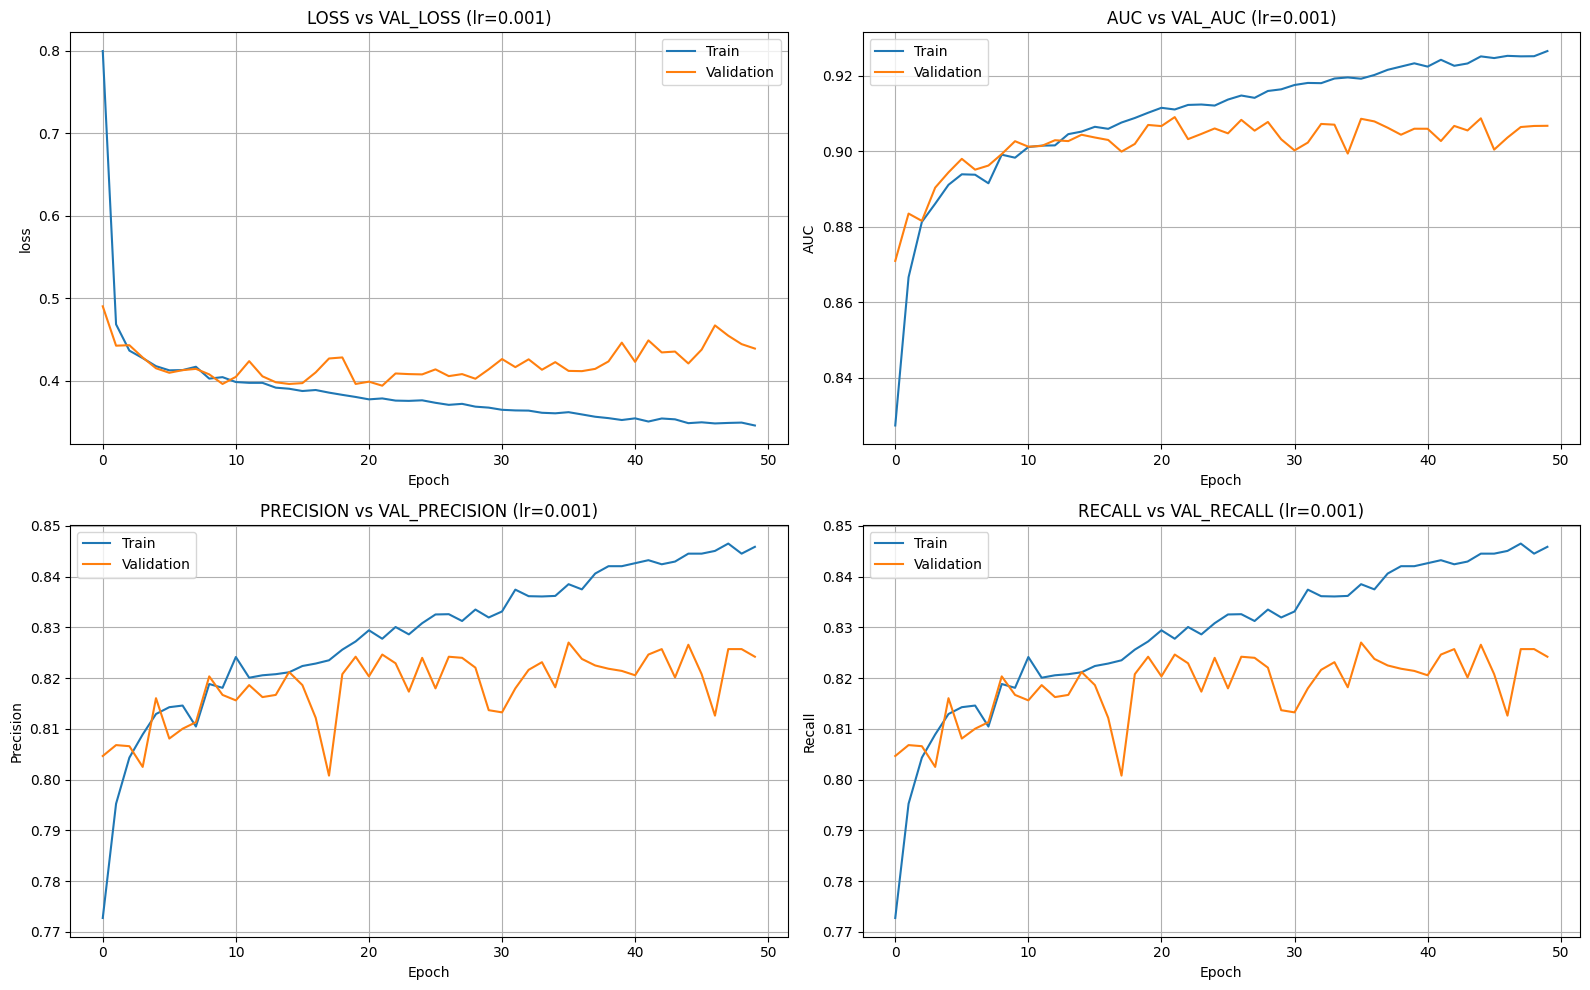


📊 Plotting for learning rate: 0.0001
🧪 History keys: dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


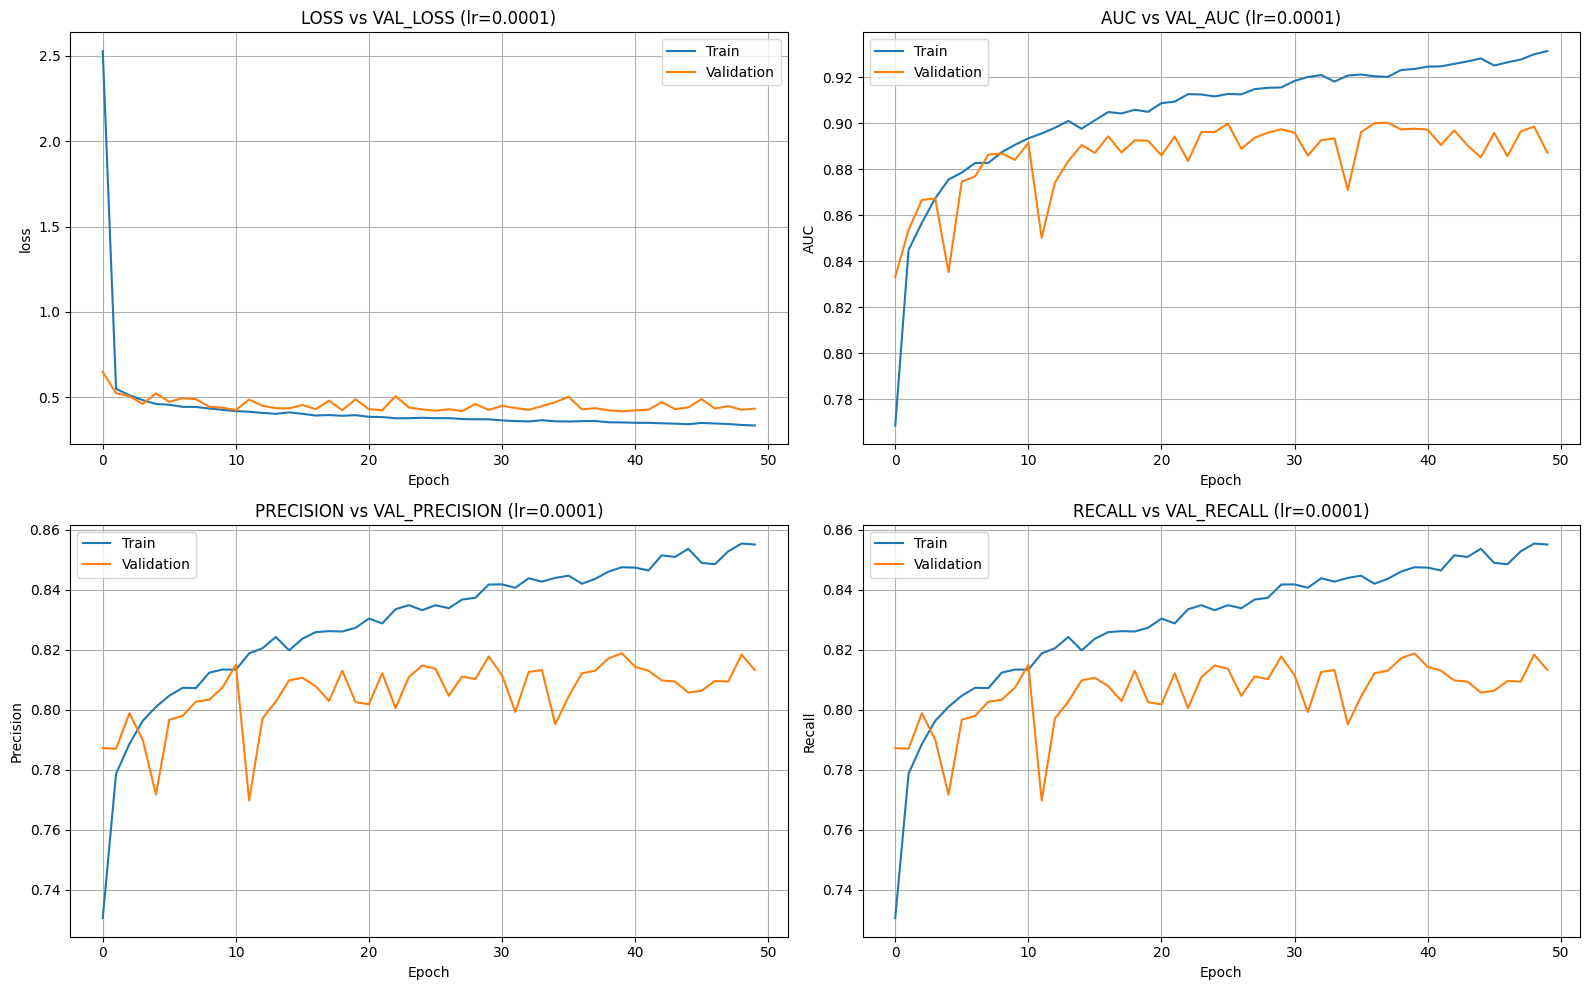


🏆 Best learning rate: 0.001


In [91]:
learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Train
for lr in learning_rates:
    print(f"\n Training model with learning rate: {lr}")
    model = mlp_model(input_dim=X_train_tot.shape[1], learning_rate=lr)
    
    #early_stopping = EarlyStopping(monitor='val_AUC', patience=5, mode='max', restore_best_weights=True)
    
    history = model.fit(
        X_train_tot, y_train_encoded,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        #callbacks=[early_stopping],
        verbose=0
    )
    
    print("✅ Training completed.")
    

    final_val_auc = max(history.history['val_AUC'])
    histories[lr] = history
    
    if final_val_auc > best_auc:
        best_auc = final_val_auc
        best_model = model
        best_lr= lr

# Plotting
for lr, hist in histories.items():
    plot_history(hist, lr)

print(f"\n🏆 Best learning rate: {best_lr}")

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step


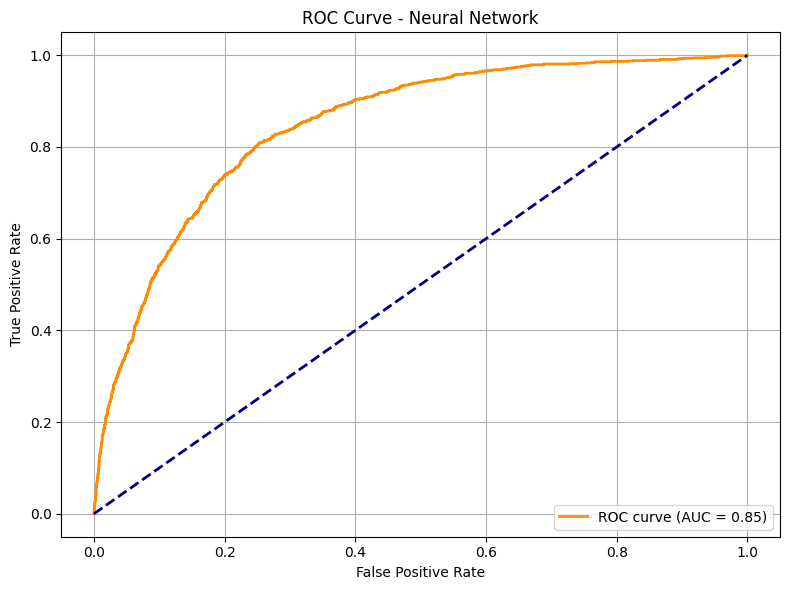

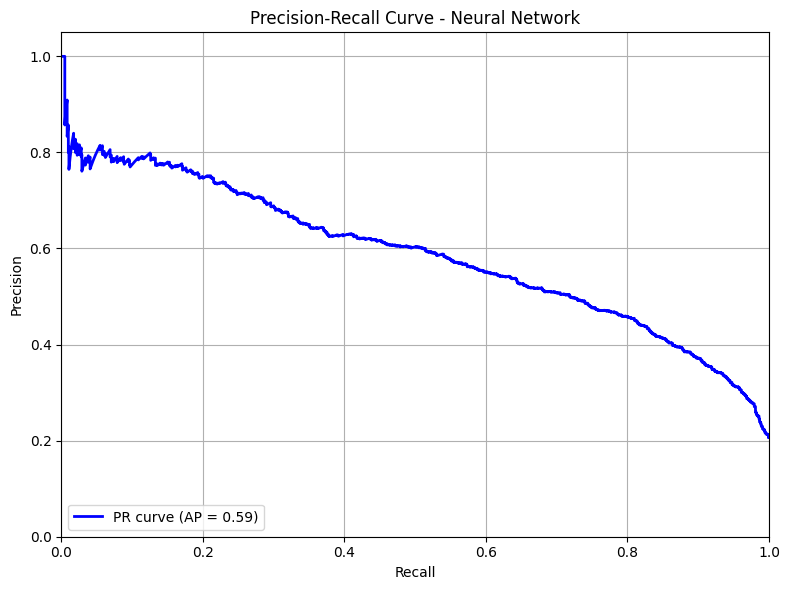

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Use best model
y_proba_nn2_tot = best_model.predict(X_test_tot)[:, 1]  # probability of class 1

#  Decode true labels if one-hot encoded
if y_test_tot.ndim > 1 and y_test_tot.shape[1] > 1:
    y_true = np.argmax(y_test_tot, axis=1)
else:
    y_true = y_test_tot

# === ROC Curve ===
fpr_nn2_tot, tpr_nn2_tot, thresholds_roc_nn2_tot = roc_curve(y_true, y_proba_nn2_tot)
roc_auc_nn2_tot = auc(fpr_nn2_tot, tpr_nn2_tot)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn2_tot, tpr_nn2_tot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn2_tot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Precision-Recall Curve ===
precision_nn2_tot, recall_nn2_tot, thresholds_pr_nn2_tot = precision_recall_curve(y_true, y_proba_nn2_tot)
avg_precision_nn2_tot = average_precision_score(y_true, y_proba_nn2_tot)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn2_tot, precision_nn2_tot, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_nn2_tot:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='lower left')
plt.grid(True)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.tight_layout()
plt.show()

## All Five Partitions

### Random Forest All Five Partitions

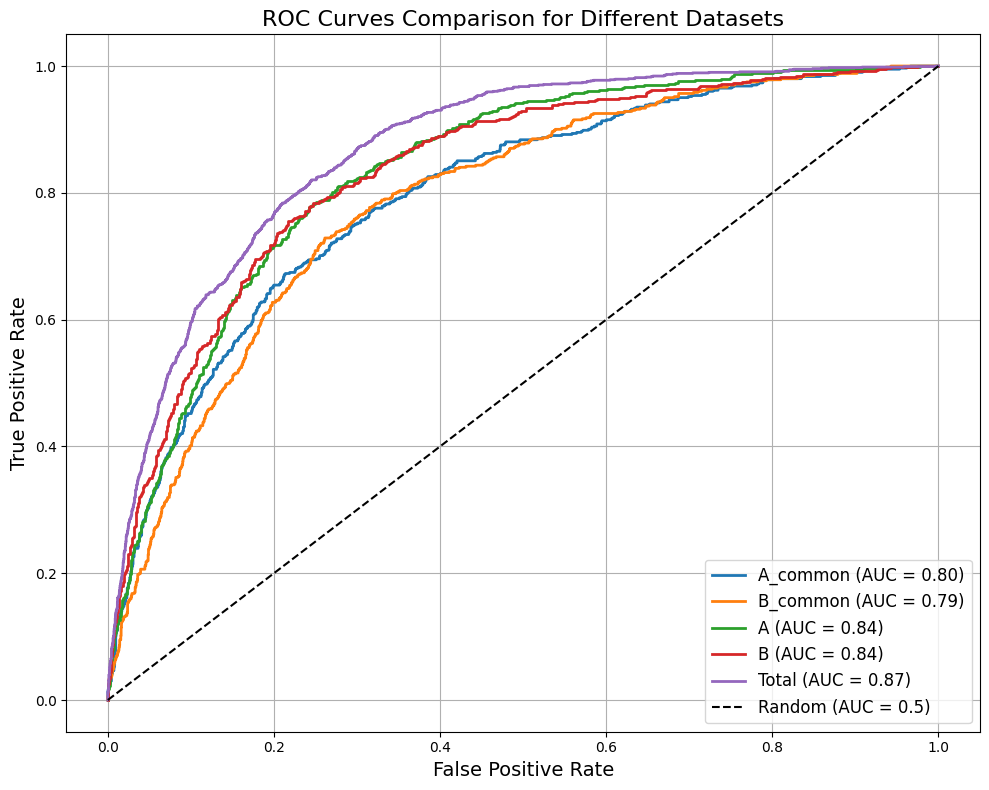

In [93]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr_rf_A_common, tpr_rf_A_common, label=f'A_common (AUC = {roc_auc_rf_A_common:.2f})', linewidth=2)
plt.plot(fpr_rf_B_common, tpr_rf_B_common, label=f'B_common (AUC = {roc_auc_rf_B_common:.2f})', linewidth=2)
plt.plot(fpr_rf_A, tpr_rf_A, label=f'A (AUC = {roc_auc_rf_A:.2f})', linewidth=2)
plt.plot(fpr_rf_B, tpr_rf_B, label=f'B (AUC = {roc_auc_rf_B:.2f})', linewidth=2)
plt.plot(fpr_rf_tot, tpr_rf_tot, label=f'Total (AUC = {roc_auc_rf_tot:.2f})', linewidth=2)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

# Format the plot
plt.title('ROC Curves Comparison for Different Datasets', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


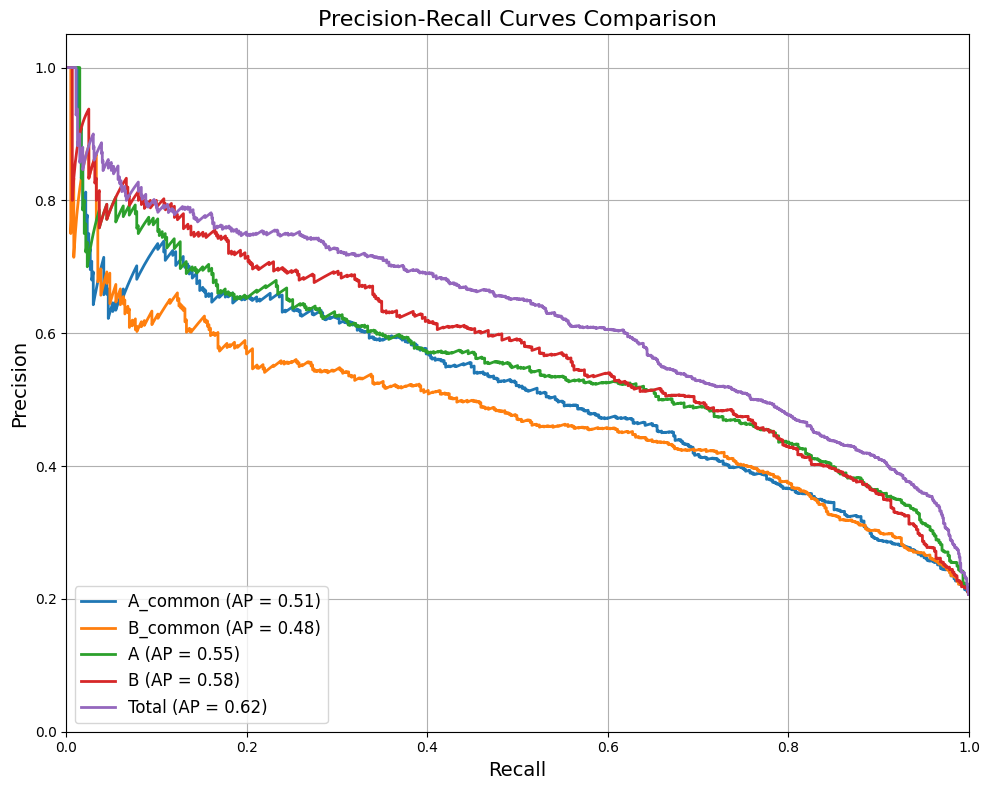

In [94]:
# 2. Plot all PR curves
plt.figure(figsize=(10, 8))

plt.plot(recall_rf_A_common, precision_rf_A_common, label=f'A_common (AP = {avg_precision_rf_A_common:.2f})', linewidth=2)
plt.plot(recall_rf_B_common, precision_rf_B_common, label=f'B_common (AP = {avg_precision_rf_B_common:.2f})', linewidth=2)
plt.plot(recall_rf_A, precision_rf_A, label=f'A (AP = {avg_precision_rf_A:.2f})', linewidth=2)
plt.plot(recall_rf_B, precision_rf_B, label=f'B (AP = {avg_precision_rf_B:.2f})', linewidth=2)
plt.plot(recall_rf_tot, precision_rf_tot, label=f'Total (AP = {avg_precision_rf_tot:.2f})', linewidth=2)

# 3. Format the plot
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves Comparison', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

### Logistic Regression All Five Partitions

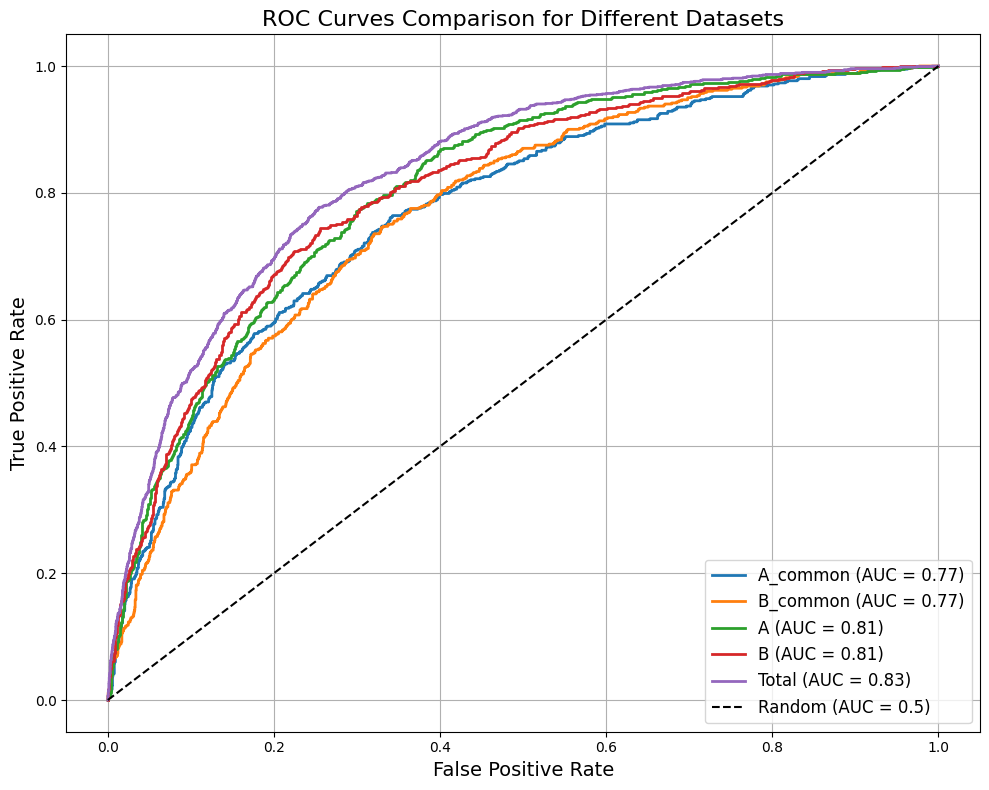

In [95]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr_lr_A_common, tpr_lr_A_common, label=f'A_common (AUC = {roc_auc_lr_A_common:.2f})', linewidth=2)
plt.plot(fpr_lr_B_common, tpr_lr_B_common, label=f'B_common (AUC = {roc_auc_lr_B_common:.2f})', linewidth=2)
plt.plot(fpr_lr_A, tpr_lr_A, label=f'A (AUC = {roc_auc_lr_A:.2f})', linewidth=2)
plt.plot(fpr_lr_B, tpr_lr_B, label=f'B (AUC = {roc_auc_lr_B:.2f})', linewidth=2)
plt.plot(fpr_lr_tot, tpr_lr_tot, label=f'Total (AUC = {roc_auc_lr_tot:.2f})', linewidth=2)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

# Format the plot
plt.title('ROC Curves Comparison for Different Datasets', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



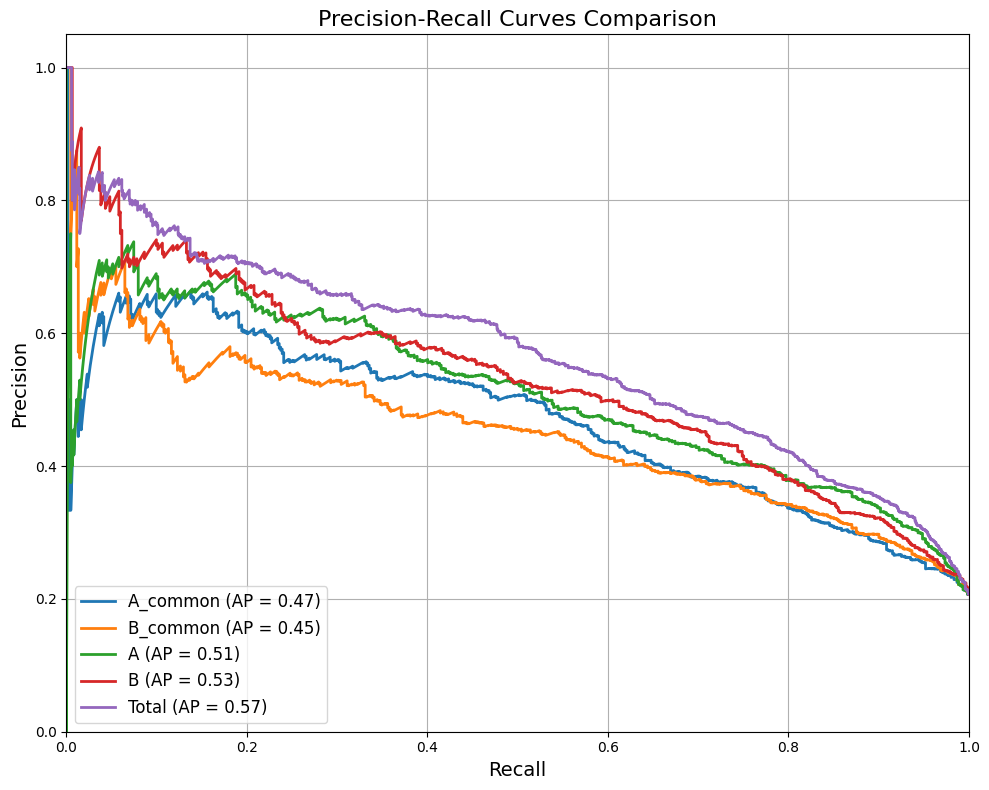

In [96]:
# 2. Plot all PR curves
plt.figure(figsize=(10, 8))

plt.plot(recall_lr_A_common, precision_lr_A_common, label=f'A_common (AP = {avg_precision_lr_A_common:.2f})', linewidth=2)
plt.plot(recall_lr_B_common, precision_lr_B_common, label=f'B_common (AP = {avg_precision_lr_B_common:.2f})', linewidth=2)
plt.plot(recall_lr_A, precision_lr_A, label=f'A (AP = {avg_precision_lr_A:.2f})', linewidth=2)
plt.plot(recall_lr_B, precision_lr_B, label=f'B (AP = {avg_precision_lr_B:.2f})', linewidth=2)
plt.plot(recall_lr_tot, precision_lr_tot, label=f'Total (AP = {avg_precision_lr_tot:.2f})', linewidth=2)

# 3. Format the plot
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves Comparison', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

### MLP All Five Partitions

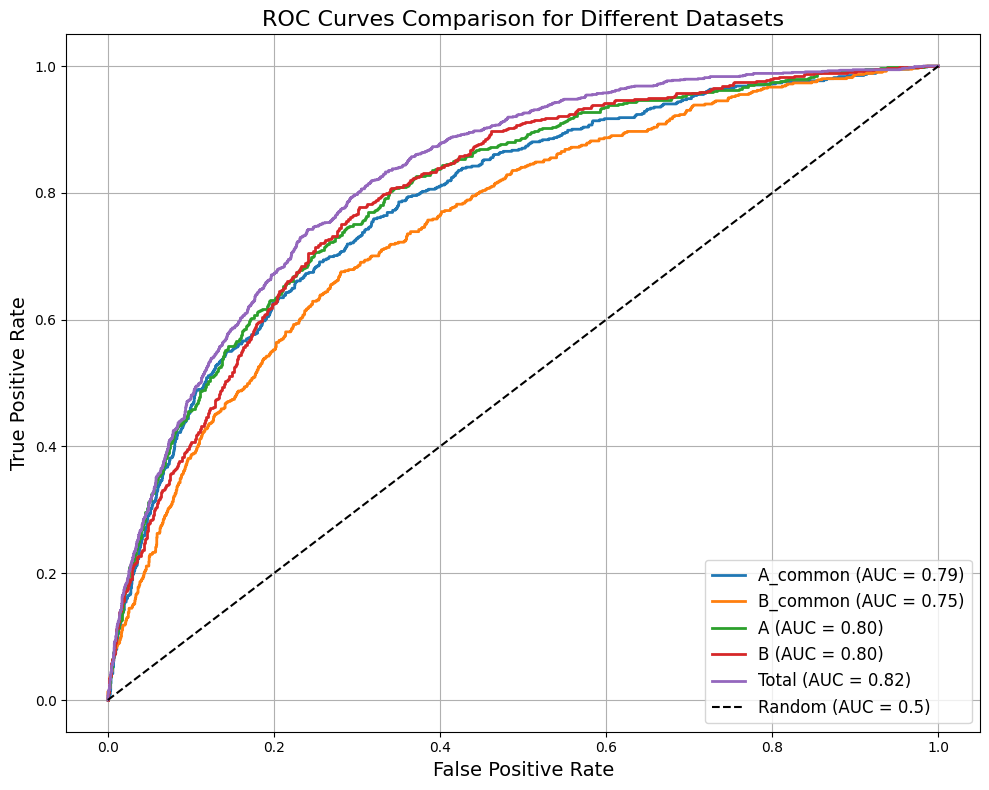

In [97]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr_nn_A_common, tpr_nn_A_common, label=f'A_common (AUC = {roc_auc_nn_A_common:.2f})', linewidth=2)
plt.plot(fpr_nn_B_common, tpr_nn_B_common, label=f'B_common (AUC = {roc_auc_nn_B_common:.2f})', linewidth=2)
plt.plot(fpr_nn_A, tpr_nn_A, label=f'A (AUC = {roc_auc_nn_A:.2f})', linewidth=2)
plt.plot(fpr_nn_B, tpr_nn_B, label=f'B (AUC = {roc_auc_nn_B:.2f})', linewidth=2)
plt.plot(fpr_nn_tot, tpr_nn_tot, label=f'Total (AUC = {roc_auc_nn_tot:.2f})', linewidth=2)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

# Format the plot
plt.title('ROC Curves Comparison for Different Datasets', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

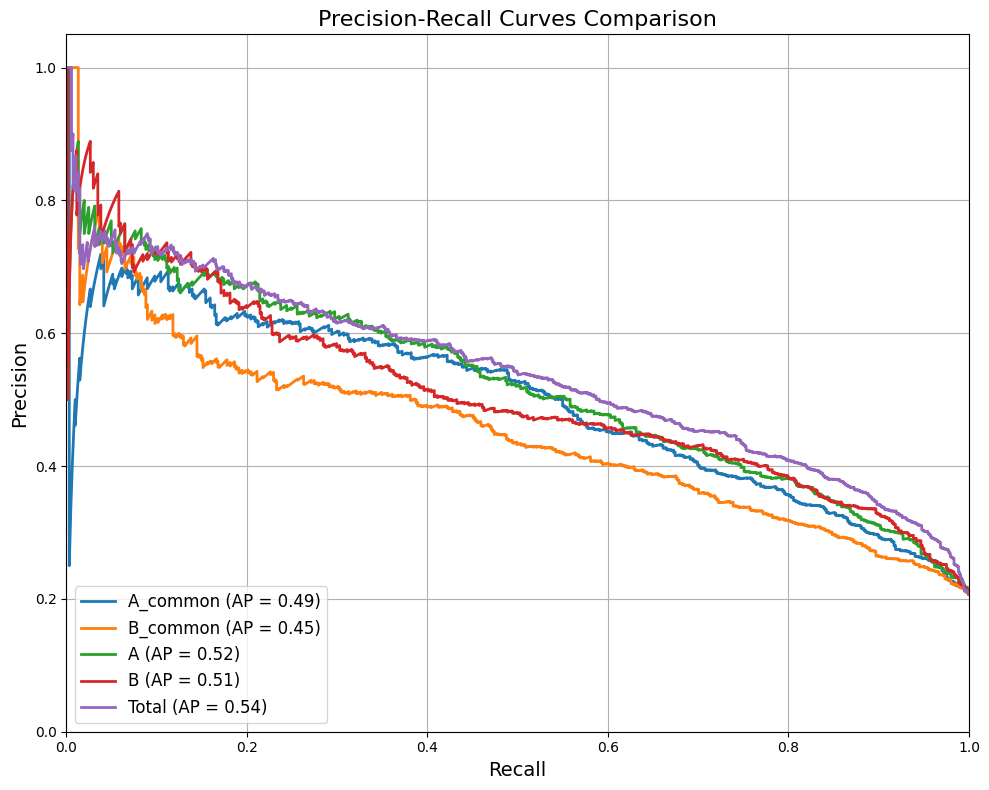

In [98]:
# 2. Plot all PR curves
plt.figure(figsize=(10, 8))

plt.plot(recall_nn_A_common, precision_nn_A_common, label=f'A_common (AP = {avg_precision_nn_A_common:.2f})', linewidth=2)
plt.plot(recall_nn_B_common, precision_nn_B_common, label=f'B_common (AP = {avg_precision_nn_B_common:.2f})', linewidth=2)
plt.plot(recall_nn_A, precision_nn_A, label=f'A (AP = {avg_precision_nn_A:.2f})', linewidth=2)
plt.plot(recall_nn_B, precision_nn_B, label=f'B (AP = {avg_precision_nn_B:.2f})', linewidth=2)
plt.plot(recall_nn_tot, precision_nn_tot, label=f'Total (AP = {avg_precision_nn_tot:.2f})', linewidth=2)

# 3. Format the plot
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves Comparison', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

### MLP2 All Five Partitions

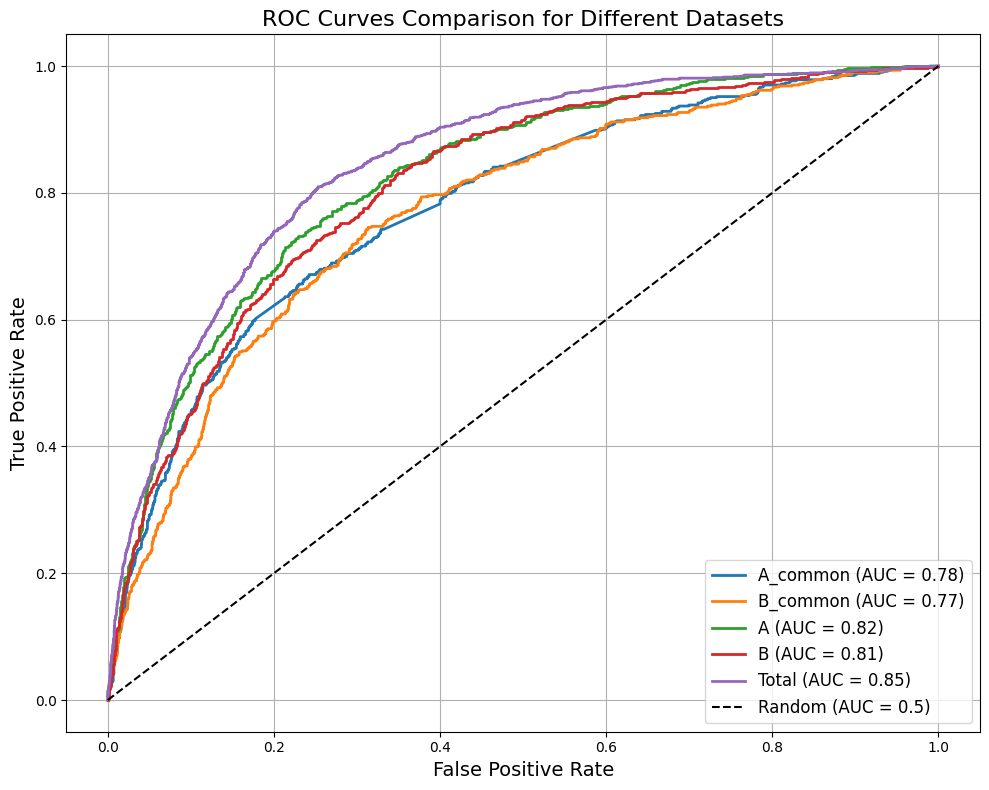

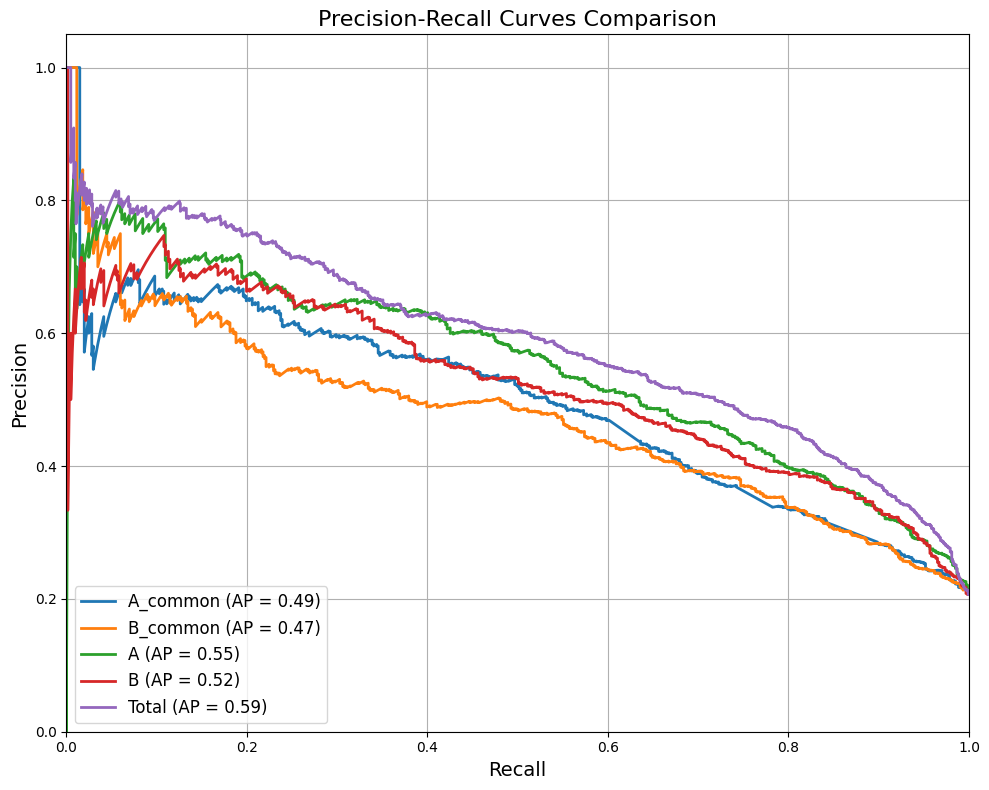

In [99]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr_nn2_A_common, tpr_nn2_A_common, label=f'A_common (AUC = {roc_auc_nn2_A_common:.2f})', linewidth=2)
plt.plot(fpr_nn2_B_common, tpr_nn2_B_common, label=f'B_common (AUC = {roc_auc_nn2_B_common:.2f})', linewidth=2)
plt.plot(fpr_nn2_A, tpr_nn2_A, label=f'A (AUC = {roc_auc_nn2_A:.2f})', linewidth=2)
plt.plot(fpr_nn2_B, tpr_nn2_B, label=f'B (AUC = {roc_auc_nn2_B:.2f})', linewidth=2)
plt.plot(fpr_nn2_tot, tpr_nn2_tot, label=f'Total (AUC = {roc_auc_nn2_tot:.2f})', linewidth=2)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

# Format the plot
plt.title('ROC Curves Comparison for Different Datasets', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
# 2. Plot all PR curves
plt.figure(figsize=(10, 8))

plt.plot(recall_nn2_A_common, precision_nn2_A_common, label=f'A_common (AP = {avg_precision_nn2_A_common:.2f})', linewidth=2)
plt.plot(recall_nn2_B_common, precision_nn2_B_common, label=f'B_common (AP = {avg_precision_nn2_B_common:.2f})', linewidth=2)
plt.plot(recall_nn2_A, precision_nn2_A, label=f'A (AP = {avg_precision_nn2_A:.2f})', linewidth=2)
plt.plot(recall_nn2_B, precision_nn2_B, label=f'B (AP = {avg_precision_nn2_B:.2f})', linewidth=2)
plt.plot(recall_nn2_tot, precision_nn2_tot, label=f'Total (AP = {avg_precision_nn2_tot:.2f})', linewidth=2)

# 3. Format the plot
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves Comparison', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

## Plots combined

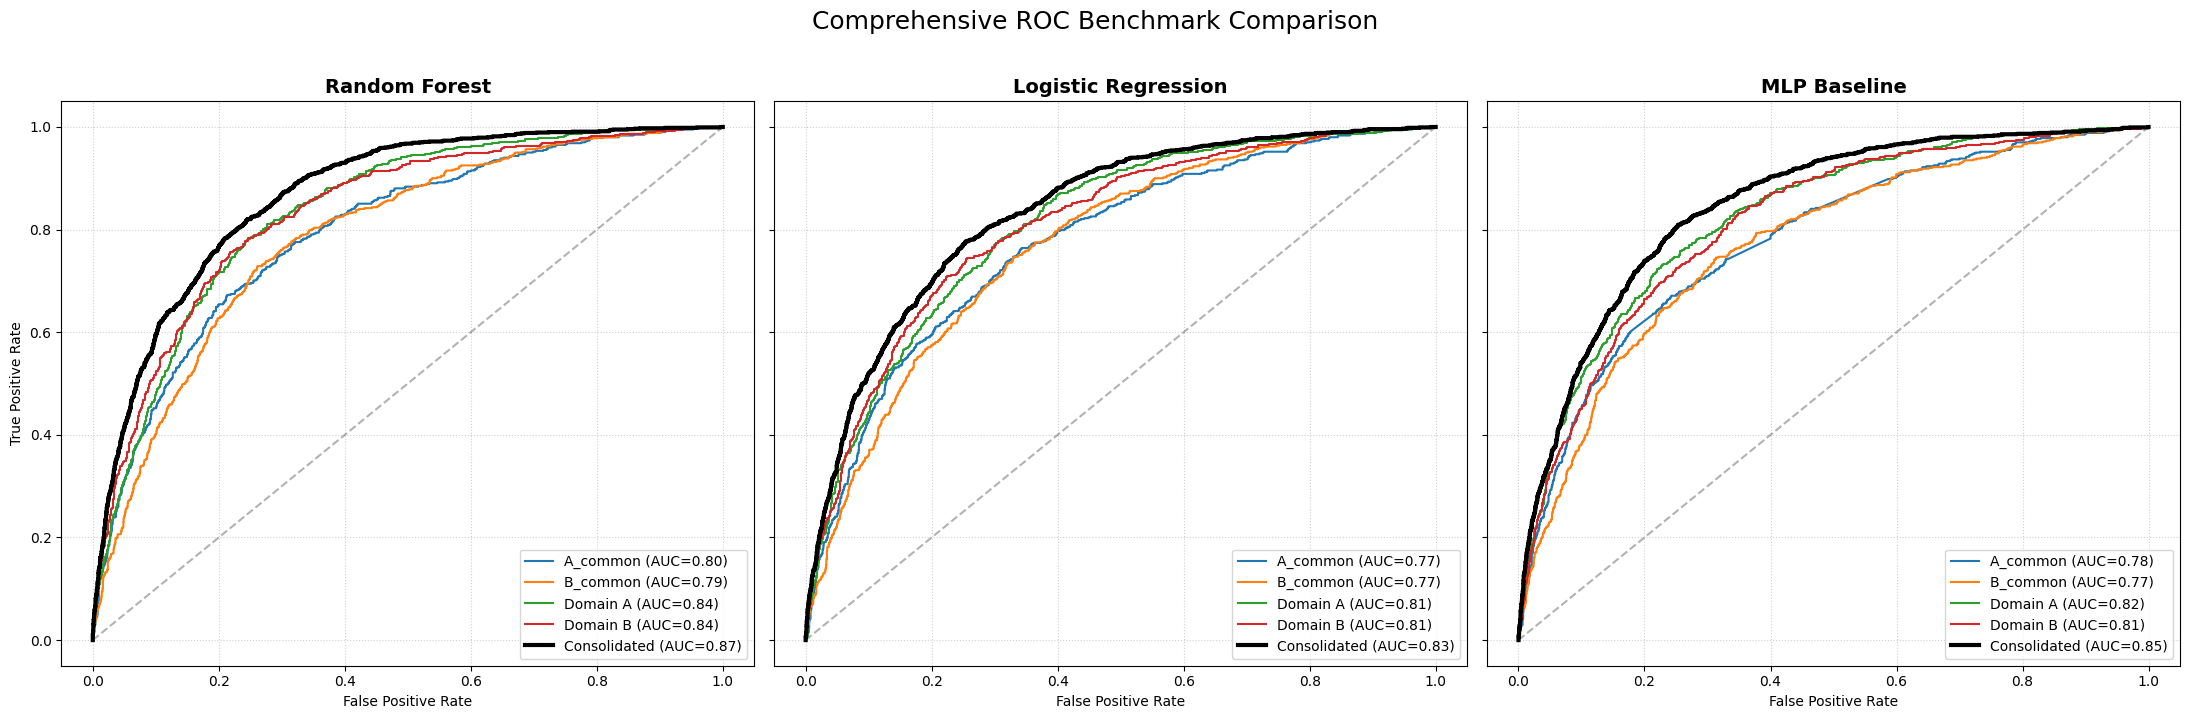

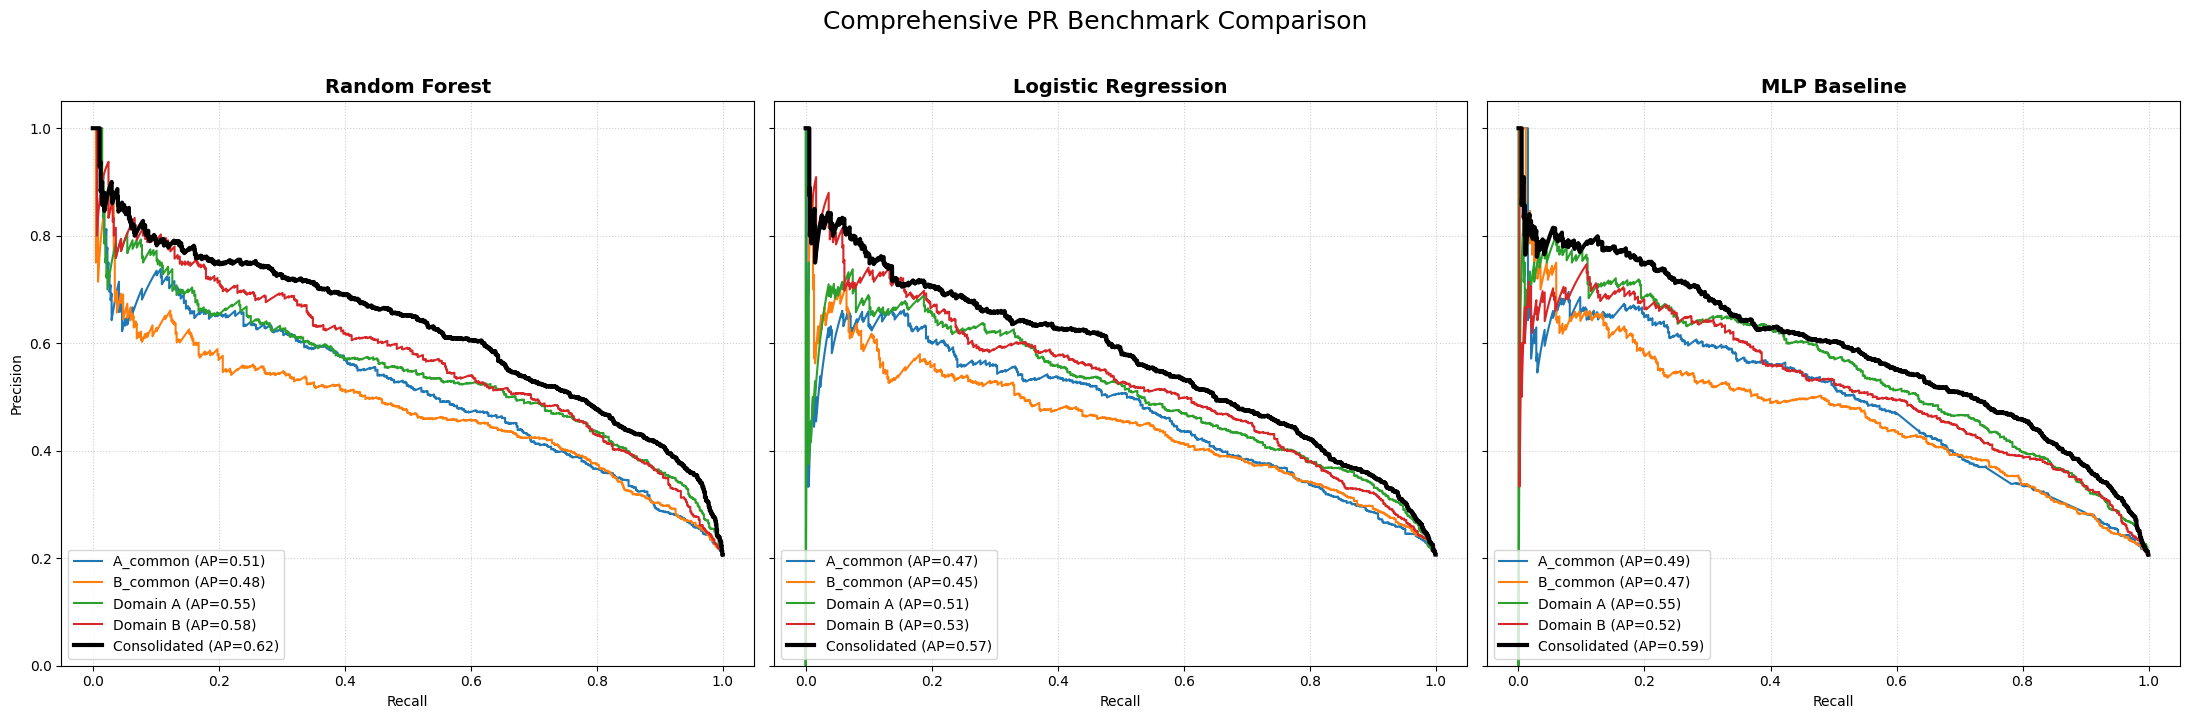

In [101]:
import matplotlib.pyplot as plt

# Define a shared color palette and styles for consistency across all 6 subplots
colors = {'A_common': '#1f77b4', 'B_common': '#ff7f0e', 'A': '#2ca02c', 'B': '#d62728', 'Total': 'black'}
line_widths = {'A_common': 1.5, 'B_common': 1.5, 'A': 1.5, 'B': 1.5, 'Total': 3.0}

def plot_benchmarks(metric_type='ROC'):
    fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
    
    # Titles and Data mapping
    arch_names = ['Random Forest', 'Logistic Regression', 'MLP Baseline']
    
    # Loop through the three architectures
    for i, arch in enumerate(['rf', 'lr', 'nn2']):
        ax = axes[i]
        
        if metric_type == 'ROC':
            # Accessing the variables from your environment
            ax.plot(eval(f'fpr_{arch}_A_common'), eval(f'tpr_{arch}_A_common'), label=f'A_common (AUC={eval(f"roc_auc_{arch}_A_common"):.2f})', color=colors['A_common'])
            ax.plot(eval(f'fpr_{arch}_B_common'), eval(f'tpr_{arch}_B_common'), label=f'B_common (AUC={eval(f"roc_auc_{arch}_B_common"):.2f})', color=colors['B_common'])
            ax.plot(eval(f'fpr_{arch}_A'), eval(f'tpr_{arch}_A'), label=f'Domain A (AUC={eval(f"roc_auc_{arch}_A"):.2f})', color=colors['A'])
            ax.plot(eval(f'fpr_{arch}_B'), eval(f'tpr_{arch}_B'), label=f'Domain B (AUC={eval(f"roc_auc_{arch}_B"):.2f})', color=colors['B'])
            ax.plot(eval(f'fpr_{arch}_tot'), eval(f'tpr_{arch}_tot'), label=f'Consolidated (AUC={eval(f"roc_auc_{arch}_tot"):.2f})', color=colors['Total'], linewidth=line_widths['Total'])
            
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
            
        else: # Precision-Recall
            ax.plot(eval(f'recall_{arch}_A_common'), eval(f'precision_{arch}_A_common'), label=f'A_common (AP={eval(f"avg_precision_{arch}_A_common"):.2f})', color=colors['A_common'])
            ax.plot(eval(f'recall_{arch}_B_common'), eval(f'precision_{arch}_B_common'), label=f'B_common (AP={eval(f"avg_precision_{arch}_B_common"):.2f})', color=colors['B_common'])
            ax.plot(eval(f'recall_{arch}_A'), eval(f'precision_{arch}_A'), label=f'Domain A (AP={eval(f"avg_precision_{arch}_A"):.2f})', color=colors['A'])
            ax.plot(eval(f'recall_{arch}_B'), eval(f'precision_{arch}_B'), label=f'Domain B (AP={eval(f"avg_precision_{arch}_B"):.2f})', color=colors['B'])
            ax.plot(eval(f'recall_{arch}_tot'), eval(f'precision_{arch}_tot'), label=f'Consolidated (AP={eval(f"avg_precision_{arch}_tot"):.2f})', color=colors['Total'], linewidth=line_widths['Total'])
            
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'{arch_names[i]}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower left' if metric_type=='PR' else 'lower right', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Comprehensive {metric_type} Benchmark Comparison', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run the plotting functions
plot_benchmarks(metric_type='ROC')
plot_benchmarks(metric_type='PR')